In [614]:
import cv2 as cv
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(columns = ['images', 'label'])
train_path = './rawdata/asl_dataset_enhanced/asl_alphabet_train/asl_alphabet_train'
test_path = './rawdata/asl_dataset/'
folders = glob(train_path+'/*')
noclasses = len(folders)

In [632]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=100
datagen = ImageDataGenerator(#rescale=1.0/255, 
                             #shear_range=0.2, 
                             #zoom_range=0.2, 
                             #horizontal_flip=True,
                             validation_split=0.3)
train_generator = datagen.flow_from_directory(train_path, 
                                              shuffle=True,
                                              target_size = (50,50),
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              subset='training') # set as training data

train_generator.class_indices

Found 54600 images belonging to 26 classes.


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [663]:
test_generator = datagen.flow_from_directory(train_path, 
                                             shuffle=False,
                                             target_size = (50,50),
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             subset='validation') # set as validation data

Found 26100 images belonging to 29 classes.


In [664]:
test_lg_path = '.\\rawdata\\asl_dataset'
batch_size2=1
datagen2 = ImageDataGenerator()#rescale=1.0/255, 
                             #shear_range=0.2, 
                             #zoom_range=0.2, 
                             #horizontal_flip=True,
                             #validation_split=.9)
test_lg = datagen2.flow_from_directory(test_lg_path, 
                                              shuffle=False,
                                              target_size = (50,50),
                                               batch_size = batch_size2,
                                              class_mode = 'categorical') # set as training data

test_lg.class_indices

Found 26 images belonging to 26 classes.


{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [ ]:
i=0
t_x, t_y = train_generator.__getitem__(i)
# plot image
plt.imshow(t_x[i].astype('uint8'))
plt.axis('off')

In [337]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
input_shape=(50,50,3)

model = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),


      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(29, activation='softmax')
  ])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [339]:
from keras import regularizers
input_shape=(50,50,3)

model3 = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,kernel_regularizer=regularizers.l2(l=0.01), filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,kernel_regularizer=regularizers.l2(l=0.01),filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,kernel_regularizer=regularizers.l2(l=0.01), filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,kernel_regularizer=regularizers.l2(l=0.01), filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),


      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(29, activation='softmax')
  ])
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [630]:
model4 = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,kernel_regularizer=regularizers.l2(l=0.01), filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,kernel_regularizer=regularizers.l2(l=0.01),filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,kernel_regularizer=regularizers.l2(l=0.01), filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,kernel_regularizer=regularizers.l2(l=0.01), filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),


      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(26, activation='softmax')
  ])
model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [299]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 2, 2, 64)        

In [304]:
model3.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 2, 2, 64)        

In [287]:
from keras.callbacks import EarlyStopping 


early_stop = EarlyStopping(monitor='loss', patience=2)

In [341]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

Train for 238 steps, validate for 102 steps
Epoch 1/50
177/238 [=====================>........] - ETA: 44:06:07 - loss: 13.0143 - accuracy: 0.035 - ETA: 21:59:27 - loss: 10.9709 - accuracy: 0.035 - ETA: 14:36:42 - loss: 8.5043 - accuracy: 0.037 - ETA: 10:55:17 - loss: 7.2486 - accuracy: 0.03 - ETA: 8:42:24 - loss: 6.4857 - accuracy: 0.0359 - ETA: 7:13:49 - loss: 5.9763 - accuracy: 0.036 - ETA: 6:10:32 - loss: 5.6075 - accuracy: 0.036 - ETA: 5:23:05 - loss: 5.3283 - accuracy: 0.039 - ETA: 4:46:09 - loss: 5.1110 - accuracy: 0.039 - ETA: 4:16:37 - loss: 4.9344 - accuracy: 0.041 - ETA: 3:52:27 - loss: 4.7907 - accuracy: 0.040 - ETA: 3:32:19 - loss: 4.6738 - accuracy: 0.039 - ETA: 3:15:16 - loss: 4.5704 - accuracy: 0.040 - ETA: 3:00:39 - loss: 4.4821 - accuracy: 0.041 - ETA: 2:48:00 - loss: 4.4057 - accuracy: 0.040 - ETA: 2:36:55 - loss: 4.3386 - accuracy: 0.042 - ETA: 2:27:08 - loss: 4.2802 - accuracy: 0.042 - ETA: 2:18:26 - loss: 4.2294 - accuracy: 0.042 - ETA: 2:10:40 - loss: 4.1811 - ac

178/238 [=====================>........] - ETA: 41:03:21 - loss: 1.0368 - accuracy: 0.69 - ETA: 20:27:32 - loss: 1.0150 - accuracy: 0.68 - ETA: 13:35:38 - loss: 1.0640 - accuracy: 0.66 - ETA: 10:09:36 - loss: 1.1069 - accuracy: 0.65 - ETA: 8:05:59 - loss: 1.1435 - accuracy: 0.6336 - ETA: 6:43:34 - loss: 1.1509 - accuracy: 0.628 - ETA: 5:44:41 - loss: 1.1841 - accuracy: 0.617 - ETA: 5:00:31 - loss: 1.1832 - accuracy: 0.615 - ETA: 4:26:11 - loss: 1.2028 - accuracy: 0.609 - ETA: 3:58:43 - loss: 1.1993 - accuracy: 0.611 - ETA: 3:36:14 - loss: 1.1702 - accuracy: 0.619 - ETA: 3:17:30 - loss: 1.1584 - accuracy: 0.623 - ETA: 3:01:38 - loss: 1.1631 - accuracy: 0.620 - ETA: 2:48:02 - loss: 1.1787 - accuracy: 0.615 - ETA: 2:36:15 - loss: 1.2419 - accuracy: 0.601 - ETA: 2:25:57 - loss: 1.2925 - accuracy: 0.591 - ETA: 2:16:51 - loss: 1.2947 - accuracy: 0.590 - ETA: 2:08:46 - loss: 1.2873 - accuracy: 0.593 - ETA: 2:01:31 - loss: 1.2703 - accuracy: 0.598 - ETA: 1:55:00 - loss: 1.2504 - accuracy: 0.60

238/238 [==============================] - ETA: 3:58 - loss: 0.8990 - accuracy: 0.70 - ETA: 3:53 - loss: 0.8971 - accuracy: 0.70 - ETA: 3:48 - loss: 0.8959 - accuracy: 0.70 - ETA: 3:43 - loss: 0.8936 - accuracy: 0.70 - ETA: 3:38 - loss: 0.8916 - accuracy: 0.71 - ETA: 3:33 - loss: 0.8902 - accuracy: 0.71 - ETA: 3:28 - loss: 0.8887 - accuracy: 0.71 - ETA: 3:23 - loss: 0.8868 - accuracy: 0.71 - ETA: 3:18 - loss: 0.8857 - accuracy: 0.71 - ETA: 3:14 - loss: 0.8852 - accuracy: 0.71 - ETA: 3:09 - loss: 0.8837 - accuracy: 0.71 - ETA: 3:04 - loss: 0.8818 - accuracy: 0.71 - ETA: 3:00 - loss: 0.8800 - accuracy: 0.71 - ETA: 2:55 - loss: 0.8786 - accuracy: 0.71 - ETA: 2:50 - loss: 0.8766 - accuracy: 0.71 - ETA: 2:46 - loss: 0.8745 - accuracy: 0.71 - ETA: 2:41 - loss: 0.8726 - accuracy: 0.71 - ETA: 2:37 - loss: 0.8705 - accuracy: 0.71 - ETA: 2:33 - loss: 0.8694 - accuracy: 0.71 - ETA: 2:28 - loss: 0.8678 - accuracy: 0.71 - ETA: 2:24 - loss: 0.8665 - accuracy: 0.71 - ETA: 2:20 - loss: 0.8659 - accura

178/238 [=====================>........] - ETA: 40:16:42 - loss: 0.2710 - accuracy: 0.90 - ETA: 20:04:20 - loss: 0.2389 - accuracy: 0.91 - ETA: 13:20:09 - loss: 0.2025 - accuracy: 0.92 - ETA: 9:58:03 - loss: 0.1903 - accuracy: 0.9307 - ETA: 7:56:46 - loss: 0.1846 - accuracy: 0.932 - ETA: 6:35:55 - loss: 0.1804 - accuracy: 0.934 - ETA: 5:38:10 - loss: 0.1752 - accuracy: 0.936 - ETA: 4:54:51 - loss: 0.1825 - accuracy: 0.935 - ETA: 4:21:09 - loss: 0.1822 - accuracy: 0.934 - ETA: 3:54:11 - loss: 0.1935 - accuracy: 0.928 - ETA: 3:32:08 - loss: 0.1920 - accuracy: 0.929 - ETA: 3:13:45 - loss: 0.1929 - accuracy: 0.930 - ETA: 2:58:11 - loss: 0.1865 - accuracy: 0.932 - ETA: 2:44:51 - loss: 0.1844 - accuracy: 0.933 - ETA: 2:33:18 - loss: 0.1866 - accuracy: 0.933 - ETA: 2:23:11 - loss: 0.1842 - accuracy: 0.934 - ETA: 2:14:16 - loss: 0.2045 - accuracy: 0.928 - ETA: 2:06:19 - loss: 0.2132 - accuracy: 0.924 - ETA: 1:59:14 - loss: 0.2119 - accuracy: 0.925 - ETA: 1:52:50 - loss: 0.2154 - accuracy: 0.92

238/238 [==============================] - ETA: 3:55 - loss: 0.2494 - accuracy: 0.92 - ETA: 3:50 - loss: 0.2494 - accuracy: 0.92 - ETA: 3:45 - loss: 0.2487 - accuracy: 0.92 - ETA: 3:40 - loss: 0.2480 - accuracy: 0.92 - ETA: 3:35 - loss: 0.2471 - accuracy: 0.92 - ETA: 3:30 - loss: 0.2462 - accuracy: 0.92 - ETA: 3:26 - loss: 0.2456 - accuracy: 0.92 - ETA: 3:21 - loss: 0.2450 - accuracy: 0.92 - ETA: 3:16 - loss: 0.2443 - accuracy: 0.92 - ETA: 3:11 - loss: 0.2437 - accuracy: 0.92 - ETA: 3:07 - loss: 0.2432 - accuracy: 0.92 - ETA: 3:02 - loss: 0.2426 - accuracy: 0.92 - ETA: 2:58 - loss: 0.2423 - accuracy: 0.92 - ETA: 2:53 - loss: 0.2418 - accuracy: 0.92 - ETA: 2:48 - loss: 0.2414 - accuracy: 0.92 - ETA: 2:44 - loss: 0.2407 - accuracy: 0.92 - ETA: 2:40 - loss: 0.2401 - accuracy: 0.92 - ETA: 2:35 - loss: 0.2394 - accuracy: 0.92 - ETA: 2:31 - loss: 0.2389 - accuracy: 0.92 - ETA: 2:27 - loss: 0.2381 - accuracy: 0.92 - ETA: 2:22 - loss: 0.2376 - accuracy: 0.92 - ETA: 2:18 - loss: 0.2370 - accura

178/238 [=====================>........] - ETA: 40:08:57 - loss: 0.2178 - accuracy: 0.93 - ETA: 20:00:28 - loss: 0.1724 - accuracy: 0.95 - ETA: 13:17:34 - loss: 0.1598 - accuracy: 0.95 - ETA: 9:56:08 - loss: 0.1357 - accuracy: 0.9570 - ETA: 7:55:15 - loss: 0.1204 - accuracy: 0.960 - ETA: 6:34:39 - loss: 0.1084 - accuracy: 0.964 - ETA: 5:37:06 - loss: 0.1108 - accuracy: 0.964 - ETA: 4:53:54 - loss: 0.1379 - accuracy: 0.962 - ETA: 4:20:19 - loss: 0.1459 - accuracy: 0.958 - ETA: 3:53:27 - loss: 0.1523 - accuracy: 0.956 - ETA: 3:31:28 - loss: 0.1495 - accuracy: 0.957 - ETA: 3:13:08 - loss: 0.1509 - accuracy: 0.956 - ETA: 2:57:38 - loss: 0.1491 - accuracy: 0.956 - ETA: 2:44:20 - loss: 0.1475 - accuracy: 0.956 - ETA: 2:32:49 - loss: 0.1464 - accuracy: 0.956 - ETA: 2:22:44 - loss: 0.1435 - accuracy: 0.957 - ETA: 2:13:50 - loss: 0.1457 - accuracy: 0.957 - ETA: 2:05:55 - loss: 0.1469 - accuracy: 0.956 - ETA: 1:58:51 - loss: 0.1418 - accuracy: 0.958 - ETA: 1:52:29 - loss: 0.1440 - accuracy: 0.95

238/238 [==============================] - ETA: 3:54 - loss: 0.1273 - accuracy: 0.96 - ETA: 3:49 - loss: 0.1287 - accuracy: 0.96 - ETA: 3:44 - loss: 0.1300 - accuracy: 0.96 - ETA: 3:39 - loss: 0.1314 - accuracy: 0.96 - ETA: 3:34 - loss: 0.1320 - accuracy: 0.96 - ETA: 3:29 - loss: 0.1323 - accuracy: 0.96 - ETA: 3:25 - loss: 0.1322 - accuracy: 0.96 - ETA: 3:20 - loss: 0.1319 - accuracy: 0.96 - ETA: 3:15 - loss: 0.1319 - accuracy: 0.96 - ETA: 3:10 - loss: 0.1319 - accuracy: 0.96 - ETA: 3:06 - loss: 0.1317 - accuracy: 0.96 - ETA: 3:01 - loss: 0.1313 - accuracy: 0.96 - ETA: 2:57 - loss: 0.1310 - accuracy: 0.96 - ETA: 2:52 - loss: 0.1306 - accuracy: 0.96 - ETA: 2:48 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:43 - loss: 0.1305 - accuracy: 0.96 - ETA: 2:39 - loss: 0.1303 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1300 - accuracy: 0.96 - ETA: 2:30 - loss: 0.1295 - accuracy: 0.96 - ETA: 2:26 - loss: 0.1291 - accuracy: 0.96 - ETA: 2:22 - loss: 0.1289 - accuracy: 0.96 - ETA: 2:17 - loss: 0.1285 - accura

178/238 [=====================>........] - ETA: 41:03:17 - loss: 0.0369 - accuracy: 0.99 - ETA: 20:27:31 - loss: 0.0404 - accuracy: 0.99 - ETA: 13:35:29 - loss: 0.0365 - accuracy: 0.99 - ETA: 10:09:31 - loss: 0.0352 - accuracy: 0.99 - ETA: 8:05:53 - loss: 0.0314 - accuracy: 0.9922 - ETA: 6:43:28 - loss: 0.0292 - accuracy: 0.992 - ETA: 5:44:37 - loss: 0.0327 - accuracy: 0.991 - ETA: 5:00:28 - loss: 0.0333 - accuracy: 0.991 - ETA: 4:26:07 - loss: 0.0331 - accuracy: 0.991 - ETA: 3:58:39 - loss: 0.0372 - accuracy: 0.989 - ETA: 3:36:10 - loss: 0.0359 - accuracy: 0.990 - ETA: 3:17:26 - loss: 0.0352 - accuracy: 0.989 - ETA: 3:01:35 - loss: 0.0360 - accuracy: 0.989 - ETA: 2:47:59 - loss: 0.0359 - accuracy: 0.989 - ETA: 2:36:13 - loss: 0.0355 - accuracy: 0.989 - ETA: 2:25:54 - loss: 0.0352 - accuracy: 0.989 - ETA: 2:16:48 - loss: 0.0373 - accuracy: 0.988 - ETA: 2:08:43 - loss: 0.0414 - accuracy: 0.987 - ETA: 2:01:29 - loss: 0.0517 - accuracy: 0.985 - ETA: 1:54:58 - loss: 0.0622 - accuracy: 0.98

238/238 [==============================] - ETA: 3:58 - loss: 0.1041 - accuracy: 0.97 - ETA: 3:52 - loss: 0.1036 - accuracy: 0.97 - ETA: 3:47 - loss: 0.1033 - accuracy: 0.97 - ETA: 3:42 - loss: 0.1031 - accuracy: 0.97 - ETA: 3:37 - loss: 0.1028 - accuracy: 0.97 - ETA: 3:32 - loss: 0.1023 - accuracy: 0.97 - ETA: 3:28 - loss: 0.1020 - accuracy: 0.97 - ETA: 3:23 - loss: 0.1016 - accuracy: 0.97 - ETA: 3:18 - loss: 0.1013 - accuracy: 0.97 - ETA: 3:13 - loss: 0.1012 - accuracy: 0.97 - ETA: 3:08 - loss: 0.1007 - accuracy: 0.97 - ETA: 3:04 - loss: 0.1008 - accuracy: 0.97 - ETA: 2:59 - loss: 0.1034 - accuracy: 0.97 - ETA: 2:55 - loss: 0.1049 - accuracy: 0.97 - ETA: 2:50 - loss: 0.1047 - accuracy: 0.97 - ETA: 2:46 - loss: 0.1043 - accuracy: 0.97 - ETA: 2:41 - loss: 0.1040 - accuracy: 0.97 - ETA: 2:37 - loss: 0.1037 - accuracy: 0.97 - ETA: 2:32 - loss: 0.1035 - accuracy: 0.97 - ETA: 2:28 - loss: 0.1033 - accuracy: 0.97 - ETA: 2:24 - loss: 0.1030 - accuracy: 0.97 - ETA: 2:19 - loss: 0.1026 - accura

178/238 [=====================>........] - ETA: 40:54:16 - loss: 0.0049 - accuracy: 1.00 - ETA: 20:23:05 - loss: 0.0073 - accuracy: 0.99 - ETA: 13:32:34 - loss: 0.0149 - accuracy: 0.99 - ETA: 10:07:19 - loss: 0.0318 - accuracy: 0.99 - ETA: 8:04:09 - loss: 0.0565 - accuracy: 0.9867 - ETA: 6:42:02 - loss: 0.0580 - accuracy: 0.985 - ETA: 5:43:23 - loss: 0.0702 - accuracy: 0.983 - ETA: 4:59:23 - loss: 0.0763 - accuracy: 0.982 - ETA: 4:25:10 - loss: 0.0815 - accuracy: 0.979 - ETA: 3:57:48 - loss: 0.0767 - accuracy: 0.980 - ETA: 3:35:24 - loss: 0.0743 - accuracy: 0.980 - ETA: 3:16:44 - loss: 0.0708 - accuracy: 0.981 - ETA: 3:00:56 - loss: 0.0748 - accuracy: 0.979 - ETA: 2:47:24 - loss: 0.0778 - accuracy: 0.979 - ETA: 2:35:40 - loss: 0.0783 - accuracy: 0.979 - ETA: 2:25:23 - loss: 0.0807 - accuracy: 0.979 - ETA: 2:16:20 - loss: 0.0771 - accuracy: 0.980 - ETA: 2:08:16 - loss: 0.0770 - accuracy: 0.980 - ETA: 2:01:04 - loss: 0.0761 - accuracy: 0.981 - ETA: 1:54:34 - loss: 0.0761 - accuracy: 0.98

238/238 [==============================] - ETA: 3:56 - loss: 0.0764 - accuracy: 0.98 - ETA: 3:51 - loss: 0.0760 - accuracy: 0.98 - ETA: 3:46 - loss: 0.0757 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0754 - accuracy: 0.98 - ETA: 3:36 - loss: 0.0762 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0761 - accuracy: 0.98 - ETA: 3:27 - loss: 0.0762 - accuracy: 0.98 - ETA: 3:22 - loss: 0.0766 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0763 - accuracy: 0.98 - ETA: 3:12 - loss: 0.0765 - accuracy: 0.98 - ETA: 3:08 - loss: 0.0761 - accuracy: 0.98 - ETA: 3:03 - loss: 0.0767 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0767 - accuracy: 0.98 - ETA: 2:54 - loss: 0.0766 - accuracy: 0.98 - ETA: 2:49 - loss: 0.0769 - accuracy: 0.98 - ETA: 2:45 - loss: 0.0767 - accuracy: 0.98 - ETA: 2:40 - loss: 0.0768 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0768 - accuracy: 0.98 - ETA: 2:32 - loss: 0.0771 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0773 - accuracy: 0.98 - ETA: 2:23 - loss: 0.0773 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0772 - accura

178/238 [=====================>........] - ETA: 41:11:57 - loss: 0.0913 - accuracy: 0.97 - ETA: 20:31:49 - loss: 0.0651 - accuracy: 0.98 - ETA: 13:38:21 - loss: 0.0599 - accuracy: 0.98 - ETA: 10:11:37 - loss: 0.0780 - accuracy: 0.97 - ETA: 8:07:35 - loss: 0.0789 - accuracy: 0.9766 - ETA: 6:44:53 - loss: 0.0756 - accuracy: 0.978 - ETA: 5:45:48 - loss: 0.0695 - accuracy: 0.979 - ETA: 5:01:30 - loss: 0.0633 - accuracy: 0.981 - ETA: 4:27:02 - loss: 0.0570 - accuracy: 0.983 - ETA: 3:59:28 - loss: 0.0530 - accuracy: 0.984 - ETA: 3:36:55 - loss: 0.0502 - accuracy: 0.985 - ETA: 3:18:07 - loss: 0.0467 - accuracy: 0.986 - ETA: 3:02:12 - loss: 0.0434 - accuracy: 0.987 - ETA: 2:48:34 - loss: 0.0463 - accuracy: 0.987 - ETA: 2:36:45 - loss: 0.0443 - accuracy: 0.988 - ETA: 2:26:24 - loss: 0.0464 - accuracy: 0.987 - ETA: 2:17:17 - loss: 0.0556 - accuracy: 0.985 - ETA: 2:09:10 - loss: 0.0538 - accuracy: 0.986 - ETA: 2:01:54 - loss: 0.0527 - accuracy: 0.986 - ETA: 1:55:22 - loss: 0.0548 - accuracy: 0.98

238/238 [==============================] - ETA: 3:59 - loss: 0.0689 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0690 - accuracy: 0.98 - ETA: 3:49 - loss: 0.0690 - accuracy: 0.98 - ETA: 3:44 - loss: 0.0687 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0687 - accuracy: 0.98 - ETA: 3:34 - loss: 0.0686 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0690 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0687 - accuracy: 0.98 - ETA: 3:19 - loss: 0.0684 - accuracy: 0.98 - ETA: 3:14 - loss: 0.0682 - accuracy: 0.98 - ETA: 3:10 - loss: 0.0684 - accuracy: 0.98 - ETA: 3:05 - loss: 0.0685 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0692 - accuracy: 0.98 - ETA: 2:56 - loss: 0.0691 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0691 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0688 - accuracy: 0.98 - ETA: 2:42 - loss: 0.0684 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0684 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0685 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0684 - accuracy: 0.98 - ETA: 2:25 - loss: 0.0682 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0680 - accura

178/238 [=====================>........] - ETA: 40:36:10 - loss: 0.0116 - accuracy: 0.99 - ETA: 20:14:04 - loss: 0.0476 - accuracy: 0.98 - ETA: 13:26:36 - loss: 0.0536 - accuracy: 0.98 - ETA: 10:02:53 - loss: 0.0459 - accuracy: 0.98 - ETA: 8:00:37 - loss: 0.0376 - accuracy: 0.9898 - ETA: 6:39:07 - loss: 0.0355 - accuracy: 0.990 - ETA: 5:40:53 - loss: 0.0324 - accuracy: 0.991 - ETA: 4:57:14 - loss: 0.0393 - accuracy: 0.989 - ETA: 4:23:15 - loss: 0.0438 - accuracy: 0.988 - ETA: 3:56:05 - loss: 0.0449 - accuracy: 0.988 - ETA: 3:33:51 - loss: 0.0473 - accuracy: 0.987 - ETA: 3:15:19 - loss: 0.0497 - accuracy: 0.987 - ETA: 2:59:38 - loss: 0.0578 - accuracy: 0.986 - ETA: 2:46:12 - loss: 0.0615 - accuracy: 0.986 - ETA: 2:34:32 - loss: 0.0594 - accuracy: 0.986 - ETA: 2:24:21 - loss: 0.0564 - accuracy: 0.987 - ETA: 2:15:21 - loss: 0.0557 - accuracy: 0.987 - ETA: 2:07:21 - loss: 0.0560 - accuracy: 0.986 - ETA: 2:00:11 - loss: 0.0535 - accuracy: 0.987 - ETA: 1:53:45 - loss: 0.0534 - accuracy: 0.98

238/238 [==============================] - ETA: 3:56 - loss: 0.0712 - accuracy: 0.98 - ETA: 3:51 - loss: 0.0721 - accuracy: 0.98 - ETA: 3:46 - loss: 0.0726 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0730 - accuracy: 0.98 - ETA: 3:36 - loss: 0.0727 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0728 - accuracy: 0.98 - ETA: 3:26 - loss: 0.0729 - accuracy: 0.98 - ETA: 3:22 - loss: 0.0737 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0734 - accuracy: 0.98 - ETA: 3:12 - loss: 0.0731 - accuracy: 0.98 - ETA: 3:07 - loss: 0.0728 - accuracy: 0.98 - ETA: 3:03 - loss: 0.0728 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0727 - accuracy: 0.98 - ETA: 2:54 - loss: 0.0729 - accuracy: 0.98 - ETA: 2:49 - loss: 0.0727 - accuracy: 0.98 - ETA: 2:45 - loss: 0.0725 - accuracy: 0.98 - ETA: 2:40 - loss: 0.0722 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0720 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0718 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0718 - accuracy: 0.98 - ETA: 2:23 - loss: 0.0715 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0715 - accura

178/238 [=====================>........] - ETA: 41:05:07 - loss: 0.0511 - accuracy: 0.98 - ETA: 20:28:28 - loss: 0.0609 - accuracy: 0.98 - ETA: 13:36:09 - loss: 0.0662 - accuracy: 0.98 - ETA: 10:09:59 - loss: 0.0629 - accuracy: 0.98 - ETA: 8:06:17 - loss: 0.0665 - accuracy: 0.9883 - ETA: 6:43:48 - loss: 0.0562 - accuracy: 0.990 - ETA: 5:44:54 - loss: 0.0517 - accuracy: 0.990 - ETA: 5:00:42 - loss: 0.0536 - accuracy: 0.989 - ETA: 4:26:20 - loss: 0.0498 - accuracy: 0.990 - ETA: 3:58:50 - loss: 0.0586 - accuracy: 0.989 - ETA: 3:36:20 - loss: 0.0538 - accuracy: 0.990 - ETA: 3:17:35 - loss: 0.0497 - accuracy: 0.990 - ETA: 3:01:43 - loss: 0.0544 - accuracy: 0.991 - ETA: 2:48:07 - loss: 0.0579 - accuracy: 0.990 - ETA: 2:36:20 - loss: 0.0582 - accuracy: 0.989 - ETA: 2:26:01 - loss: 0.0561 - accuracy: 0.990 - ETA: 2:16:55 - loss: 0.0533 - accuracy: 0.990 - ETA: 2:08:49 - loss: 0.0512 - accuracy: 0.990 - ETA: 2:01:35 - loss: 0.0507 - accuracy: 0.990 - ETA: 1:55:04 - loss: 0.0495 - accuracy: 0.99

238/238 [==============================] - ETA: 3:59 - loss: 0.0651 - accuracy: 0.98 - ETA: 3:54 - loss: 0.0651 - accuracy: 0.98 - ETA: 3:49 - loss: 0.0655 - accuracy: 0.98 - ETA: 3:44 - loss: 0.0655 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0654 - accuracy: 0.98 - ETA: 3:34 - loss: 0.0651 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0652 - accuracy: 0.98 - ETA: 3:24 - loss: 0.0650 - accuracy: 0.98 - ETA: 3:19 - loss: 0.0649 - accuracy: 0.98 - ETA: 3:14 - loss: 0.0647 - accuracy: 0.98 - ETA: 3:10 - loss: 0.0644 - accuracy: 0.98 - ETA: 3:05 - loss: 0.0643 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0639 - accuracy: 0.98 - ETA: 2:56 - loss: 0.0638 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0638 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0638 - accuracy: 0.98 - ETA: 2:42 - loss: 0.0637 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0636 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0635 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0637 - accuracy: 0.98 - ETA: 2:24 - loss: 0.0642 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0643 - accura

178/238 [=====================>........] - ETA: 42:44:47 - loss: 0.0713 - accuracy: 0.98 - ETA: 21:17:59 - loss: 0.0417 - accuracy: 0.99 - ETA: 14:09:03 - loss: 0.0309 - accuracy: 0.99 - ETA: 10:34:33 - loss: 0.0288 - accuracy: 0.99 - ETA: 8:25:51 - loss: 0.0326 - accuracy: 0.9914 - ETA: 7:00:03 - loss: 0.0422 - accuracy: 0.988 - ETA: 5:58:46 - loss: 0.0390 - accuracy: 0.989 - ETA: 5:12:47 - loss: 0.0343 - accuracy: 0.990 - ETA: 4:37:02 - loss: 0.0364 - accuracy: 0.990 - ETA: 4:08:26 - loss: 0.0351 - accuracy: 0.990 - ETA: 3:45:02 - loss: 0.0389 - accuracy: 0.990 - ETA: 3:25:31 - loss: 0.0448 - accuracy: 0.989 - ETA: 3:09:01 - loss: 0.0470 - accuracy: 0.989 - ETA: 2:54:52 - loss: 0.0531 - accuracy: 0.988 - ETA: 2:42:36 - loss: 0.0689 - accuracy: 0.987 - ETA: 2:31:52 - loss: 0.0703 - accuracy: 0.986 - ETA: 2:22:24 - loss: 0.0730 - accuracy: 0.985 - ETA: 2:13:59 - loss: 0.0690 - accuracy: 0.986 - ETA: 2:06:26 - loss: 0.0678 - accuracy: 0.986 - ETA: 1:59:40 - loss: 0.0667 - accuracy: 0.98

238/238 [==============================] - ETA: 4:08 - loss: 0.0632 - accuracy: 0.98 - ETA: 4:02 - loss: 0.0635 - accuracy: 0.98 - ETA: 3:57 - loss: 0.0637 - accuracy: 0.98 - ETA: 3:52 - loss: 0.0635 - accuracy: 0.98 - ETA: 3:47 - loss: 0.0634 - accuracy: 0.98 - ETA: 3:42 - loss: 0.0640 - accuracy: 0.98 - ETA: 3:37 - loss: 0.0648 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0662 - accuracy: 0.98 - ETA: 3:26 - loss: 0.0660 - accuracy: 0.98 - ETA: 3:21 - loss: 0.0658 - accuracy: 0.98 - ETA: 3:17 - loss: 0.0656 - accuracy: 0.98 - ETA: 3:12 - loss: 0.0653 - accuracy: 0.98 - ETA: 3:07 - loss: 0.0653 - accuracy: 0.98 - ETA: 3:02 - loss: 0.0651 - accuracy: 0.98 - ETA: 2:57 - loss: 0.0649 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0647 - accuracy: 0.98 - ETA: 2:48 - loss: 0.0646 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0646 - accuracy: 0.98 - ETA: 2:39 - loss: 0.0645 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0643 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0641 - accuracy: 0.98 - ETA: 2:25 - loss: 0.0638 - accura

178/238 [=====================>........] - ETA: 41:23:23 - loss: 0.1454 - accuracy: 0.98 - ETA: 20:37:34 - loss: 0.1292 - accuracy: 0.98 - ETA: 13:42:11 - loss: 0.0883 - accuracy: 0.98 - ETA: 10:14:30 - loss: 0.0749 - accuracy: 0.98 - ETA: 8:09:52 - loss: 0.0639 - accuracy: 0.9898 - ETA: 6:46:47 - loss: 0.0544 - accuracy: 0.990 - ETA: 5:47:26 - loss: 0.0489 - accuracy: 0.990 - ETA: 5:02:55 - loss: 0.0451 - accuracy: 0.990 - ETA: 4:28:18 - loss: 0.0462 - accuracy: 0.990 - ETA: 4:00:36 - loss: 0.0423 - accuracy: 0.991 - ETA: 3:37:56 - loss: 0.0431 - accuracy: 0.991 - ETA: 3:19:03 - loss: 0.0401 - accuracy: 0.992 - ETA: 3:03:05 - loss: 0.0448 - accuracy: 0.991 - ETA: 2:49:22 - loss: 0.0476 - accuracy: 0.991 - ETA: 2:37:30 - loss: 0.0512 - accuracy: 0.990 - ETA: 2:27:06 - loss: 0.0524 - accuracy: 0.989 - ETA: 2:17:56 - loss: 0.0643 - accuracy: 0.987 - ETA: 2:09:47 - loss: 0.0665 - accuracy: 0.987 - ETA: 2:02:29 - loss: 0.0648 - accuracy: 0.987 - ETA: 1:55:55 - loss: 0.0624 - accuracy: 0.98

238/238 [==============================] - ETA: 4:00 - loss: 0.0648 - accuracy: 0.98 - ETA: 3:55 - loss: 0.0645 - accuracy: 0.98 - ETA: 3:49 - loss: 0.0652 - accuracy: 0.98 - ETA: 3:44 - loss: 0.0657 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0656 - accuracy: 0.98 - ETA: 3:34 - loss: 0.0664 - accuracy: 0.98 - ETA: 3:29 - loss: 0.0668 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0666 - accuracy: 0.98 - ETA: 3:20 - loss: 0.0664 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0662 - accuracy: 0.98 - ETA: 3:10 - loss: 0.0660 - accuracy: 0.98 - ETA: 3:05 - loss: 0.0658 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0656 - accuracy: 0.98 - ETA: 2:56 - loss: 0.0653 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0649 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0652 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0651 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0648 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0645 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0643 - accuracy: 0.98 - ETA: 2:25 - loss: 0.0645 - accuracy: 0.98 - ETA: 2:21 - loss: 0.0646 - accura

178/238 [=====================>........] - ETA: 41:00:38 - loss: 0.0848 - accuracy: 0.97 - ETA: 20:26:25 - loss: 0.0469 - accuracy: 0.98 - ETA: 13:34:45 - loss: 0.0328 - accuracy: 0.99 - ETA: 10:08:56 - loss: 0.0308 - accuracy: 0.99 - ETA: 8:05:26 - loss: 0.0327 - accuracy: 0.9914 - ETA: 6:43:06 - loss: 0.0469 - accuracy: 0.990 - ETA: 5:44:18 - loss: 0.0527 - accuracy: 0.989 - ETA: 5:00:11 - loss: 0.0647 - accuracy: 0.988 - ETA: 4:25:53 - loss: 0.0651 - accuracy: 0.987 - ETA: 3:58:26 - loss: 0.0702 - accuracy: 0.987 - ETA: 3:35:58 - loss: 0.0677 - accuracy: 0.988 - ETA: 3:17:15 - loss: 0.0663 - accuracy: 0.988 - ETA: 3:01:25 - loss: 0.0619 - accuracy: 0.988 - ETA: 2:47:50 - loss: 0.0622 - accuracy: 0.989 - ETA: 2:36:04 - loss: 0.0585 - accuracy: 0.989 - ETA: 2:25:47 - loss: 0.0579 - accuracy: 0.990 - ETA: 2:16:41 - loss: 0.0589 - accuracy: 0.989 - ETA: 2:08:37 - loss: 0.0664 - accuracy: 0.988 - ETA: 2:01:23 - loss: 0.0681 - accuracy: 0.987 - ETA: 1:54:52 - loss: 0.0673 - accuracy: 0.98

238/238 [==============================] - ETA: 3:58 - loss: 0.0726 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0726 - accuracy: 0.98 - ETA: 3:48 - loss: 0.0723 - accuracy: 0.98 - ETA: 3:43 - loss: 0.0719 - accuracy: 0.98 - ETA: 3:38 - loss: 0.0717 - accuracy: 0.98 - ETA: 3:33 - loss: 0.0714 - accuracy: 0.98 - ETA: 3:28 - loss: 0.0716 - accuracy: 0.98 - ETA: 3:23 - loss: 0.0713 - accuracy: 0.98 - ETA: 3:18 - loss: 0.0715 - accuracy: 0.98 - ETA: 3:14 - loss: 0.0712 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0710 - accuracy: 0.98 - ETA: 3:04 - loss: 0.0707 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0704 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0706 - accuracy: 0.98 - ETA: 2:50 - loss: 0.0705 - accuracy: 0.98 - ETA: 2:46 - loss: 0.0702 - accuracy: 0.98 - ETA: 2:41 - loss: 0.0700 - accuracy: 0.98 - ETA: 2:37 - loss: 0.0701 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0700 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0699 - accuracy: 0.98 - ETA: 2:24 - loss: 0.0704 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0706 - accura

178/238 [=====================>........] - ETA: 41:42:29 - loss: 0.0422 - accuracy: 0.98 - ETA: 20:47:03 - loss: 0.0369 - accuracy: 0.99 - ETA: 13:48:30 - loss: 0.0533 - accuracy: 0.99 - ETA: 10:19:11 - loss: 0.0491 - accuracy: 0.99 - ETA: 8:13:37 - loss: 0.0410 - accuracy: 0.9922 - ETA: 6:49:54 - loss: 0.0554 - accuracy: 0.990 - ETA: 5:50:05 - loss: 0.0509 - accuracy: 0.990 - ETA: 5:05:14 - loss: 0.0540 - accuracy: 0.990 - ETA: 4:30:21 - loss: 0.0583 - accuracy: 0.990 - ETA: 4:02:26 - loss: 0.0567 - accuracy: 0.989 - ETA: 3:39:35 - loss: 0.0545 - accuracy: 0.989 - ETA: 3:20:34 - loss: 0.0540 - accuracy: 0.989 - ETA: 3:04:27 - loss: 0.0499 - accuracy: 0.990 - ETA: 2:50:39 - loss: 0.0480 - accuracy: 0.990 - ETA: 2:38:41 - loss: 0.0474 - accuracy: 0.989 - ETA: 2:28:12 - loss: 0.0473 - accuracy: 0.989 - ETA: 2:18:58 - loss: 0.0459 - accuracy: 0.990 - ETA: 2:10:45 - loss: 0.0483 - accuracy: 0.990 - ETA: 2:03:24 - loss: 0.0588 - accuracy: 0.989 - ETA: 1:56:47 - loss: 0.0632 - accuracy: 0.98

238/238 [==============================] - ETA: 4:01 - loss: 0.0710 - accuracy: 0.98 - ETA: 3:56 - loss: 0.0710 - accuracy: 0.98 - ETA: 3:51 - loss: 0.0707 - accuracy: 0.98 - ETA: 3:46 - loss: 0.0706 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0704 - accuracy: 0.98 - ETA: 3:36 - loss: 0.0702 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0699 - accuracy: 0.98 - ETA: 3:26 - loss: 0.0697 - accuracy: 0.98 - ETA: 3:21 - loss: 0.0694 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0694 - accuracy: 0.98 - ETA: 3:11 - loss: 0.0695 - accuracy: 0.98 - ETA: 3:07 - loss: 0.0694 - accuracy: 0.98 - ETA: 3:02 - loss: 0.0695 - accuracy: 0.98 - ETA: 2:57 - loss: 0.0694 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0697 - accuracy: 0.98 - ETA: 2:48 - loss: 0.0694 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0691 - accuracy: 0.98 - ETA: 2:39 - loss: 0.0693 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0715 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0718 - accuracy: 0.98 - ETA: 2:26 - loss: 0.0715 - accuracy: 0.98 - ETA: 2:21 - loss: 0.0718 - accura

178/238 [=====================>........] - ETA: 40:32:09 - loss: 0.0120 - accuracy: 0.99 - ETA: 20:12:08 - loss: 0.0120 - accuracy: 0.99 - ETA: 13:25:17 - loss: 0.0187 - accuracy: 0.99 - ETA: 10:01:52 - loss: 0.0250 - accuracy: 0.99 - ETA: 7:59:50 - loss: 0.0239 - accuracy: 0.9922 - ETA: 6:38:27 - loss: 0.0223 - accuracy: 0.992 - ETA: 5:40:20 - loss: 0.0198 - accuracy: 0.993 - ETA: 4:56:44 - loss: 0.0246 - accuracy: 0.993 - ETA: 4:22:49 - loss: 0.0392 - accuracy: 0.992 - ETA: 3:55:41 - loss: 0.0355 - accuracy: 0.993 - ETA: 3:33:29 - loss: 0.0412 - accuracy: 0.993 - ETA: 3:14:59 - loss: 0.0387 - accuracy: 0.993 - ETA: 2:59:19 - loss: 0.0507 - accuracy: 0.993 - ETA: 2:45:54 - loss: 0.0479 - accuracy: 0.993 - ETA: 2:34:16 - loss: 0.0499 - accuracy: 0.993 - ETA: 2:24:05 - loss: 0.0489 - accuracy: 0.992 - ETA: 2:15:07 - loss: 0.0640 - accuracy: 0.991 - ETA: 2:07:08 - loss: 0.0607 - accuracy: 0.992 - ETA: 1:59:59 - loss: 0.0588 - accuracy: 0.992 - ETA: 1:53:33 - loss: 0.0584 - accuracy: 0.99

238/238 [==============================] - ETA: 3:56 - loss: 0.0674 - accuracy: 0.98 - ETA: 3:51 - loss: 0.0673 - accuracy: 0.98 - ETA: 3:46 - loss: 0.0674 - accuracy: 0.98 - ETA: 3:41 - loss: 0.0673 - accuracy: 0.98 - ETA: 3:36 - loss: 0.0671 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0671 - accuracy: 0.98 - ETA: 3:26 - loss: 0.0675 - accuracy: 0.98 - ETA: 3:21 - loss: 0.0672 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0671 - accuracy: 0.98 - ETA: 3:12 - loss: 0.0668 - accuracy: 0.98 - ETA: 3:07 - loss: 0.0665 - accuracy: 0.98 - ETA: 3:02 - loss: 0.0662 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0661 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0661 - accuracy: 0.98 - ETA: 2:49 - loss: 0.0658 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0659 - accuracy: 0.98 - ETA: 2:40 - loss: 0.0661 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0671 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0670 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0667 - accuracy: 0.98 - ETA: 2:23 - loss: 0.0667 - accuracy: 0.98 - ETA: 2:18 - loss: 0.0666 - accura

178/238 [=====================>........] - ETA: 41:41:36 - loss: 0.0619 - accuracy: 0.99 - ETA: 20:46:39 - loss: 0.0544 - accuracy: 0.99 - ETA: 13:48:14 - loss: 0.0514 - accuracy: 0.99 - ETA: 10:19:01 - loss: 0.0439 - accuracy: 0.99 - ETA: 8:13:28 - loss: 0.0361 - accuracy: 0.9945 - ETA: 6:49:47 - loss: 0.0304 - accuracy: 0.995 - ETA: 5:49:59 - loss: 0.0261 - accuracy: 0.996 - ETA: 5:05:08 - loss: 0.0307 - accuracy: 0.995 - ETA: 4:30:16 - loss: 0.0421 - accuracy: 0.994 - ETA: 4:02:21 - loss: 0.0400 - accuracy: 0.994 - ETA: 3:39:31 - loss: 0.0408 - accuracy: 0.993 - ETA: 3:20:30 - loss: 0.0375 - accuracy: 0.993 - ETA: 3:04:24 - loss: 0.0362 - accuracy: 0.993 - ETA: 2:50:35 - loss: 0.0346 - accuracy: 0.993 - ETA: 2:38:37 - loss: 0.0393 - accuracy: 0.993 - ETA: 2:28:10 - loss: 0.0382 - accuracy: 0.993 - ETA: 2:18:55 - loss: 0.0398 - accuracy: 0.992 - ETA: 2:10:43 - loss: 0.0508 - accuracy: 0.992 - ETA: 2:03:22 - loss: 0.0536 - accuracy: 0.991 - ETA: 1:56:45 - loss: 0.0539 - accuracy: 0.99

238/238 [==============================] - ETA: 4:00 - loss: 0.0675 - accuracy: 0.98 - ETA: 3:55 - loss: 0.0673 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0674 - accuracy: 0.98 - ETA: 3:45 - loss: 0.0674 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0670 - accuracy: 0.98 - ETA: 3:35 - loss: 0.0667 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0670 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0667 - accuracy: 0.98 - ETA: 3:20 - loss: 0.0667 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0664 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0664 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0681 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0687 - accuracy: 0.98 - ETA: 2:57 - loss: 0.0685 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0683 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0682 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0689 - accuracy: 0.98 - ETA: 2:39 - loss: 0.0693 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0692 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0694 - accuracy: 0.98 - ETA: 2:25 - loss: 0.0693 - accuracy: 0.98 - ETA: 2:21 - loss: 0.0692 - accura

178/238 [=====================>........] - ETA: 41:12:52 - loss: 1.6292e-05 - accuracy: 1.00 - ETA: 20:32:17 - loss: 2.3620e-04 - accuracy: 1.00 - ETA: 13:38:43 - loss: 0.0169 - accuracy: 0.9987   - ETA: 10:11:56 - loss: 0.0645 - accuracy: 0.99 - ETA: 8:07:50 - loss: 0.1154 - accuracy: 0.9875 - ETA: 6:45:06 - loss: 0.1039 - accuracy: 0.985 - ETA: 5:46:00 - loss: 0.1060 - accuracy: 0.983 - ETA: 5:01:41 - loss: 0.0984 - accuracy: 0.983 - ETA: 4:27:12 - loss: 0.0947 - accuracy: 0.983 - ETA: 3:59:37 - loss: 0.0900 - accuracy: 0.983 - ETA: 3:37:02 - loss: 0.0944 - accuracy: 0.982 - ETA: 3:18:14 - loss: 0.0911 - accuracy: 0.982 - ETA: 3:02:19 - loss: 0.0860 - accuracy: 0.982 - ETA: 2:48:40 - loss: 0.0812 - accuracy: 0.983 - ETA: 2:36:51 - loss: 0.0764 - accuracy: 0.984 - ETA: 2:26:30 - loss: 0.0731 - accuracy: 0.985 - ETA: 2:17:22 - loss: 0.0690 - accuracy: 0.986 - ETA: 2:09:15 - loss: 0.0656 - accuracy: 0.986 - ETA: 2:01:58 - loss: 0.0631 - accuracy: 0.987 - ETA: 1:55:26 - loss: 0.0609 - ac

238/238 [==============================] - ETA: 4:00 - loss: 0.0885 - accuracy: 0.98 - ETA: 3:55 - loss: 0.0890 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0885 - accuracy: 0.98 - ETA: 3:45 - loss: 0.0890 - accuracy: 0.98 - ETA: 3:39 - loss: 0.0925 - accuracy: 0.98 - ETA: 3:35 - loss: 0.0933 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0930 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0927 - accuracy: 0.98 - ETA: 3:20 - loss: 0.0922 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0927 - accuracy: 0.98 - ETA: 3:10 - loss: 0.0923 - accuracy: 0.98 - ETA: 3:06 - loss: 0.0919 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0915 - accuracy: 0.98 - ETA: 2:56 - loss: 0.0914 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0912 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0913 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0913 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0909 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0905 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0903 - accuracy: 0.98 - ETA: 2:25 - loss: 0.0900 - accuracy: 0.98 - ETA: 2:21 - loss: 0.0896 - accura

178/238 [=====================>........] - ETA: 41:01:58 - loss: 0.1804 - accuracy: 0.98 - ETA: 20:26:48 - loss: 0.0911 - accuracy: 0.99 - ETA: 13:35:04 - loss: 0.0632 - accuracy: 0.99 - ETA: 10:09:11 - loss: 0.0525 - accuracy: 0.99 - ETA: 8:05:38 - loss: 0.0428 - accuracy: 0.9953 - ETA: 6:43:16 - loss: 0.0466 - accuracy: 0.994 - ETA: 5:44:27 - loss: 0.0440 - accuracy: 0.993 - ETA: 5:00:19 - loss: 0.0489 - accuracy: 0.992 - ETA: 4:25:59 - loss: 0.0468 - accuracy: 0.992 - ETA: 3:58:32 - loss: 0.0521 - accuracy: 0.992 - ETA: 3:36:04 - loss: 0.0475 - accuracy: 0.992 - ETA: 3:17:20 - loss: 0.0511 - accuracy: 0.992 - ETA: 3:01:30 - loss: 0.0490 - accuracy: 0.993 - ETA: 2:47:54 - loss: 0.0456 - accuracy: 0.993 - ETA: 2:36:08 - loss: 0.0433 - accuracy: 0.993 - ETA: 2:25:50 - loss: 0.0425 - accuracy: 0.993 - ETA: 2:16:44 - loss: 0.0418 - accuracy: 0.992 - ETA: 2:08:40 - loss: 0.0418 - accuracy: 0.992 - ETA: 2:01:26 - loss: 0.0436 - accuracy: 0.992 - ETA: 1:54:55 - loss: 0.0461 - accuracy: 0.99

238/238 [==============================] - ETA: 3:58 - loss: 0.0852 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0849 - accuracy: 0.98 - ETA: 3:48 - loss: 0.0845 - accuracy: 0.98 - ETA: 3:43 - loss: 0.0846 - accuracy: 0.98 - ETA: 3:38 - loss: 0.0841 - accuracy: 0.98 - ETA: 3:33 - loss: 0.0842 - accuracy: 0.98 - ETA: 3:28 - loss: 0.0838 - accuracy: 0.98 - ETA: 3:23 - loss: 0.0834 - accuracy: 0.98 - ETA: 3:19 - loss: 0.0836 - accuracy: 0.98 - ETA: 3:14 - loss: 0.0832 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0828 - accuracy: 0.98 - ETA: 3:04 - loss: 0.0828 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0827 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0833 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0833 - accuracy: 0.98 - ETA: 2:46 - loss: 0.0830 - accuracy: 0.98 - ETA: 2:42 - loss: 0.0826 - accuracy: 0.98 - ETA: 2:37 - loss: 0.0824 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0820 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0820 - accuracy: 0.98 - ETA: 2:24 - loss: 0.0817 - accuracy: 0.98 - ETA: 2:20 - loss: 0.0813 - accura

178/238 [=====================>........] - ETA: 40:24:36 - loss: 0.0020 - accuracy: 1.00 - ETA: 20:08:15 - loss: 0.0385 - accuracy: 0.99 - ETA: 13:22:44 - loss: 0.1185 - accuracy: 0.99 - ETA: 9:59:59 - loss: 0.1461 - accuracy: 0.9873 - ETA: 7:58:19 - loss: 0.1196 - accuracy: 0.989 - ETA: 6:37:11 - loss: 0.0997 - accuracy: 0.990 - ETA: 5:39:15 - loss: 0.0862 - accuracy: 0.991 - ETA: 4:55:47 - loss: 0.0764 - accuracy: 0.992 - ETA: 4:21:59 - loss: 0.0695 - accuracy: 0.992 - ETA: 3:54:56 - loss: 0.0783 - accuracy: 0.991 - ETA: 3:32:49 - loss: 0.0779 - accuracy: 0.990 - ETA: 3:14:23 - loss: 0.0741 - accuracy: 0.990 - ETA: 2:58:47 - loss: 0.0744 - accuracy: 0.991 - ETA: 2:45:24 - loss: 0.0736 - accuracy: 0.990 - ETA: 2:33:48 - loss: 0.0757 - accuracy: 0.990 - ETA: 2:23:40 - loss: 0.0711 - accuracy: 0.991 - ETA: 2:14:42 - loss: 0.0674 - accuracy: 0.991 - ETA: 2:06:45 - loss: 0.0637 - accuracy: 0.992 - ETA: 1:59:37 - loss: 0.0605 - accuracy: 0.992 - ETA: 1:53:13 - loss: 0.0582 - accuracy: 0.99

238/238 [==============================] - ETA: 3:55 - loss: 0.0722 - accuracy: 0.99 - ETA: 3:50 - loss: 0.0718 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0718 - accuracy: 0.99 - ETA: 3:40 - loss: 0.0718 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0724 - accuracy: 0.99 - ETA: 3:30 - loss: 0.0726 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0723 - accuracy: 0.99 - ETA: 3:21 - loss: 0.0723 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0721 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0725 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0736 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0732 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0730 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0742 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0741 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0738 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0751 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0757 - accuracy: 0.99 - ETA: 2:31 - loss: 0.0758 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0756 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0757 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0762 - accura

178/238 [=====================>........] - ETA: 40:59:51 - loss: 0.0262 - accuracy: 0.99 - ETA: 20:25:51 - loss: 0.0387 - accuracy: 0.99 - ETA: 13:34:24 - loss: 0.0491 - accuracy: 0.98 - ETA: 10:08:41 - loss: 0.0462 - accuracy: 0.98 - ETA: 8:05:14 - loss: 0.0584 - accuracy: 0.9859 - ETA: 6:42:58 - loss: 0.0488 - accuracy: 0.988 - ETA: 5:44:10 - loss: 0.0435 - accuracy: 0.989 - ETA: 5:00:05 - loss: 0.0507 - accuracy: 0.988 - ETA: 4:25:47 - loss: 0.0481 - accuracy: 0.988 - ETA: 3:58:21 - loss: 0.0466 - accuracy: 0.989 - ETA: 3:35:54 - loss: 0.0424 - accuracy: 0.990 - ETA: 3:17:11 - loss: 0.0420 - accuracy: 0.990 - ETA: 3:01:21 - loss: 0.0460 - accuracy: 0.989 - ETA: 2:47:47 - loss: 0.0428 - accuracy: 0.990 - ETA: 2:36:01 - loss: 0.0418 - accuracy: 0.990 - ETA: 2:25:44 - loss: 0.0414 - accuracy: 0.990 - ETA: 2:16:38 - loss: 0.0390 - accuracy: 0.990 - ETA: 2:08:34 - loss: 0.0414 - accuracy: 0.990 - ETA: 2:01:20 - loss: 0.0393 - accuracy: 0.991 - ETA: 1:54:50 - loss: 0.0400 - accuracy: 0.99

238/238 [==============================] - ETA: 3:58 - loss: 0.0772 - accuracy: 0.98 - ETA: 3:53 - loss: 0.0772 - accuracy: 0.98 - ETA: 3:48 - loss: 0.0778 - accuracy: 0.98 - ETA: 3:43 - loss: 0.0785 - accuracy: 0.98 - ETA: 3:38 - loss: 0.0784 - accuracy: 0.98 - ETA: 3:33 - loss: 0.0784 - accuracy: 0.98 - ETA: 3:28 - loss: 0.0781 - accuracy: 0.98 - ETA: 3:23 - loss: 0.0779 - accuracy: 0.98 - ETA: 3:19 - loss: 0.0776 - accuracy: 0.98 - ETA: 3:14 - loss: 0.0777 - accuracy: 0.98 - ETA: 3:09 - loss: 0.0773 - accuracy: 0.98 - ETA: 3:04 - loss: 0.0771 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0768 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0764 - accuracy: 0.99 - ETA: 2:51 - loss: 0.0761 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0758 - accuracy: 0.99 - ETA: 2:42 - loss: 0.0754 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0753 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0751 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0749 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0753 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0755 - accura

178/238 [=====================>........] - ETA: 40:30:00 - loss: 0.2074 - accuracy: 0.98 - ETA: 20:10:57 - loss: 0.2510 - accuracy: 0.98 - ETA: 13:24:34 - loss: 0.1741 - accuracy: 0.98 - ETA: 10:01:20 - loss: 0.1840 - accuracy: 0.98 - ETA: 7:59:24 - loss: 0.2317 - accuracy: 0.9719 - ETA: 6:38:05 - loss: 0.2120 - accuracy: 0.974 - ETA: 5:40:01 - loss: 0.1864 - accuracy: 0.978 - ETA: 4:56:28 - loss: 0.1676 - accuracy: 0.980 - ETA: 4:22:35 - loss: 0.1512 - accuracy: 0.982 - ETA: 3:55:28 - loss: 0.1531 - accuracy: 0.982 - ETA: 3:33:18 - loss: 0.1419 - accuracy: 0.983 - ETA: 3:14:49 - loss: 0.1303 - accuracy: 0.984 - ETA: 2:59:11 - loss: 0.1341 - accuracy: 0.985 - ETA: 2:45:46 - loss: 0.1245 - accuracy: 0.986 - ETA: 2:34:09 - loss: 0.1171 - accuracy: 0.986 - ETA: 2:23:59 - loss: 0.1131 - accuracy: 0.987 - ETA: 2:15:01 - loss: 0.1105 - accuracy: 0.987 - ETA: 2:07:02 - loss: 0.1066 - accuracy: 0.987 - ETA: 1:59:54 - loss: 0.1011 - accuracy: 0.987 - ETA: 1:53:28 - loss: 0.0992 - accuracy: 0.98

238/238 [==============================] - ETA: 3:55 - loss: 0.0978 - accuracy: 0.98 - ETA: 3:50 - loss: 0.0974 - accuracy: 0.98 - ETA: 3:45 - loss: 0.0975 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0970 - accuracy: 0.98 - ETA: 3:35 - loss: 0.0968 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0969 - accuracy: 0.98 - ETA: 3:26 - loss: 0.0966 - accuracy: 0.98 - ETA: 3:21 - loss: 0.0964 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0977 - accuracy: 0.98 - ETA: 3:11 - loss: 0.0976 - accuracy: 0.98 - ETA: 3:07 - loss: 0.0971 - accuracy: 0.98 - ETA: 3:02 - loss: 0.0967 - accuracy: 0.98 - ETA: 2:57 - loss: 0.0971 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0970 - accuracy: 0.98 - ETA: 2:48 - loss: 0.0967 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0966 - accuracy: 0.98 - ETA: 2:40 - loss: 0.0972 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0968 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0970 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0966 - accuracy: 0.98 - ETA: 2:22 - loss: 0.0974 - accuracy: 0.98 - ETA: 2:18 - loss: 0.0980 - accura

178/238 [=====================>........] - ETA: 41:34:33 - loss: 0.0565 - accuracy: 0.98 - ETA: 20:43:01 - loss: 0.0534 - accuracy: 0.98 - ETA: 13:45:46 - loss: 0.0453 - accuracy: 0.98 - ETA: 10:17:10 - loss: 0.0512 - accuracy: 0.98 - ETA: 8:11:59 - loss: 0.0458 - accuracy: 0.9906 - ETA: 6:48:33 - loss: 0.0383 - accuracy: 0.992 - ETA: 5:48:57 - loss: 0.0362 - accuracy: 0.991 - ETA: 5:04:14 - loss: 0.0370 - accuracy: 0.991 - ETA: 4:29:27 - loss: 0.0704 - accuracy: 0.990 - ETA: 4:01:38 - loss: 0.0704 - accuracy: 0.989 - ETA: 3:38:53 - loss: 0.0697 - accuracy: 0.989 - ETA: 3:19:54 - loss: 0.1076 - accuracy: 0.988 - ETA: 3:03:51 - loss: 0.1007 - accuracy: 0.989 - ETA: 2:50:05 - loss: 0.0938 - accuracy: 0.989 - ETA: 2:38:10 - loss: 0.0905 - accuracy: 0.990 - ETA: 2:27:43 - loss: 0.0893 - accuracy: 0.990 - ETA: 2:18:31 - loss: 0.0854 - accuracy: 0.990 - ETA: 2:10:19 - loss: 0.0808 - accuracy: 0.990 - ETA: 2:03:00 - loss: 0.0766 - accuracy: 0.991 - ETA: 1:56:24 - loss: 0.0759 - accuracy: 0.99

238/238 [==============================] - ETA: 4:01 - loss: 0.1006 - accuracy: 0.98 - ETA: 3:55 - loss: 0.1005 - accuracy: 0.98 - ETA: 3:50 - loss: 0.1001 - accuracy: 0.98 - ETA: 3:45 - loss: 0.1001 - accuracy: 0.98 - ETA: 3:40 - loss: 0.0999 - accuracy: 0.98 - ETA: 3:35 - loss: 0.0995 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0998 - accuracy: 0.98 - ETA: 3:25 - loss: 0.1000 - accuracy: 0.98 - ETA: 3:21 - loss: 0.0998 - accuracy: 0.98 - ETA: 3:16 - loss: 0.0993 - accuracy: 0.98 - ETA: 3:11 - loss: 0.1000 - accuracy: 0.98 - ETA: 3:06 - loss: 0.0997 - accuracy: 0.98 - ETA: 3:02 - loss: 0.1018 - accuracy: 0.98 - ETA: 2:57 - loss: 0.1020 - accuracy: 0.98 - ETA: 2:52 - loss: 0.1015 - accuracy: 0.98 - ETA: 2:48 - loss: 0.1011 - accuracy: 0.98 - ETA: 2:43 - loss: 0.1015 - accuracy: 0.98 - ETA: 2:39 - loss: 0.1014 - accuracy: 0.98 - ETA: 2:34 - loss: 0.1017 - accuracy: 0.98 - ETA: 2:30 - loss: 0.1029 - accuracy: 0.98 - ETA: 2:26 - loss: 0.1026 - accuracy: 0.98 - ETA: 2:21 - loss: 0.1023 - accura

178/238 [=====================>........] - ETA: 40:27:43 - loss: 0.0831 - accuracy: 0.98 - ETA: 20:09:54 - loss: 0.0796 - accuracy: 0.98 - ETA: 13:23:48 - loss: 0.0604 - accuracy: 0.98 - ETA: 10:00:45 - loss: 0.0471 - accuracy: 0.98 - ETA: 7:58:55 - loss: 0.0527 - accuracy: 0.9898 - ETA: 6:37:42 - loss: 0.0841 - accuracy: 0.990 - ETA: 5:39:41 - loss: 0.0739 - accuracy: 0.991 - ETA: 4:56:10 - loss: 0.0743 - accuracy: 0.990 - ETA: 4:22:19 - loss: 0.1074 - accuracy: 0.987 - ETA: 3:55:14 - loss: 0.1167 - accuracy: 0.987 - ETA: 3:33:05 - loss: 0.1085 - accuracy: 0.988 - ETA: 3:14:37 - loss: 0.1175 - accuracy: 0.988 - ETA: 2:58:59 - loss: 0.1174 - accuracy: 0.987 - ETA: 2:45:36 - loss: 0.1108 - accuracy: 0.988 - ETA: 2:34:00 - loss: 0.1065 - accuracy: 0.988 - ETA: 2:23:50 - loss: 0.1154 - accuracy: 0.987 - ETA: 2:14:52 - loss: 0.1139 - accuracy: 0.988 - ETA: 2:06:54 - loss: 0.1088 - accuracy: 0.988 - ETA: 1:59:46 - loss: 0.1047 - accuracy: 0.988 - ETA: 1:53:21 - loss: 0.1011 - accuracy: 0.98

238/238 [==============================] - ETA: 3:55 - loss: 0.0976 - accuracy: 0.99 - ETA: 3:50 - loss: 0.0972 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0968 - accuracy: 0.99 - ETA: 3:40 - loss: 0.0965 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0960 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0960 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0959 - accuracy: 0.99 - ETA: 3:21 - loss: 0.0959 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0961 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0958 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0953 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0949 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0951 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0950 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0948 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0944 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0940 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0935 - accuracy: 0.99 - ETA: 2:31 - loss: 0.0930 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0926 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0926 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0923 - accura

178/238 [=====================>........] - ETA: 40:21:50 - loss: 0.1705 - accuracy: 0.98 - ETA: 20:06:52 - loss: 0.1207 - accuracy: 0.98 - ETA: 13:21:49 - loss: 0.0805 - accuracy: 0.99 - ETA: 9:59:17 - loss: 0.0686 - accuracy: 0.9922 - ETA: 7:57:45 - loss: 0.0557 - accuracy: 0.993 - ETA: 6:36:43 - loss: 0.0482 - accuracy: 0.994 - ETA: 5:38:51 - loss: 0.0505 - accuracy: 0.993 - ETA: 4:55:27 - loss: 0.0488 - accuracy: 0.993 - ETA: 4:21:41 - loss: 0.0560 - accuracy: 0.992 - ETA: 3:54:40 - loss: 0.0723 - accuracy: 0.990 - ETA: 3:32:34 - loss: 0.0801 - accuracy: 0.989 - ETA: 3:14:09 - loss: 0.0994 - accuracy: 0.989 - ETA: 2:58:34 - loss: 0.1040 - accuracy: 0.988 - ETA: 2:45:12 - loss: 0.0967 - accuracy: 0.989 - ETA: 2:33:37 - loss: 0.0991 - accuracy: 0.989 - ETA: 2:23:29 - loss: 0.0971 - accuracy: 0.989 - ETA: 2:14:32 - loss: 0.1158 - accuracy: 0.988 - ETA: 2:06:35 - loss: 0.1241 - accuracy: 0.988 - ETA: 1:59:28 - loss: 0.1176 - accuracy: 0.989 - ETA: 1:53:04 - loss: 0.1196 - accuracy: 0.98

238/238 [==============================] - ETA: 3:56 - loss: 0.0985 - accuracy: 0.99 - ETA: 3:50 - loss: 0.0989 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0985 - accuracy: 0.99 - ETA: 3:40 - loss: 0.0983 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0980 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0980 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0975 - accuracy: 0.99 - ETA: 3:21 - loss: 0.0978 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0975 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0973 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0970 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0985 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0985 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0984 - accuracy: 0.98 - ETA: 2:49 - loss: 0.0983 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0984 - accuracy: 0.98 - ETA: 2:40 - loss: 0.0987 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0997 - accuracy: 0.98 - ETA: 2:31 - loss: 0.1015 - accuracy: 0.98 - ETA: 2:27 - loss: 0.1011 - accuracy: 0.98 - ETA: 2:22 - loss: 0.1007 - accuracy: 0.98 - ETA: 2:18 - loss: 0.1003 - accura

178/238 [=====================>........] - ETA: 40:06:17 - loss: 0.1351 - accuracy: 0.98 - ETA: 19:59:09 - loss: 0.0679 - accuracy: 0.99 - ETA: 13:16:43 - loss: 0.1058 - accuracy: 0.98 - ETA: 9:55:27 - loss: 0.0861 - accuracy: 0.9883 - ETA: 7:54:42 - loss: 0.0721 - accuracy: 0.989 - ETA: 6:34:12 - loss: 0.0890 - accuracy: 0.989 - ETA: 5:36:41 - loss: 0.0783 - accuracy: 0.990 - ETA: 4:53:33 - loss: 0.0794 - accuracy: 0.989 - ETA: 4:20:01 - loss: 0.0722 - accuracy: 0.990 - ETA: 3:53:10 - loss: 0.0935 - accuracy: 0.990 - ETA: 3:31:12 - loss: 0.2202 - accuracy: 0.989 - ETA: 3:12:54 - loss: 0.2402 - accuracy: 0.986 - ETA: 2:57:25 - loss: 0.2261 - accuracy: 0.985 - ETA: 2:44:08 - loss: 0.2248 - accuracy: 0.986 - ETA: 2:32:38 - loss: 0.2137 - accuracy: 0.986 - ETA: 2:22:34 - loss: 0.2236 - accuracy: 0.986 - ETA: 2:13:41 - loss: 0.2141 - accuracy: 0.986 - ETA: 2:05:47 - loss: 0.2051 - accuracy: 0.987 - ETA: 1:58:43 - loss: 0.1943 - accuracy: 0.987 - ETA: 1:52:21 - loss: 0.1998 - accuracy: 0.98

238/238 [==============================] - ETA: 3:54 - loss: 0.0942 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0942 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0951 - accuracy: 0.99 - ETA: 3:39 - loss: 0.0964 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0968 - accuracy: 0.99 - ETA: 3:29 - loss: 0.0968 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0967 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0965 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0983 - accuracy: 0.99 - ETA: 3:10 - loss: 0.1000 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0999 - accuracy: 0.99 - ETA: 3:01 - loss: 0.0995 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0991 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0987 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0986 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0981 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0977 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0972 - accuracy: 0.99 - ETA: 2:30 - loss: 0.0973 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0968 - accuracy: 0.99 - ETA: 2:21 - loss: 0.0964 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0961 - accura

178/238 [=====================>........] - ETA: 41:10:19 - loss: 0.0013 - accuracy: 1.00 - ETA: 20:31:03 - loss: 0.0919 - accuracy: 0.99 - ETA: 13:37:53 - loss: 0.0618 - accuracy: 0.99 - ETA: 10:11:16 - loss: 0.2320 - accuracy: 0.99 - ETA: 8:07:18 - loss: 0.2650 - accuracy: 0.9891 - ETA: 6:44:39 - loss: 0.2454 - accuracy: 0.986 - ETA: 5:45:36 - loss: 0.2122 - accuracy: 0.987 - ETA: 5:01:20 - loss: 0.1965 - accuracy: 0.987 - ETA: 4:26:53 - loss: 0.1822 - accuracy: 0.987 - ETA: 3:59:20 - loss: 0.1879 - accuracy: 0.987 - ETA: 3:36:47 - loss: 0.1791 - accuracy: 0.988 - ETA: 3:18:00 - loss: 0.1642 - accuracy: 0.989 - ETA: 3:02:06 - loss: 0.1519 - accuracy: 0.989 - ETA: 2:48:29 - loss: 0.1410 - accuracy: 0.990 - ETA: 2:36:40 - loss: 0.1494 - accuracy: 0.989 - ETA: 2:26:20 - loss: 0.1423 - accuracy: 0.990 - ETA: 2:17:12 - loss: 0.1468 - accuracy: 0.990 - ETA: 2:09:06 - loss: 0.1410 - accuracy: 0.990 - ETA: 2:01:51 - loss: 0.1391 - accuracy: 0.990 - ETA: 1:55:19 - loss: 0.1681 - accuracy: 0.98

238/238 [==============================] - ETA: 3:58 - loss: 0.1205 - accuracy: 0.99 - ETA: 3:53 - loss: 0.1198 - accuracy: 0.99 - ETA: 3:48 - loss: 0.1191 - accuracy: 0.99 - ETA: 3:43 - loss: 0.1185 - accuracy: 0.99 - ETA: 3:38 - loss: 0.1182 - accuracy: 0.99 - ETA: 3:33 - loss: 0.1176 - accuracy: 0.99 - ETA: 3:28 - loss: 0.1171 - accuracy: 0.99 - ETA: 3:23 - loss: 0.1171 - accuracy: 0.99 - ETA: 3:19 - loss: 0.1217 - accuracy: 0.99 - ETA: 3:14 - loss: 0.1226 - accuracy: 0.99 - ETA: 3:09 - loss: 0.1222 - accuracy: 0.99 - ETA: 3:04 - loss: 0.1218 - accuracy: 0.99 - ETA: 3:00 - loss: 0.1214 - accuracy: 0.99 - ETA: 2:55 - loss: 0.1209 - accuracy: 0.99 - ETA: 2:51 - loss: 0.1206 - accuracy: 0.99 - ETA: 2:46 - loss: 0.1201 - accuracy: 0.99 - ETA: 2:42 - loss: 0.1211 - accuracy: 0.99 - ETA: 2:37 - loss: 0.1207 - accuracy: 0.99 - ETA: 2:33 - loss: 0.1202 - accuracy: 0.99 - ETA: 2:28 - loss: 0.1201 - accuracy: 0.99 - ETA: 2:24 - loss: 0.1199 - accuracy: 0.99 - ETA: 2:20 - loss: 0.1198 - accura

178/238 [=====================>........] - ETA: 40:09:41 - loss: 0.0301 - accuracy: 0.99 - ETA: 20:00:48 - loss: 0.0150 - accuracy: 0.99 - ETA: 13:17:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 9:56:15 - loss: 0.0256 - accuracy: 0.9932 - ETA: 7:55:20 - loss: 0.0557 - accuracy: 0.993 - ETA: 6:34:44 - loss: 0.0779 - accuracy: 0.990 - ETA: 5:37:09 - loss: 0.0903 - accuracy: 0.988 - ETA: 4:53:58 - loss: 0.0790 - accuracy: 0.990 - ETA: 4:20:22 - loss: 0.1169 - accuracy: 0.990 - ETA: 3:53:30 - loss: 0.1060 - accuracy: 0.991 - ETA: 3:31:31 - loss: 0.1062 - accuracy: 0.990 - ETA: 3:13:11 - loss: 0.1064 - accuracy: 0.989 - ETA: 2:57:40 - loss: 0.1232 - accuracy: 0.990 - ETA: 2:44:23 - loss: 0.1233 - accuracy: 0.990 - ETA: 2:32:52 - loss: 0.1166 - accuracy: 0.990 - ETA: 2:22:46 - loss: 0.1138 - accuracy: 0.990 - ETA: 2:13:52 - loss: 0.1140 - accuracy: 0.990 - ETA: 2:05:58 - loss: 0.1079 - accuracy: 0.991 - ETA: 1:58:53 - loss: 0.1045 - accuracy: 0.991 - ETA: 1:52:31 - loss: 0.1007 - accuracy: 0.99

238/238 [==============================] - ETA: 3:54 - loss: 0.1221 - accuracy: 0.99 - ETA: 3:49 - loss: 0.1234 - accuracy: 0.98 - ETA: 3:44 - loss: 0.1238 - accuracy: 0.98 - ETA: 3:39 - loss: 0.1236 - accuracy: 0.98 - ETA: 3:34 - loss: 0.1233 - accuracy: 0.98 - ETA: 3:30 - loss: 0.1235 - accuracy: 0.98 - ETA: 3:25 - loss: 0.1233 - accuracy: 0.98 - ETA: 3:20 - loss: 0.1233 - accuracy: 0.98 - ETA: 3:15 - loss: 0.1226 - accuracy: 0.98 - ETA: 3:11 - loss: 0.1227 - accuracy: 0.98 - ETA: 3:06 - loss: 0.1220 - accuracy: 0.98 - ETA: 3:01 - loss: 0.1214 - accuracy: 0.98 - ETA: 2:57 - loss: 0.1210 - accuracy: 0.98 - ETA: 2:52 - loss: 0.1209 - accuracy: 0.98 - ETA: 2:48 - loss: 0.1203 - accuracy: 0.98 - ETA: 2:43 - loss: 0.1198 - accuracy: 0.98 - ETA: 2:39 - loss: 0.1191 - accuracy: 0.98 - ETA: 2:35 - loss: 0.1186 - accuracy: 0.98 - ETA: 2:30 - loss: 0.1181 - accuracy: 0.98 - ETA: 2:26 - loss: 0.1177 - accuracy: 0.98 - ETA: 2:22 - loss: 0.1171 - accuracy: 0.98 - ETA: 2:18 - loss: 0.1166 - accura

In [344]:
history3 = model3.fit(train_generator, epochs=50, validation_data=test_generator)

Train for 238 steps, validate for 102 steps
Epoch 1/50
177/238 [=====================>........] - ETA: 39:02:54 - loss: 23.9800 - accuracy: 0.023 - ETA: 19:27:33 - loss: 19.1023 - accuracy: 0.033 - ETA: 12:55:47 - loss: 14.5529 - accuracy: 0.031 - ETA: 9:39:50 - loss: 12.1116 - accuracy: 0.034 - ETA: 7:42:15 - loss: 10.6512 - accuracy: 0.02 - ETA: 6:23:51 - loss: 9.6604 - accuracy: 0.0306 - ETA: 5:27:50 - loss: 8.9486 - accuracy: 0.032 - ETA: 4:45:50 - loss: 8.4116 - accuracy: 0.035 - ETA: 4:13:10 - loss: 7.9929 - accuracy: 0.036 - ETA: 3:47:02 - loss: 7.6584 - accuracy: 0.036 - ETA: 3:25:38 - loss: 7.3808 - accuracy: 0.040 - ETA: 3:07:49 - loss: 7.1480 - accuracy: 0.040 - ETA: 2:52:43 - loss: 6.9491 - accuracy: 0.040 - ETA: 2:39:48 - loss: 6.7796 - accuracy: 0.039 - ETA: 2:28:35 - loss: 6.6307 - accuracy: 0.039 - ETA: 2:18:47 - loss: 6.5003 - accuracy: 0.038 - ETA: 2:10:07 - loss: 6.3853 - accuracy: 0.039 - ETA: 2:02:26 - loss: 6.2806 - accuracy: 0.040 - ETA: 1:55:33 - loss: 6.1870 - 

179/238 [=====================>........] - ETA: 38:33:54 - loss: 1.5787 - accuracy: 0.62 - ETA: 19:13:12 - loss: 1.6932 - accuracy: 0.57 - ETA: 12:46:07 - loss: 1.7586 - accuracy: 0.55 - ETA: 9:32:34 - loss: 1.8542 - accuracy: 0.5332 - ETA: 7:36:27 - loss: 2.0130 - accuracy: 0.500 - ETA: 6:19:02 - loss: 2.0489 - accuracy: 0.492 - ETA: 5:23:44 - loss: 2.0618 - accuracy: 0.491 - ETA: 4:42:15 - loss: 2.0288 - accuracy: 0.503 - ETA: 4:09:59 - loss: 2.0098 - accuracy: 0.509 - ETA: 3:44:10 - loss: 1.9839 - accuracy: 0.516 - ETA: 3:23:03 - loss: 1.9683 - accuracy: 0.521 - ETA: 3:05:26 - loss: 1.9460 - accuracy: 0.526 - ETA: 2:50:33 - loss: 1.9386 - accuracy: 0.525 - ETA: 2:37:47 - loss: 1.9244 - accuracy: 0.528 - ETA: 2:26:43 - loss: 1.9301 - accuracy: 0.526 - ETA: 2:17:02 - loss: 1.9187 - accuracy: 0.529 - ETA: 2:08:29 - loss: 1.8972 - accuracy: 0.535 - ETA: 2:00:53 - loss: 1.8853 - accuracy: 0.539 - ETA: 1:54:05 - loss: 1.8799 - accuracy: 0.540 - ETA: 1:47:58 - loss: 1.8670 - accuracy: 0.54

238/238 [==============================] - ETA: 3:38 - loss: 1.4899 - accuracy: 0.65 - ETA: 3:34 - loss: 1.4869 - accuracy: 0.65 - ETA: 3:29 - loss: 1.4841 - accuracy: 0.65 - ETA: 3:24 - loss: 1.4811 - accuracy: 0.65 - ETA: 3:20 - loss: 1.4790 - accuracy: 0.65 - ETA: 3:15 - loss: 1.4779 - accuracy: 0.65 - ETA: 3:10 - loss: 1.4774 - accuracy: 0.65 - ETA: 3:06 - loss: 1.4770 - accuracy: 0.65 - ETA: 3:01 - loss: 1.4742 - accuracy: 0.66 - ETA: 2:57 - loss: 1.4717 - accuracy: 0.66 - ETA: 2:53 - loss: 1.4690 - accuracy: 0.66 - ETA: 2:48 - loss: 1.4666 - accuracy: 0.66 - ETA: 2:44 - loss: 1.4656 - accuracy: 0.66 - ETA: 2:40 - loss: 1.4675 - accuracy: 0.66 - ETA: 2:35 - loss: 1.4684 - accuracy: 0.66 - ETA: 2:31 - loss: 1.4686 - accuracy: 0.66 - ETA: 2:27 - loss: 1.4681 - accuracy: 0.66 - ETA: 2:23 - loss: 1.4664 - accuracy: 0.66 - ETA: 2:19 - loss: 1.4643 - accuracy: 0.66 - ETA: 2:15 - loss: 1.4616 - accuracy: 0.66 - ETA: 2:11 - loss: 1.4584 - accuracy: 0.66 - ETA: 2:07 - loss: 1.4553 - accura

179/238 [=====================>........] - ETA: 38:41:21 - loss: 1.1388 - accuracy: 0.74 - ETA: 19:16:50 - loss: 0.9131 - accuracy: 0.81 - ETA: 12:48:33 - loss: 0.8002 - accuracy: 0.85 - ETA: 9:34:23 - loss: 0.7512 - accuracy: 0.8701 - ETA: 7:37:53 - loss: 0.7177 - accuracy: 0.882 - ETA: 6:20:13 - loss: 0.6928 - accuracy: 0.893 - ETA: 5:24:44 - loss: 0.6753 - accuracy: 0.899 - ETA: 4:43:07 - loss: 0.6567 - accuracy: 0.904 - ETA: 4:10:44 - loss: 0.6427 - accuracy: 0.909 - ETA: 3:44:51 - loss: 0.6288 - accuracy: 0.914 - ETA: 3:23:39 - loss: 0.6250 - accuracy: 0.916 - ETA: 3:06:00 - loss: 0.6107 - accuracy: 0.921 - ETA: 2:51:03 - loss: 0.6054 - accuracy: 0.923 - ETA: 2:38:15 - loss: 0.5987 - accuracy: 0.924 - ETA: 2:27:09 - loss: 0.6003 - accuracy: 0.923 - ETA: 2:17:26 - loss: 0.6090 - accuracy: 0.921 - ETA: 2:08:52 - loss: 0.6353 - accuracy: 0.914 - ETA: 2:01:15 - loss: 0.6691 - accuracy: 0.905 - ETA: 1:54:26 - loss: 0.6891 - accuracy: 0.901 - ETA: 1:48:17 - loss: 0.7174 - accuracy: 0.89

238/238 [==============================] - ETA: 3:38 - loss: 0.6532 - accuracy: 0.90 - ETA: 3:34 - loss: 0.6543 - accuracy: 0.90 - ETA: 3:29 - loss: 0.6560 - accuracy: 0.90 - ETA: 3:24 - loss: 0.6558 - accuracy: 0.90 - ETA: 3:20 - loss: 0.6552 - accuracy: 0.90 - ETA: 3:15 - loss: 0.6545 - accuracy: 0.90 - ETA: 3:11 - loss: 0.6540 - accuracy: 0.90 - ETA: 3:06 - loss: 0.6531 - accuracy: 0.90 - ETA: 3:02 - loss: 0.6522 - accuracy: 0.90 - ETA: 2:57 - loss: 0.6510 - accuracy: 0.90 - ETA: 2:53 - loss: 0.6501 - accuracy: 0.90 - ETA: 2:48 - loss: 0.6495 - accuracy: 0.90 - ETA: 2:44 - loss: 0.6485 - accuracy: 0.90 - ETA: 2:40 - loss: 0.6477 - accuracy: 0.90 - ETA: 2:36 - loss: 0.6478 - accuracy: 0.90 - ETA: 2:31 - loss: 0.6507 - accuracy: 0.90 - ETA: 2:27 - loss: 0.6514 - accuracy: 0.90 - ETA: 2:23 - loss: 0.6507 - accuracy: 0.90 - ETA: 2:19 - loss: 0.6500 - accuracy: 0.90 - ETA: 2:15 - loss: 0.6488 - accuracy: 0.90 - ETA: 2:11 - loss: 0.6477 - accuracy: 0.90 - ETA: 2:07 - loss: 0.6468 - accura

178/238 [=====================>........] - ETA: 39:22:15 - loss: 0.3549 - accuracy: 0.98 - ETA: 19:37:09 - loss: 0.3761 - accuracy: 0.96 - ETA: 13:02:02 - loss: 0.3968 - accuracy: 0.96 - ETA: 9:44:29 - loss: 0.3973 - accuracy: 0.9619 - ETA: 7:45:55 - loss: 0.3953 - accuracy: 0.962 - ETA: 6:26:53 - loss: 0.3961 - accuracy: 0.962 - ETA: 5:30:25 - loss: 0.3978 - accuracy: 0.960 - ETA: 4:48:04 - loss: 0.4018 - accuracy: 0.959 - ETA: 4:15:08 - loss: 0.4251 - accuracy: 0.952 - ETA: 3:48:47 - loss: 0.5141 - accuracy: 0.933 - ETA: 3:27:13 - loss: 0.5329 - accuracy: 0.927 - ETA: 3:09:15 - loss: 0.5411 - accuracy: 0.924 - ETA: 2:54:03 - loss: 0.5581 - accuracy: 0.921 - ETA: 2:41:01 - loss: 0.5793 - accuracy: 0.914 - ETA: 2:29:43 - loss: 0.5935 - accuracy: 0.909 - ETA: 2:19:50 - loss: 0.5898 - accuracy: 0.910 - ETA: 2:11:07 - loss: 0.5814 - accuracy: 0.912 - ETA: 2:03:21 - loss: 0.5711 - accuracy: 0.915 - ETA: 1:56:25 - loss: 0.5630 - accuracy: 0.917 - ETA: 1:50:10 - loss: 0.5559 - accuracy: 0.92

238/238 [==============================] - ETA: 3:46 - loss: 0.4891 - accuracy: 0.93 - ETA: 3:41 - loss: 0.4889 - accuracy: 0.93 - ETA: 3:37 - loss: 0.4880 - accuracy: 0.93 - ETA: 3:32 - loss: 0.4873 - accuracy: 0.93 - ETA: 3:27 - loss: 0.4864 - accuracy: 0.93 - ETA: 3:22 - loss: 0.4857 - accuracy: 0.93 - ETA: 3:18 - loss: 0.4852 - accuracy: 0.93 - ETA: 3:13 - loss: 0.4849 - accuracy: 0.93 - ETA: 3:08 - loss: 0.4844 - accuracy: 0.93 - ETA: 3:04 - loss: 0.4838 - accuracy: 0.93 - ETA: 2:59 - loss: 0.4835 - accuracy: 0.93 - ETA: 2:55 - loss: 0.4834 - accuracy: 0.93 - ETA: 2:50 - loss: 0.4854 - accuracy: 0.93 - ETA: 2:46 - loss: 0.4864 - accuracy: 0.93 - ETA: 2:42 - loss: 0.4859 - accuracy: 0.93 - ETA: 2:37 - loss: 0.4856 - accuracy: 0.93 - ETA: 2:33 - loss: 0.4850 - accuracy: 0.93 - ETA: 2:29 - loss: 0.4844 - accuracy: 0.93 - ETA: 2:25 - loss: 0.4838 - accuracy: 0.93 - ETA: 2:21 - loss: 0.4831 - accuracy: 0.93 - ETA: 2:17 - loss: 0.4824 - accuracy: 0.93 - ETA: 2:12 - loss: 0.4817 - accura

178/238 [=====================>........] - ETA: 39:41:48 - loss: 0.3151 - accuracy: 0.97 - ETA: 19:46:56 - loss: 0.3022 - accuracy: 0.98 - ETA: 13:08:31 - loss: 0.2971 - accuracy: 0.98 - ETA: 9:49:19 - loss: 0.3019 - accuracy: 0.9824 - ETA: 7:49:48 - loss: 0.2994 - accuracy: 0.985 - ETA: 6:30:06 - loss: 0.2963 - accuracy: 0.985 - ETA: 5:33:10 - loss: 0.2960 - accuracy: 0.986 - ETA: 4:50:28 - loss: 0.2931 - accuracy: 0.987 - ETA: 4:17:16 - loss: 0.2934 - accuracy: 0.987 - ETA: 3:50:42 - loss: 0.2924 - accuracy: 0.987 - ETA: 3:28:57 - loss: 0.2924 - accuracy: 0.987 - ETA: 3:10:50 - loss: 0.2944 - accuracy: 0.987 - ETA: 2:55:30 - loss: 0.3003 - accuracy: 0.985 - ETA: 2:42:22 - loss: 0.3213 - accuracy: 0.977 - ETA: 2:30:58 - loss: 0.3315 - accuracy: 0.973 - ETA: 2:21:00 - loss: 0.3366 - accuracy: 0.971 - ETA: 2:12:12 - loss: 0.3376 - accuracy: 0.971 - ETA: 2:04:23 - loss: 0.3402 - accuracy: 0.970 - ETA: 1:57:23 - loss: 0.3415 - accuracy: 0.970 - ETA: 1:51:05 - loss: 0.3500 - accuracy: 0.96

238/238 [==============================] - ETA: 3:47 - loss: 0.3896 - accuracy: 0.95 - ETA: 3:42 - loss: 0.3893 - accuracy: 0.95 - ETA: 3:38 - loss: 0.3889 - accuracy: 0.95 - ETA: 3:33 - loss: 0.3883 - accuracy: 0.95 - ETA: 3:28 - loss: 0.3878 - accuracy: 0.95 - ETA: 3:23 - loss: 0.3875 - accuracy: 0.95 - ETA: 3:19 - loss: 0.3881 - accuracy: 0.95 - ETA: 3:14 - loss: 0.3899 - accuracy: 0.95 - ETA: 3:09 - loss: 0.3913 - accuracy: 0.95 - ETA: 3:05 - loss: 0.3912 - accuracy: 0.95 - ETA: 3:00 - loss: 0.3906 - accuracy: 0.95 - ETA: 2:56 - loss: 0.3901 - accuracy: 0.95 - ETA: 2:51 - loss: 0.3895 - accuracy: 0.95 - ETA: 2:47 - loss: 0.3891 - accuracy: 0.95 - ETA: 2:43 - loss: 0.3887 - accuracy: 0.95 - ETA: 2:38 - loss: 0.3883 - accuracy: 0.95 - ETA: 2:34 - loss: 0.3881 - accuracy: 0.95 - ETA: 2:30 - loss: 0.3886 - accuracy: 0.95 - ETA: 2:26 - loss: 0.3900 - accuracy: 0.95 - ETA: 2:21 - loss: 0.3927 - accuracy: 0.95 - ETA: 2:17 - loss: 0.3951 - accuracy: 0.95 - ETA: 2:13 - loss: 0.3967 - accura

178/238 [=====================>........] - ETA: 39:38:35 - loss: 0.2311 - accuracy: 1.00 - ETA: 19:45:19 - loss: 0.2479 - accuracy: 0.99 - ETA: 13:07:29 - loss: 0.2814 - accuracy: 0.98 - ETA: 9:48:32 - loss: 0.3549 - accuracy: 0.9678 - ETA: 7:49:09 - loss: 0.3814 - accuracy: 0.956 - ETA: 6:29:35 - loss: 0.4009 - accuracy: 0.951 - ETA: 5:32:43 - loss: 0.3991 - accuracy: 0.949 - ETA: 4:50:05 - loss: 0.3881 - accuracy: 0.952 - ETA: 4:16:55 - loss: 0.3732 - accuracy: 0.956 - ETA: 3:50:23 - loss: 0.3669 - accuracy: 0.957 - ETA: 3:28:40 - loss: 0.3673 - accuracy: 0.955 - ETA: 3:10:34 - loss: 0.3594 - accuracy: 0.957 - ETA: 2:55:16 - loss: 0.3506 - accuracy: 0.960 - ETA: 2:42:08 - loss: 0.3456 - accuracy: 0.960 - ETA: 2:30:46 - loss: 0.3386 - accuracy: 0.962 - ETA: 2:20:48 - loss: 0.3331 - accuracy: 0.964 - ETA: 2:12:01 - loss: 0.3270 - accuracy: 0.965 - ETA: 2:04:13 - loss: 0.3226 - accuracy: 0.966 - ETA: 1:57:13 - loss: 0.3186 - accuracy: 0.967 - ETA: 1:50:56 - loss: 0.3152 - accuracy: 0.96

238/238 [==============================] - ETA: 3:48 - loss: 0.3568 - accuracy: 0.95 - ETA: 3:43 - loss: 0.3568 - accuracy: 0.95 - ETA: 3:38 - loss: 0.3578 - accuracy: 0.95 - ETA: 3:33 - loss: 0.3598 - accuracy: 0.95 - ETA: 3:28 - loss: 0.3599 - accuracy: 0.95 - ETA: 3:23 - loss: 0.3596 - accuracy: 0.95 - ETA: 3:19 - loss: 0.3591 - accuracy: 0.95 - ETA: 3:14 - loss: 0.3585 - accuracy: 0.95 - ETA: 3:10 - loss: 0.3579 - accuracy: 0.95 - ETA: 3:05 - loss: 0.3574 - accuracy: 0.95 - ETA: 3:00 - loss: 0.3569 - accuracy: 0.95 - ETA: 2:56 - loss: 0.3563 - accuracy: 0.95 - ETA: 2:51 - loss: 0.3557 - accuracy: 0.95 - ETA: 2:47 - loss: 0.3550 - accuracy: 0.95 - ETA: 2:43 - loss: 0.3544 - accuracy: 0.95 - ETA: 2:38 - loss: 0.3539 - accuracy: 0.95 - ETA: 2:34 - loss: 0.3536 - accuracy: 0.95 - ETA: 2:30 - loss: 0.3531 - accuracy: 0.95 - ETA: 2:26 - loss: 0.3527 - accuracy: 0.95 - ETA: 2:21 - loss: 0.3524 - accuracy: 0.95 - ETA: 2:17 - loss: 0.3528 - accuracy: 0.95 - ETA: 2:13 - loss: 0.3530 - accura

178/238 [=====================>........] - ETA: 39:15:52 - loss: 0.2205 - accuracy: 0.99 - ETA: 19:34:05 - loss: 0.2172 - accuracy: 0.99 - ETA: 12:59:59 - loss: 0.2123 - accuracy: 0.99 - ETA: 9:42:57 - loss: 0.2142 - accuracy: 0.9932 - ETA: 7:44:42 - loss: 0.2147 - accuracy: 0.991 - ETA: 6:25:53 - loss: 0.2125 - accuracy: 0.992 - ETA: 5:29:34 - loss: 0.2117 - accuracy: 0.992 - ETA: 4:47:20 - loss: 0.2101 - accuracy: 0.993 - ETA: 4:14:28 - loss: 0.2110 - accuracy: 0.992 - ETA: 3:48:12 - loss: 0.2123 - accuracy: 0.992 - ETA: 3:26:42 - loss: 0.2192 - accuracy: 0.990 - ETA: 3:08:46 - loss: 0.2306 - accuracy: 0.986 - ETA: 2:53:36 - loss: 0.2493 - accuracy: 0.982 - ETA: 2:40:36 - loss: 0.2732 - accuracy: 0.975 - ETA: 2:29:20 - loss: 0.3027 - accuracy: 0.968 - ETA: 2:19:28 - loss: 0.3335 - accuracy: 0.959 - ETA: 2:10:46 - loss: 0.3487 - accuracy: 0.954 - ETA: 2:03:03 - loss: 0.3468 - accuracy: 0.954 - ETA: 1:56:07 - loss: 0.3418 - accuracy: 0.955 - ETA: 1:49:53 - loss: 0.3364 - accuracy: 0.95

238/238 [==============================] - ETA: 3:45 - loss: 0.3237 - accuracy: 0.96 - ETA: 3:40 - loss: 0.3238 - accuracy: 0.96 - ETA: 3:35 - loss: 0.3243 - accuracy: 0.96 - ETA: 3:30 - loss: 0.3253 - accuracy: 0.96 - ETA: 3:26 - loss: 0.3315 - accuracy: 0.96 - ETA: 3:21 - loss: 0.3340 - accuracy: 0.96 - ETA: 3:16 - loss: 0.3351 - accuracy: 0.96 - ETA: 3:12 - loss: 0.3353 - accuracy: 0.96 - ETA: 3:07 - loss: 0.3349 - accuracy: 0.96 - ETA: 3:03 - loss: 0.3344 - accuracy: 0.96 - ETA: 2:58 - loss: 0.3338 - accuracy: 0.96 - ETA: 2:54 - loss: 0.3334 - accuracy: 0.96 - ETA: 2:49 - loss: 0.3328 - accuracy: 0.96 - ETA: 2:45 - loss: 0.3322 - accuracy: 0.96 - ETA: 2:41 - loss: 0.3317 - accuracy: 0.96 - ETA: 2:37 - loss: 0.3313 - accuracy: 0.96 - ETA: 2:32 - loss: 0.3308 - accuracy: 0.96 - ETA: 2:28 - loss: 0.3301 - accuracy: 0.96 - ETA: 2:24 - loss: 0.3294 - accuracy: 0.96 - ETA: 2:20 - loss: 0.3289 - accuracy: 0.96 - ETA: 2:16 - loss: 0.3283 - accuracy: 0.96 - ETA: 2:12 - loss: 0.3277 - accura

178/238 [=====================>........] - ETA: 40:13:14 - loss: 0.2551 - accuracy: 0.97 - ETA: 20:02:33 - loss: 0.2377 - accuracy: 0.97 - ETA: 13:18:57 - loss: 0.2266 - accuracy: 0.98 - ETA: 9:57:08 - loss: 0.2206 - accuracy: 0.9844 - ETA: 7:56:01 - loss: 0.2190 - accuracy: 0.985 - ETA: 6:35:18 - loss: 0.2173 - accuracy: 0.987 - ETA: 5:37:38 - loss: 0.2162 - accuracy: 0.987 - ETA: 4:54:22 - loss: 0.2162 - accuracy: 0.987 - ETA: 4:20:44 - loss: 0.2159 - accuracy: 0.987 - ETA: 3:53:49 - loss: 0.2150 - accuracy: 0.988 - ETA: 3:31:48 - loss: 0.2127 - accuracy: 0.989 - ETA: 3:13:27 - loss: 0.2105 - accuracy: 0.989 - ETA: 2:57:55 - loss: 0.2113 - accuracy: 0.989 - ETA: 2:44:36 - loss: 0.2099 - accuracy: 0.990 - ETA: 2:33:04 - loss: 0.2095 - accuracy: 0.989 - ETA: 2:22:58 - loss: 0.2090 - accuracy: 0.989 - ETA: 2:14:04 - loss: 0.2081 - accuracy: 0.989 - ETA: 2:06:10 - loss: 0.2070 - accuracy: 0.989 - ETA: 1:59:05 - loss: 0.2062 - accuracy: 0.989 - ETA: 1:52:43 - loss: 0.2058 - accuracy: 0.99

238/238 [==============================] - ETA: 3:53 - loss: 0.3277 - accuracy: 0.96 - ETA: 3:48 - loss: 0.3272 - accuracy: 0.96 - ETA: 3:43 - loss: 0.3265 - accuracy: 0.96 - ETA: 3:38 - loss: 0.3258 - accuracy: 0.96 - ETA: 3:33 - loss: 0.3251 - accuracy: 0.96 - ETA: 3:28 - loss: 0.3245 - accuracy: 0.96 - ETA: 3:23 - loss: 0.3237 - accuracy: 0.96 - ETA: 3:19 - loss: 0.3230 - accuracy: 0.96 - ETA: 3:14 - loss: 0.3224 - accuracy: 0.96 - ETA: 3:09 - loss: 0.3216 - accuracy: 0.96 - ETA: 3:05 - loss: 0.3209 - accuracy: 0.96 - ETA: 3:00 - loss: 0.3203 - accuracy: 0.96 - ETA: 2:55 - loss: 0.3197 - accuracy: 0.96 - ETA: 2:51 - loss: 0.3192 - accuracy: 0.96 - ETA: 2:47 - loss: 0.3185 - accuracy: 0.96 - ETA: 2:42 - loss: 0.3179 - accuracy: 0.96 - ETA: 2:38 - loss: 0.3174 - accuracy: 0.96 - ETA: 2:33 - loss: 0.3176 - accuracy: 0.96 - ETA: 2:29 - loss: 0.3181 - accuracy: 0.96 - ETA: 2:25 - loss: 0.3204 - accuracy: 0.96 - ETA: 2:21 - loss: 0.3228 - accuracy: 0.96 - ETA: 2:16 - loss: 0.3230 - accura

179/238 [=====================>........] - ETA: 39:08:12 - loss: 0.5567 - accuracy: 0.87 - ETA: 19:30:12 - loss: 0.4902 - accuracy: 0.90 - ETA: 12:57:25 - loss: 0.3998 - accuracy: 0.93 - ETA: 9:41:03 - loss: 0.3488 - accuracy: 0.9492 - ETA: 7:43:11 - loss: 0.3235 - accuracy: 0.956 - ETA: 6:24:37 - loss: 0.3036 - accuracy: 0.960 - ETA: 5:28:30 - loss: 0.2871 - accuracy: 0.965 - ETA: 4:46:24 - loss: 0.2745 - accuracy: 0.969 - ETA: 4:13:40 - loss: 0.2671 - accuracy: 0.970 - ETA: 3:47:28 - loss: 0.2607 - accuracy: 0.972 - ETA: 3:26:02 - loss: 0.2591 - accuracy: 0.972 - ETA: 3:08:10 - loss: 0.2590 - accuracy: 0.973 - ETA: 2:53:03 - loss: 0.2590 - accuracy: 0.973 - ETA: 2:40:06 - loss: 0.2548 - accuracy: 0.974 - ETA: 2:28:52 - loss: 0.2513 - accuracy: 0.974 - ETA: 2:19:02 - loss: 0.2482 - accuracy: 0.975 - ETA: 2:10:22 - loss: 0.2460 - accuracy: 0.976 - ETA: 2:02:39 - loss: 0.2442 - accuracy: 0.976 - ETA: 1:55:46 - loss: 0.2463 - accuracy: 0.976 - ETA: 1:49:33 - loss: 0.2535 - accuracy: 0.97

238/238 [==============================] - ETA: 3:40 - loss: 0.3151 - accuracy: 0.96 - ETA: 3:35 - loss: 0.3145 - accuracy: 0.96 - ETA: 3:30 - loss: 0.3137 - accuracy: 0.96 - ETA: 3:25 - loss: 0.3131 - accuracy: 0.96 - ETA: 3:21 - loss: 0.3124 - accuracy: 0.96 - ETA: 3:16 - loss: 0.3118 - accuracy: 0.96 - ETA: 3:11 - loss: 0.3111 - accuracy: 0.96 - ETA: 3:07 - loss: 0.3105 - accuracy: 0.96 - ETA: 3:02 - loss: 0.3101 - accuracy: 0.96 - ETA: 2:58 - loss: 0.3096 - accuracy: 0.96 - ETA: 2:54 - loss: 0.3092 - accuracy: 0.96 - ETA: 2:49 - loss: 0.3098 - accuracy: 0.96 - ETA: 2:45 - loss: 0.3110 - accuracy: 0.96 - ETA: 2:41 - loss: 0.3132 - accuracy: 0.96 - ETA: 2:36 - loss: 0.3156 - accuracy: 0.96 - ETA: 2:32 - loss: 0.3167 - accuracy: 0.96 - ETA: 2:28 - loss: 0.3164 - accuracy: 0.96 - ETA: 2:24 - loss: 0.3158 - accuracy: 0.96 - ETA: 2:20 - loss: 0.3153 - accuracy: 0.96 - ETA: 2:16 - loss: 0.3147 - accuracy: 0.96 - ETA: 2:11 - loss: 0.3142 - accuracy: 0.96 - ETA: 2:07 - loss: 0.3135 - accura

179/238 [=====================>........] - ETA: 38:52:13 - loss: 0.1796 - accuracy: 0.99 - ETA: 19:22:12 - loss: 0.1835 - accuracy: 0.99 - ETA: 12:52:09 - loss: 0.1925 - accuracy: 0.99 - ETA: 9:37:08 - loss: 0.1945 - accuracy: 0.9902 - ETA: 7:40:05 - loss: 0.1910 - accuracy: 0.991 - ETA: 6:22:02 - loss: 0.1905 - accuracy: 0.990 - ETA: 5:26:18 - loss: 0.1889 - accuracy: 0.991 - ETA: 4:44:29 - loss: 0.1874 - accuracy: 0.992 - ETA: 4:11:57 - loss: 0.1857 - accuracy: 0.992 - ETA: 3:45:56 - loss: 0.1865 - accuracy: 0.992 - ETA: 3:24:39 - loss: 0.1863 - accuracy: 0.992 - ETA: 3:06:54 - loss: 0.1850 - accuracy: 0.993 - ETA: 2:51:54 - loss: 0.1840 - accuracy: 0.993 - ETA: 2:39:01 - loss: 0.1832 - accuracy: 0.993 - ETA: 2:27:52 - loss: 0.1831 - accuracy: 0.993 - ETA: 2:18:07 - loss: 0.1830 - accuracy: 0.993 - ETA: 2:09:30 - loss: 0.1824 - accuracy: 0.993 - ETA: 2:01:50 - loss: 0.1812 - accuracy: 0.993 - ETA: 1:54:59 - loss: 0.1810 - accuracy: 0.994 - ETA: 1:48:49 - loss: 0.1805 - accuracy: 0.99

238/238 [==============================] - ETA: 3:39 - loss: 0.2643 - accuracy: 0.97 - ETA: 3:34 - loss: 0.2699 - accuracy: 0.97 - ETA: 3:29 - loss: 0.2860 - accuracy: 0.96 - ETA: 3:25 - loss: 0.2908 - accuracy: 0.96 - ETA: 3:20 - loss: 0.2913 - accuracy: 0.96 - ETA: 3:15 - loss: 0.2910 - accuracy: 0.96 - ETA: 3:11 - loss: 0.2910 - accuracy: 0.96 - ETA: 3:06 - loss: 0.2905 - accuracy: 0.96 - ETA: 3:02 - loss: 0.2900 - accuracy: 0.96 - ETA: 2:57 - loss: 0.2896 - accuracy: 0.96 - ETA: 2:53 - loss: 0.2891 - accuracy: 0.96 - ETA: 2:49 - loss: 0.2886 - accuracy: 0.96 - ETA: 2:44 - loss: 0.2880 - accuracy: 0.96 - ETA: 2:40 - loss: 0.2874 - accuracy: 0.96 - ETA: 2:36 - loss: 0.2869 - accuracy: 0.96 - ETA: 2:32 - loss: 0.2864 - accuracy: 0.96 - ETA: 2:27 - loss: 0.2859 - accuracy: 0.96 - ETA: 2:23 - loss: 0.2853 - accuracy: 0.96 - ETA: 2:19 - loss: 0.2848 - accuracy: 0.96 - ETA: 2:15 - loss: 0.2843 - accuracy: 0.96 - ETA: 2:11 - loss: 0.2838 - accuracy: 0.96 - ETA: 2:07 - loss: 0.2832 - accura

179/238 [=====================>........] - ETA: 38:13:26 - loss: 0.1838 - accuracy: 0.99 - ETA: 19:02:55 - loss: 0.1792 - accuracy: 0.99 - ETA: 12:39:22 - loss: 0.1738 - accuracy: 0.99 - ETA: 9:27:32 - loss: 0.1734 - accuracy: 0.9971 - ETA: 7:32:26 - loss: 0.1799 - accuracy: 0.995 - ETA: 6:15:42 - loss: 0.1782 - accuracy: 0.995 - ETA: 5:20:52 - loss: 0.1861 - accuracy: 0.992 - ETA: 4:39:44 - loss: 0.1936 - accuracy: 0.989 - ETA: 4:07:46 - loss: 0.2066 - accuracy: 0.983 - ETA: 3:42:10 - loss: 0.2327 - accuracy: 0.977 - ETA: 3:21:15 - loss: 0.2444 - accuracy: 0.973 - ETA: 3:03:48 - loss: 0.2474 - accuracy: 0.972 - ETA: 2:49:02 - loss: 0.2430 - accuracy: 0.973 - ETA: 2:36:23 - loss: 0.2376 - accuracy: 0.975 - ETA: 2:25:25 - loss: 0.2332 - accuracy: 0.976 - ETA: 2:15:49 - loss: 0.2306 - accuracy: 0.977 - ETA: 2:07:21 - loss: 0.2283 - accuracy: 0.978 - ETA: 1:59:49 - loss: 0.2249 - accuracy: 0.979 - ETA: 1:53:05 - loss: 0.2222 - accuracy: 0.980 - ETA: 1:47:01 - loss: 0.2197 - accuracy: 0.98

238/238 [==============================] - ETA: 3:37 - loss: 0.2637 - accuracy: 0.97 - ETA: 3:32 - loss: 0.2650 - accuracy: 0.97 - ETA: 3:27 - loss: 0.2652 - accuracy: 0.97 - ETA: 3:23 - loss: 0.2648 - accuracy: 0.97 - ETA: 3:18 - loss: 0.2644 - accuracy: 0.97 - ETA: 3:13 - loss: 0.2641 - accuracy: 0.97 - ETA: 3:09 - loss: 0.2637 - accuracy: 0.97 - ETA: 3:04 - loss: 0.2635 - accuracy: 0.97 - ETA: 3:00 - loss: 0.2630 - accuracy: 0.97 - ETA: 2:56 - loss: 0.2626 - accuracy: 0.97 - ETA: 2:51 - loss: 0.2623 - accuracy: 0.97 - ETA: 2:47 - loss: 0.2620 - accuracy: 0.97 - ETA: 2:43 - loss: 0.2615 - accuracy: 0.97 - ETA: 2:38 - loss: 0.2613 - accuracy: 0.97 - ETA: 2:34 - loss: 0.2609 - accuracy: 0.97 - ETA: 2:30 - loss: 0.2605 - accuracy: 0.97 - ETA: 2:26 - loss: 0.2601 - accuracy: 0.97 - ETA: 2:22 - loss: 0.2597 - accuracy: 0.97 - ETA: 2:18 - loss: 0.2593 - accuracy: 0.97 - ETA: 2:14 - loss: 0.2589 - accuracy: 0.97 - ETA: 2:10 - loss: 0.2586 - accuracy: 0.97 - ETA: 2:06 - loss: 0.2582 - accura

179/238 [=====================>........] - ETA: 38:27:03 - loss: 0.1804 - accuracy: 0.99 - ETA: 19:09:41 - loss: 0.1709 - accuracy: 0.99 - ETA: 12:43:51 - loss: 0.1757 - accuracy: 0.99 - ETA: 9:30:52 - loss: 0.1731 - accuracy: 0.9961 - ETA: 7:35:04 - loss: 0.1703 - accuracy: 0.996 - ETA: 6:17:53 - loss: 0.1690 - accuracy: 0.997 - ETA: 5:22:44 - loss: 0.1670 - accuracy: 0.997 - ETA: 4:41:23 - loss: 0.1661 - accuracy: 0.998 - ETA: 4:09:13 - loss: 0.1668 - accuracy: 0.997 - ETA: 3:43:29 - loss: 0.1665 - accuracy: 0.996 - ETA: 3:22:25 - loss: 0.1658 - accuracy: 0.996 - ETA: 3:04:52 - loss: 0.1677 - accuracy: 0.996 - ETA: 2:50:01 - loss: 0.1676 - accuracy: 0.996 - ETA: 2:37:17 - loss: 0.1672 - accuracy: 0.996 - ETA: 2:26:15 - loss: 0.1681 - accuracy: 0.996 - ETA: 2:16:36 - loss: 0.1689 - accuracy: 0.995 - ETA: 2:08:05 - loss: 0.1700 - accuracy: 0.995 - ETA: 2:00:31 - loss: 0.1707 - accuracy: 0.994 - ETA: 1:53:44 - loss: 0.1711 - accuracy: 0.994 - ETA: 1:47:38 - loss: 0.1720 - accuracy: 0.99

238/238 [==============================] - ETA: 3:38 - loss: 0.2499 - accuracy: 0.97 - ETA: 3:33 - loss: 0.2536 - accuracy: 0.97 - ETA: 3:28 - loss: 0.2591 - accuracy: 0.97 - ETA: 3:24 - loss: 0.2606 - accuracy: 0.97 - ETA: 3:19 - loss: 0.2604 - accuracy: 0.97 - ETA: 3:14 - loss: 0.2600 - accuracy: 0.97 - ETA: 3:10 - loss: 0.2596 - accuracy: 0.97 - ETA: 3:05 - loss: 0.2592 - accuracy: 0.97 - ETA: 3:01 - loss: 0.2587 - accuracy: 0.97 - ETA: 2:56 - loss: 0.2582 - accuracy: 0.97 - ETA: 2:52 - loss: 0.2577 - accuracy: 0.97 - ETA: 2:48 - loss: 0.2573 - accuracy: 0.97 - ETA: 2:43 - loss: 0.2568 - accuracy: 0.97 - ETA: 2:39 - loss: 0.2566 - accuracy: 0.97 - ETA: 2:35 - loss: 0.2561 - accuracy: 0.97 - ETA: 2:31 - loss: 0.2557 - accuracy: 0.97 - ETA: 2:27 - loss: 0.2553 - accuracy: 0.97 - ETA: 2:22 - loss: 0.2548 - accuracy: 0.97 - ETA: 2:18 - loss: 0.2545 - accuracy: 0.97 - ETA: 2:14 - loss: 0.2540 - accuracy: 0.97 - ETA: 2:10 - loss: 0.2536 - accuracy: 0.97 - ETA: 2:06 - loss: 0.2533 - accura

179/238 [=====================>........] - ETA: 38:58:51 - loss: 0.2080 - accuracy: 0.98 - ETA: 19:25:34 - loss: 0.2104 - accuracy: 0.98 - ETA: 12:54:23 - loss: 0.2184 - accuracy: 0.98 - ETA: 9:38:44 - loss: 0.2124 - accuracy: 0.9805 - ETA: 7:41:22 - loss: 0.2034 - accuracy: 0.982 - ETA: 6:23:06 - loss: 0.1958 - accuracy: 0.985 - ETA: 5:27:12 - loss: 0.1909 - accuracy: 0.987 - ETA: 4:45:16 - loss: 0.1862 - accuracy: 0.988 - ETA: 4:12:40 - loss: 0.1826 - accuracy: 0.989 - ETA: 3:46:34 - loss: 0.1798 - accuracy: 0.990 - ETA: 3:25:13 - loss: 0.1777 - accuracy: 0.991 - ETA: 3:07:26 - loss: 0.1757 - accuracy: 0.991 - ETA: 2:52:22 - loss: 0.1771 - accuracy: 0.991 - ETA: 2:39:28 - loss: 0.1832 - accuracy: 0.989 - ETA: 2:28:17 - loss: 0.1941 - accuracy: 0.987 - ETA: 2:18:29 - loss: 0.2332 - accuracy: 0.978 - ETA: 2:09:51 - loss: 0.3301 - accuracy: 0.963 - ETA: 2:02:10 - loss: 0.3647 - accuracy: 0.955 - ETA: 1:55:18 - loss: 0.3667 - accuracy: 0.952 - ETA: 1:49:07 - loss: 0.3609 - accuracy: 0.95

238/238 [==============================] - ETA: 3:39 - loss: 0.2586 - accuracy: 0.97 - ETA: 3:34 - loss: 0.2581 - accuracy: 0.97 - ETA: 3:29 - loss: 0.2575 - accuracy: 0.97 - ETA: 3:25 - loss: 0.2570 - accuracy: 0.97 - ETA: 3:20 - loss: 0.2564 - accuracy: 0.97 - ETA: 3:15 - loss: 0.2560 - accuracy: 0.97 - ETA: 3:11 - loss: 0.2554 - accuracy: 0.97 - ETA: 3:06 - loss: 0.2549 - accuracy: 0.97 - ETA: 3:02 - loss: 0.2545 - accuracy: 0.97 - ETA: 2:57 - loss: 0.2542 - accuracy: 0.97 - ETA: 2:53 - loss: 0.2538 - accuracy: 0.97 - ETA: 2:49 - loss: 0.2534 - accuracy: 0.97 - ETA: 2:44 - loss: 0.2531 - accuracy: 0.97 - ETA: 2:40 - loss: 0.2531 - accuracy: 0.97 - ETA: 2:36 - loss: 0.2532 - accuracy: 0.97 - ETA: 2:32 - loss: 0.2538 - accuracy: 0.97 - ETA: 2:27 - loss: 0.2583 - accuracy: 0.97 - ETA: 2:23 - loss: 0.2656 - accuracy: 0.97 - ETA: 2:19 - loss: 0.2680 - accuracy: 0.96 - ETA: 2:15 - loss: 0.2679 - accuracy: 0.96 - ETA: 2:11 - loss: 0.2676 - accuracy: 0.96 - ETA: 2:07 - loss: 0.2672 - accura

178/238 [=====================>........] - ETA: 39:19:52 - loss: 0.1483 - accuracy: 0.99 - ETA: 19:36:00 - loss: 0.1613 - accuracy: 0.99 - ETA: 13:01:16 - loss: 0.1633 - accuracy: 0.98 - ETA: 9:43:52 - loss: 0.1795 - accuracy: 0.9873 - ETA: 7:45:27 - loss: 0.2017 - accuracy: 0.978 - ETA: 6:26:30 - loss: 0.3008 - accuracy: 0.961 - ETA: 5:30:05 - loss: 0.5884 - accuracy: 0.918 - ETA: 4:47:47 - loss: 1.0076 - accuracy: 0.879 - ETA: 4:14:53 - loss: 0.9860 - accuracy: 0.870 - ETA: 3:48:33 - loss: 0.9257 - accuracy: 0.875 - ETA: 3:27:01 - loss: 0.8632 - accuracy: 0.884 - ETA: 3:09:03 - loss: 0.8148 - accuracy: 0.889 - ETA: 2:53:51 - loss: 0.7694 - accuracy: 0.896 - ETA: 2:40:50 - loss: 0.7301 - accuracy: 0.902 - ETA: 2:29:33 - loss: 0.6939 - accuracy: 0.907 - ETA: 2:19:41 - loss: 0.6616 - accuracy: 0.912 - ETA: 2:10:58 - loss: 0.6320 - accuracy: 0.917 - ETA: 2:03:13 - loss: 0.6059 - accuracy: 0.922 - ETA: 1:56:18 - loss: 0.5832 - accuracy: 0.925 - ETA: 1:50:03 - loss: 0.5632 - accuracy: 0.92

238/238 [==============================] - ETA: 3:47 - loss: 0.2799 - accuracy: 0.96 - ETA: 3:42 - loss: 0.2836 - accuracy: 0.96 - ETA: 3:37 - loss: 0.2849 - accuracy: 0.96 - ETA: 3:32 - loss: 0.2852 - accuracy: 0.96 - ETA: 3:27 - loss: 0.2848 - accuracy: 0.96 - ETA: 3:23 - loss: 0.2844 - accuracy: 0.96 - ETA: 3:18 - loss: 0.2843 - accuracy: 0.96 - ETA: 3:13 - loss: 0.2837 - accuracy: 0.96 - ETA: 3:09 - loss: 0.2830 - accuracy: 0.96 - ETA: 3:04 - loss: 0.2825 - accuracy: 0.96 - ETA: 3:00 - loss: 0.2818 - accuracy: 0.96 - ETA: 2:55 - loss: 0.2812 - accuracy: 0.96 - ETA: 2:51 - loss: 0.2805 - accuracy: 0.96 - ETA: 2:46 - loss: 0.2799 - accuracy: 0.96 - ETA: 2:42 - loss: 0.2795 - accuracy: 0.96 - ETA: 2:38 - loss: 0.2789 - accuracy: 0.96 - ETA: 2:33 - loss: 0.2785 - accuracy: 0.96 - ETA: 2:29 - loss: 0.2779 - accuracy: 0.96 - ETA: 2:25 - loss: 0.2773 - accuracy: 0.96 - ETA: 2:21 - loss: 0.2767 - accuracy: 0.96 - ETA: 2:17 - loss: 0.2762 - accuracy: 0.96 - ETA: 2:13 - loss: 0.2757 - accura

178/238 [=====================>........] - ETA: 39:40:15 - loss: 0.6444 - accuracy: 0.88 - ETA: 19:46:17 - loss: 0.4634 - accuracy: 0.91 - ETA: 13:08:08 - loss: 0.3732 - accuracy: 0.93 - ETA: 9:49:02 - loss: 0.3271 - accuracy: 0.9482 - ETA: 7:49:36 - loss: 0.2978 - accuracy: 0.957 - ETA: 6:29:57 - loss: 0.2734 - accuracy: 0.963 - ETA: 5:33:03 - loss: 0.2572 - accuracy: 0.967 - ETA: 4:50:23 - loss: 0.2451 - accuracy: 0.971 - ETA: 4:17:12 - loss: 0.2359 - accuracy: 0.973 - ETA: 3:50:38 - loss: 0.2300 - accuracy: 0.974 - ETA: 3:28:54 - loss: 0.2230 - accuracy: 0.975 - ETA: 3:10:48 - loss: 0.2174 - accuracy: 0.976 - ETA: 2:55:29 - loss: 0.2118 - accuracy: 0.978 - ETA: 2:42:21 - loss: 0.2078 - accuracy: 0.979 - ETA: 2:30:57 - loss: 0.2036 - accuracy: 0.981 - ETA: 2:20:59 - loss: 0.2009 - accuracy: 0.981 - ETA: 2:12:12 - loss: 0.1976 - accuracy: 0.982 - ETA: 2:04:23 - loss: 0.1947 - accuracy: 0.983 - ETA: 1:57:23 - loss: 0.1951 - accuracy: 0.983 - ETA: 1:51:05 - loss: 0.1966 - accuracy: 0.98

238/238 [==============================] - ETA: 3:47 - loss: 0.2486 - accuracy: 0.97 - ETA: 3:42 - loss: 0.2483 - accuracy: 0.97 - ETA: 3:37 - loss: 0.2482 - accuracy: 0.97 - ETA: 3:33 - loss: 0.2486 - accuracy: 0.97 - ETA: 3:28 - loss: 0.2483 - accuracy: 0.97 - ETA: 3:23 - loss: 0.2479 - accuracy: 0.97 - ETA: 3:18 - loss: 0.2474 - accuracy: 0.97 - ETA: 3:14 - loss: 0.2472 - accuracy: 0.97 - ETA: 3:09 - loss: 0.2467 - accuracy: 0.97 - ETA: 3:05 - loss: 0.2464 - accuracy: 0.97 - ETA: 3:00 - loss: 0.2459 - accuracy: 0.97 - ETA: 2:56 - loss: 0.2454 - accuracy: 0.97 - ETA: 2:51 - loss: 0.2451 - accuracy: 0.97 - ETA: 2:47 - loss: 0.2446 - accuracy: 0.97 - ETA: 2:42 - loss: 0.2441 - accuracy: 0.97 - ETA: 2:38 - loss: 0.2436 - accuracy: 0.97 - ETA: 2:34 - loss: 0.2431 - accuracy: 0.97 - ETA: 2:30 - loss: 0.2427 - accuracy: 0.97 - ETA: 2:25 - loss: 0.2424 - accuracy: 0.97 - ETA: 2:21 - loss: 0.2425 - accuracy: 0.97 - ETA: 2:17 - loss: 0.2424 - accuracy: 0.97 - ETA: 2:13 - loss: 0.2424 - accura

178/238 [=====================>........] - ETA: 39:39:16 - loss: 0.1782 - accuracy: 0.98 - ETA: 19:45:40 - loss: 0.1697 - accuracy: 0.98 - ETA: 13:07:42 - loss: 0.1636 - accuracy: 0.98 - ETA: 9:48:42 - loss: 0.1650 - accuracy: 0.9902 - ETA: 7:49:17 - loss: 0.1609 - accuracy: 0.991 - ETA: 6:29:40 - loss: 0.1593 - accuracy: 0.991 - ETA: 5:32:48 - loss: 0.1567 - accuracy: 0.992 - ETA: 4:50:09 - loss: 0.1546 - accuracy: 0.993 - ETA: 4:16:59 - loss: 0.1554 - accuracy: 0.993 - ETA: 3:50:26 - loss: 0.1567 - accuracy: 0.993 - ETA: 3:28:43 - loss: 0.1715 - accuracy: 0.990 - ETA: 3:10:37 - loss: 0.1850 - accuracy: 0.987 - ETA: 2:55:18 - loss: 0.1925 - accuracy: 0.984 - ETA: 2:42:10 - loss: 0.1925 - accuracy: 0.983 - ETA: 2:30:47 - loss: 0.1915 - accuracy: 0.983 - ETA: 2:20:50 - loss: 0.1900 - accuracy: 0.984 - ETA: 2:12:03 - loss: 0.1877 - accuracy: 0.984 - ETA: 2:04:15 - loss: 0.1861 - accuracy: 0.985 - ETA: 1:57:15 - loss: 0.1842 - accuracy: 0.985 - ETA: 1:50:58 - loss: 0.1837 - accuracy: 0.98

238/238 [==============================] - ETA: 3:48 - loss: 0.2750 - accuracy: 0.96 - ETA: 3:43 - loss: 0.2743 - accuracy: 0.96 - ETA: 3:38 - loss: 0.2736 - accuracy: 0.96 - ETA: 3:33 - loss: 0.2730 - accuracy: 0.96 - ETA: 3:28 - loss: 0.2724 - accuracy: 0.96 - ETA: 3:24 - loss: 0.2718 - accuracy: 0.96 - ETA: 3:19 - loss: 0.2712 - accuracy: 0.96 - ETA: 3:14 - loss: 0.2706 - accuracy: 0.96 - ETA: 3:10 - loss: 0.2700 - accuracy: 0.96 - ETA: 3:05 - loss: 0.2694 - accuracy: 0.97 - ETA: 3:00 - loss: 0.2688 - accuracy: 0.97 - ETA: 2:56 - loss: 0.2685 - accuracy: 0.97 - ETA: 2:52 - loss: 0.2682 - accuracy: 0.97 - ETA: 2:47 - loss: 0.2678 - accuracy: 0.97 - ETA: 2:43 - loss: 0.2672 - accuracy: 0.97 - ETA: 2:38 - loss: 0.2666 - accuracy: 0.97 - ETA: 2:34 - loss: 0.2660 - accuracy: 0.97 - ETA: 2:30 - loss: 0.2654 - accuracy: 0.97 - ETA: 2:26 - loss: 0.2648 - accuracy: 0.97 - ETA: 2:22 - loss: 0.2643 - accuracy: 0.97 - ETA: 2:17 - loss: 0.2639 - accuracy: 0.97 - ETA: 2:13 - loss: 0.2642 - accura

178/238 [=====================>........] - ETA: 40:31:42 - loss: 0.1451 - accuracy: 0.99 - ETA: 20:11:43 - loss: 0.1550 - accuracy: 0.99 - ETA: 13:25:01 - loss: 0.1535 - accuracy: 0.99 - ETA: 10:01:38 - loss: 0.1512 - accuracy: 0.99 - ETA: 7:59:36 - loss: 0.1501 - accuracy: 0.9930 - ETA: 6:38:14 - loss: 0.1524 - accuracy: 0.992 - ETA: 5:40:07 - loss: 0.1527 - accuracy: 0.992 - ETA: 4:56:31 - loss: 0.1537 - accuracy: 0.993 - ETA: 4:22:37 - loss: 0.1530 - accuracy: 0.993 - ETA: 3:55:29 - loss: 0.1529 - accuracy: 0.993 - ETA: 3:33:17 - loss: 0.1512 - accuracy: 0.993 - ETA: 3:14:47 - loss: 0.1518 - accuracy: 0.993 - ETA: 2:59:08 - loss: 0.1547 - accuracy: 0.991 - ETA: 2:45:43 - loss: 0.1650 - accuracy: 0.989 - ETA: 2:34:05 - loss: 0.1686 - accuracy: 0.988 - ETA: 2:23:55 - loss: 0.1851 - accuracy: 0.984 - ETA: 2:14:56 - loss: 0.2177 - accuracy: 0.977 - ETA: 2:06:57 - loss: 0.2690 - accuracy: 0.965 - ETA: 1:59:48 - loss: 0.3246 - accuracy: 0.953 - ETA: 1:53:23 - loss: 0.3438 - accuracy: 0.94

238/238 [==============================] - ETA: 3:52 - loss: 0.2421 - accuracy: 0.97 - ETA: 3:47 - loss: 0.2419 - accuracy: 0.97 - ETA: 3:42 - loss: 0.2416 - accuracy: 0.97 - ETA: 3:38 - loss: 0.2416 - accuracy: 0.97 - ETA: 3:33 - loss: 0.2412 - accuracy: 0.97 - ETA: 3:28 - loss: 0.2408 - accuracy: 0.97 - ETA: 3:23 - loss: 0.2403 - accuracy: 0.97 - ETA: 3:18 - loss: 0.2397 - accuracy: 0.97 - ETA: 3:14 - loss: 0.2393 - accuracy: 0.97 - ETA: 3:09 - loss: 0.2388 - accuracy: 0.97 - ETA: 3:04 - loss: 0.2383 - accuracy: 0.97 - ETA: 3:00 - loss: 0.2380 - accuracy: 0.97 - ETA: 2:55 - loss: 0.2376 - accuracy: 0.97 - ETA: 2:51 - loss: 0.2372 - accuracy: 0.97 - ETA: 2:46 - loss: 0.2368 - accuracy: 0.97 - ETA: 2:42 - loss: 0.2366 - accuracy: 0.97 - ETA: 2:37 - loss: 0.2365 - accuracy: 0.97 - ETA: 2:33 - loss: 0.2363 - accuracy: 0.97 - ETA: 2:29 - loss: 0.2361 - accuracy: 0.97 - ETA: 2:24 - loss: 0.2359 - accuracy: 0.97 - ETA: 2:20 - loss: 0.2360 - accuracy: 0.97 - ETA: 2:16 - loss: 0.2367 - accura

178/238 [=====================>........] - ETA: 39:38:20 - loss: 0.1785 - accuracy: 0.98 - ETA: 19:45:07 - loss: 0.1715 - accuracy: 0.98 - ETA: 13:07:17 - loss: 0.1901 - accuracy: 0.98 - ETA: 9:48:25 - loss: 0.2074 - accuracy: 0.9805 - ETA: 7:49:03 - loss: 0.2140 - accuracy: 0.978 - ETA: 6:29:29 - loss: 0.2569 - accuracy: 0.972 - ETA: 5:32:39 - loss: 0.2852 - accuracy: 0.966 - ETA: 4:50:01 - loss: 0.2833 - accuracy: 0.964 - ETA: 4:16:52 - loss: 0.2758 - accuracy: 0.965 - ETA: 3:50:20 - loss: 0.2681 - accuracy: 0.966 - ETA: 3:28:38 - loss: 0.2634 - accuracy: 0.967 - ETA: 3:10:32 - loss: 0.2582 - accuracy: 0.968 - ETA: 2:55:14 - loss: 0.2526 - accuracy: 0.969 - ETA: 2:42:06 - loss: 0.2467 - accuracy: 0.971 - ETA: 2:30:44 - loss: 0.2433 - accuracy: 0.971 - ETA: 2:20:47 - loss: 0.2425 - accuracy: 0.971 - ETA: 2:12:00 - loss: 0.2395 - accuracy: 0.972 - ETA: 2:04:12 - loss: 0.2378 - accuracy: 0.972 - ETA: 1:57:13 - loss: 0.2358 - accuracy: 0.973 - ETA: 1:50:55 - loss: 0.2320 - accuracy: 0.97

238/238 [==============================] - ETA: 3:47 - loss: 0.2285 - accuracy: 0.97 - ETA: 3:42 - loss: 0.2281 - accuracy: 0.97 - ETA: 3:37 - loss: 0.2277 - accuracy: 0.97 - ETA: 3:32 - loss: 0.2274 - accuracy: 0.97 - ETA: 3:28 - loss: 0.2272 - accuracy: 0.97 - ETA: 3:23 - loss: 0.2267 - accuracy: 0.97 - ETA: 3:18 - loss: 0.2264 - accuracy: 0.97 - ETA: 3:14 - loss: 0.2260 - accuracy: 0.97 - ETA: 3:09 - loss: 0.2256 - accuracy: 0.97 - ETA: 3:04 - loss: 0.2255 - accuracy: 0.97 - ETA: 3:00 - loss: 0.2254 - accuracy: 0.97 - ETA: 2:55 - loss: 0.2253 - accuracy: 0.97 - ETA: 2:51 - loss: 0.2253 - accuracy: 0.97 - ETA: 2:47 - loss: 0.2254 - accuracy: 0.97 - ETA: 2:42 - loss: 0.2259 - accuracy: 0.97 - ETA: 2:38 - loss: 0.2259 - accuracy: 0.97 - ETA: 2:34 - loss: 0.2256 - accuracy: 0.97 - ETA: 2:29 - loss: 0.2256 - accuracy: 0.97 - ETA: 2:25 - loss: 0.2253 - accuracy: 0.97 - ETA: 2:21 - loss: 0.2250 - accuracy: 0.97 - ETA: 2:17 - loss: 0.2247 - accuracy: 0.97 - ETA: 2:13 - loss: 0.2244 - accura

179/238 [=====================>........] - ETA: 38:44:53 - loss: 0.2341 - accuracy: 0.98 - ETA: 19:18:34 - loss: 0.2126 - accuracy: 0.98 - ETA: 12:49:45 - loss: 0.1961 - accuracy: 0.98 - ETA: 9:35:20 - loss: 0.1928 - accuracy: 0.9873 - ETA: 7:38:38 - loss: 0.1869 - accuracy: 0.989 - ETA: 6:20:50 - loss: 0.1827 - accuracy: 0.988 - ETA: 5:25:16 - loss: 0.1803 - accuracy: 0.988 - ETA: 4:43:35 - loss: 0.1785 - accuracy: 0.988 - ETA: 4:11:10 - loss: 0.1751 - accuracy: 0.989 - ETA: 3:45:13 - loss: 0.1733 - accuracy: 0.989 - ETA: 3:24:00 - loss: 0.1749 - accuracy: 0.989 - ETA: 3:06:19 - loss: 0.1727 - accuracy: 0.989 - ETA: 2:51:21 - loss: 0.1730 - accuracy: 0.989 - ETA: 2:38:31 - loss: 0.1748 - accuracy: 0.988 - ETA: 2:27:24 - loss: 0.1778 - accuracy: 0.987 - ETA: 2:17:40 - loss: 0.1870 - accuracy: 0.986 - ETA: 2:09:05 - loss: 0.1978 - accuracy: 0.984 - ETA: 2:01:27 - loss: 0.2014 - accuracy: 0.982 - ETA: 1:54:37 - loss: 0.2008 - accuracy: 0.982 - ETA: 1:48:28 - loss: 0.2024 - accuracy: 0.98

238/238 [==============================] - ETA: 3:39 - loss: 0.2253 - accuracy: 0.97 - ETA: 3:34 - loss: 0.2254 - accuracy: 0.97 - ETA: 3:29 - loss: 0.2252 - accuracy: 0.97 - ETA: 3:25 - loss: 0.2251 - accuracy: 0.97 - ETA: 3:20 - loss: 0.2251 - accuracy: 0.97 - ETA: 3:15 - loss: 0.2248 - accuracy: 0.97 - ETA: 3:11 - loss: 0.2244 - accuracy: 0.97 - ETA: 3:06 - loss: 0.2241 - accuracy: 0.97 - ETA: 3:02 - loss: 0.2239 - accuracy: 0.97 - ETA: 2:57 - loss: 0.2237 - accuracy: 0.97 - ETA: 2:53 - loss: 0.2234 - accuracy: 0.97 - ETA: 2:49 - loss: 0.2234 - accuracy: 0.97 - ETA: 2:44 - loss: 0.2237 - accuracy: 0.97 - ETA: 2:40 - loss: 0.2238 - accuracy: 0.97 - ETA: 2:36 - loss: 0.2240 - accuracy: 0.97 - ETA: 2:32 - loss: 0.2239 - accuracy: 0.97 - ETA: 2:27 - loss: 0.2237 - accuracy: 0.97 - ETA: 2:23 - loss: 0.2235 - accuracy: 0.97 - ETA: 2:19 - loss: 0.2231 - accuracy: 0.97 - ETA: 2:15 - loss: 0.2228 - accuracy: 0.97 - ETA: 2:11 - loss: 0.2226 - accuracy: 0.97 - ETA: 2:07 - loss: 0.2224 - accura

179/238 [=====================>........] - ETA: 38:48:09 - loss: 0.2295 - accuracy: 0.96 - ETA: 19:20:19 - loss: 0.1979 - accuracy: 0.97 - ETA: 12:50:55 - loss: 0.1807 - accuracy: 0.98 - ETA: 9:36:10 - loss: 0.1732 - accuracy: 0.9873 - ETA: 7:39:18 - loss: 0.1690 - accuracy: 0.989 - ETA: 6:21:24 - loss: 0.1650 - accuracy: 0.990 - ETA: 5:25:46 - loss: 0.1626 - accuracy: 0.991 - ETA: 4:44:01 - loss: 0.1628 - accuracy: 0.991 - ETA: 4:11:33 - loss: 0.1647 - accuracy: 0.989 - ETA: 3:45:35 - loss: 0.1640 - accuracy: 0.989 - ETA: 3:24:20 - loss: 0.1673 - accuracy: 0.988 - ETA: 3:06:37 - loss: 0.1690 - accuracy: 0.987 - ETA: 2:51:38 - loss: 0.1695 - accuracy: 0.986 - ETA: 2:38:47 - loss: 0.1689 - accuracy: 0.987 - ETA: 2:27:39 - loss: 0.1674 - accuracy: 0.987 - ETA: 2:17:54 - loss: 0.1658 - accuracy: 0.988 - ETA: 2:09:18 - loss: 0.1651 - accuracy: 0.988 - ETA: 2:01:39 - loss: 0.1659 - accuracy: 0.988 - ETA: 1:54:49 - loss: 0.1689 - accuracy: 0.987 - ETA: 1:48:39 - loss: 0.1760 - accuracy: 0.98

238/238 [==============================] - ETA: 3:39 - loss: 0.2150 - accuracy: 0.97 - ETA: 3:34 - loss: 0.2146 - accuracy: 0.97 - ETA: 3:29 - loss: 0.2145 - accuracy: 0.97 - ETA: 3:25 - loss: 0.2144 - accuracy: 0.97 - ETA: 3:20 - loss: 0.2142 - accuracy: 0.97 - ETA: 3:15 - loss: 0.2147 - accuracy: 0.97 - ETA: 3:11 - loss: 0.2159 - accuracy: 0.97 - ETA: 3:06 - loss: 0.2162 - accuracy: 0.97 - ETA: 3:02 - loss: 0.2169 - accuracy: 0.97 - ETA: 2:57 - loss: 0.2170 - accuracy: 0.97 - ETA: 2:53 - loss: 0.2170 - accuracy: 0.97 - ETA: 2:49 - loss: 0.2169 - accuracy: 0.97 - ETA: 2:44 - loss: 0.2165 - accuracy: 0.97 - ETA: 2:40 - loss: 0.2165 - accuracy: 0.97 - ETA: 2:36 - loss: 0.2163 - accuracy: 0.97 - ETA: 2:32 - loss: 0.2161 - accuracy: 0.97 - ETA: 2:27 - loss: 0.2158 - accuracy: 0.97 - ETA: 2:23 - loss: 0.2155 - accuracy: 0.97 - ETA: 2:19 - loss: 0.2151 - accuracy: 0.97 - ETA: 2:15 - loss: 0.2148 - accuracy: 0.97 - ETA: 2:11 - loss: 0.2149 - accuracy: 0.97 - ETA: 2:07 - loss: 0.2148 - accura

179/238 [=====================>........] - ETA: 38:42:16 - loss: 0.1634 - accuracy: 0.98 - ETA: 19:17:24 - loss: 0.1712 - accuracy: 0.98 - ETA: 12:48:59 - loss: 0.1896 - accuracy: 0.98 - ETA: 9:34:45 - loss: 0.1901 - accuracy: 0.9795 - ETA: 7:38:11 - loss: 0.1834 - accuracy: 0.981 - ETA: 6:20:28 - loss: 0.1763 - accuracy: 0.984 - ETA: 5:24:57 - loss: 0.1742 - accuracy: 0.985 - ETA: 4:43:19 - loss: 0.1766 - accuracy: 0.985 - ETA: 4:10:56 - loss: 0.1723 - accuracy: 0.987 - ETA: 3:45:01 - loss: 0.1693 - accuracy: 0.987 - ETA: 3:23:49 - loss: 0.1679 - accuracy: 0.988 - ETA: 3:06:09 - loss: 0.1675 - accuracy: 0.988 - ETA: 2:51:12 - loss: 0.1655 - accuracy: 0.988 - ETA: 2:38:23 - loss: 0.1631 - accuracy: 0.989 - ETA: 2:27:16 - loss: 0.1621 - accuracy: 0.989 - ETA: 2:17:34 - loss: 0.1604 - accuracy: 0.990 - ETA: 2:08:59 - loss: 0.1587 - accuracy: 0.991 - ETA: 2:01:22 - loss: 0.1599 - accuracy: 0.990 - ETA: 1:54:32 - loss: 0.1642 - accuracy: 0.989 - ETA: 1:48:24 - loss: 0.1766 - accuracy: 0.98

238/238 [==============================] - ETA: 3:39 - loss: 0.2307 - accuracy: 0.97 - ETA: 3:34 - loss: 0.2305 - accuracy: 0.97 - ETA: 3:29 - loss: 0.2301 - accuracy: 0.97 - ETA: 3:24 - loss: 0.2299 - accuracy: 0.97 - ETA: 3:20 - loss: 0.2296 - accuracy: 0.97 - ETA: 3:15 - loss: 0.2292 - accuracy: 0.97 - ETA: 3:11 - loss: 0.2291 - accuracy: 0.97 - ETA: 3:06 - loss: 0.2289 - accuracy: 0.97 - ETA: 3:02 - loss: 0.2285 - accuracy: 0.97 - ETA: 2:57 - loss: 0.2283 - accuracy: 0.97 - ETA: 2:53 - loss: 0.2285 - accuracy: 0.97 - ETA: 2:48 - loss: 0.2284 - accuracy: 0.97 - ETA: 2:44 - loss: 0.2283 - accuracy: 0.97 - ETA: 2:40 - loss: 0.2282 - accuracy: 0.97 - ETA: 2:36 - loss: 0.2280 - accuracy: 0.97 - ETA: 2:31 - loss: 0.2278 - accuracy: 0.97 - ETA: 2:27 - loss: 0.2275 - accuracy: 0.97 - ETA: 2:23 - loss: 0.2271 - accuracy: 0.97 - ETA: 2:19 - loss: 0.2271 - accuracy: 0.97 - ETA: 2:15 - loss: 0.2271 - accuracy: 0.97 - ETA: 2:11 - loss: 0.2267 - accuracy: 0.97 - ETA: 2:07 - loss: 0.2263 - accura

178/238 [=====================>........] - ETA: 39:12:49 - loss: 0.1586 - accuracy: 0.99 - ETA: 19:32:36 - loss: 0.1481 - accuracy: 0.99 - ETA: 12:59:00 - loss: 0.1460 - accuracy: 0.99 - ETA: 9:42:13 - loss: 0.1500 - accuracy: 0.9951 - ETA: 7:44:09 - loss: 0.1560 - accuracy: 0.993 - ETA: 6:25:26 - loss: 0.1568 - accuracy: 0.992 - ETA: 5:29:11 - loss: 0.1569 - accuracy: 0.992 - ETA: 4:47:00 - loss: 0.1612 - accuracy: 0.991 - ETA: 4:14:11 - loss: 0.1670 - accuracy: 0.990 - ETA: 3:47:56 - loss: 0.1685 - accuracy: 0.989 - ETA: 3:26:28 - loss: 0.1695 - accuracy: 0.987 - ETA: 3:08:33 - loss: 0.1737 - accuracy: 0.985 - ETA: 2:53:25 - loss: 0.1797 - accuracy: 0.984 - ETA: 2:40:26 - loss: 0.1777 - accuracy: 0.985 - ETA: 2:29:11 - loss: 0.1785 - accuracy: 0.985 - ETA: 2:19:20 - loss: 0.1808 - accuracy: 0.984 - ETA: 2:10:38 - loss: 0.1812 - accuracy: 0.983 - ETA: 2:02:55 - loss: 0.1834 - accuracy: 0.983 - ETA: 1:56:00 - loss: 0.1835 - accuracy: 0.983 - ETA: 1:49:46 - loss: 0.1822 - accuracy: 0.98

238/238 [==============================] - ETA: 3:45 - loss: 0.2329 - accuracy: 0.97 - ETA: 3:40 - loss: 0.2337 - accuracy: 0.97 - ETA: 3:35 - loss: 0.2345 - accuracy: 0.97 - ETA: 3:30 - loss: 0.2347 - accuracy: 0.97 - ETA: 3:26 - loss: 0.2352 - accuracy: 0.97 - ETA: 3:21 - loss: 0.2362 - accuracy: 0.97 - ETA: 3:16 - loss: 0.2369 - accuracy: 0.97 - ETA: 3:12 - loss: 0.2368 - accuracy: 0.97 - ETA: 3:07 - loss: 0.2365 - accuracy: 0.97 - ETA: 3:03 - loss: 0.2362 - accuracy: 0.97 - ETA: 2:58 - loss: 0.2357 - accuracy: 0.97 - ETA: 2:54 - loss: 0.2356 - accuracy: 0.97 - ETA: 2:49 - loss: 0.2351 - accuracy: 0.97 - ETA: 2:45 - loss: 0.2347 - accuracy: 0.97 - ETA: 2:41 - loss: 0.2345 - accuracy: 0.97 - ETA: 2:36 - loss: 0.2341 - accuracy: 0.97 - ETA: 2:32 - loss: 0.2336 - accuracy: 0.97 - ETA: 2:28 - loss: 0.2332 - accuracy: 0.97 - ETA: 2:24 - loss: 0.2328 - accuracy: 0.97 - ETA: 2:20 - loss: 0.2325 - accuracy: 0.97 - ETA: 2:16 - loss: 0.2322 - accuracy: 0.97 - ETA: 2:12 - loss: 0.2317 - accura

178/238 [=====================>........] - ETA: 39:14:10 - loss: 0.1806 - accuracy: 0.98 - ETA: 19:33:09 - loss: 0.1793 - accuracy: 0.98 - ETA: 12:59:24 - loss: 0.1704 - accuracy: 0.98 - ETA: 9:42:31 - loss: 0.1652 - accuracy: 0.9912 - ETA: 7:44:22 - loss: 0.1642 - accuracy: 0.993 - ETA: 6:25:35 - loss: 0.1635 - accuracy: 0.992 - ETA: 5:29:20 - loss: 0.1649 - accuracy: 0.992 - ETA: 4:47:07 - loss: 0.1646 - accuracy: 0.992 - ETA: 4:14:18 - loss: 0.1620 - accuracy: 0.993 - ETA: 3:48:02 - loss: 0.1613 - accuracy: 0.993 - ETA: 3:26:33 - loss: 0.1595 - accuracy: 0.993 - ETA: 3:08:39 - loss: 0.1585 - accuracy: 0.993 - ETA: 2:53:29 - loss: 0.1591 - accuracy: 0.993 - ETA: 2:40:30 - loss: 0.1608 - accuracy: 0.993 - ETA: 2:29:14 - loss: 0.1611 - accuracy: 0.993 - ETA: 2:19:23 - loss: 0.1607 - accuracy: 0.993 - ETA: 2:10:41 - loss: 0.1600 - accuracy: 0.993 - ETA: 2:02:57 - loss: 0.1590 - accuracy: 0.993 - ETA: 1:56:02 - loss: 0.1581 - accuracy: 0.993 - ETA: 1:49:49 - loss: 0.1573 - accuracy: 0.99

238/238 [==============================] - ETA: 3:46 - loss: 0.2240 - accuracy: 0.97 - ETA: 3:41 - loss: 0.2240 - accuracy: 0.97 - ETA: 3:36 - loss: 0.2235 - accuracy: 0.97 - ETA: 3:32 - loss: 0.2231 - accuracy: 0.97 - ETA: 3:27 - loss: 0.2227 - accuracy: 0.97 - ETA: 3:22 - loss: 0.2223 - accuracy: 0.97 - ETA: 3:18 - loss: 0.2219 - accuracy: 0.97 - ETA: 3:13 - loss: 0.2217 - accuracy: 0.97 - ETA: 3:08 - loss: 0.2216 - accuracy: 0.97 - ETA: 3:04 - loss: 0.2218 - accuracy: 0.97 - ETA: 2:59 - loss: 0.2223 - accuracy: 0.97 - ETA: 2:55 - loss: 0.2232 - accuracy: 0.97 - ETA: 2:50 - loss: 0.2243 - accuracy: 0.97 - ETA: 2:46 - loss: 0.2246 - accuracy: 0.97 - ETA: 2:42 - loss: 0.2245 - accuracy: 0.97 - ETA: 2:37 - loss: 0.2245 - accuracy: 0.97 - ETA: 2:33 - loss: 0.2243 - accuracy: 0.97 - ETA: 2:29 - loss: 0.2240 - accuracy: 0.97 - ETA: 2:25 - loss: 0.2238 - accuracy: 0.97 - ETA: 2:21 - loss: 0.2235 - accuracy: 0.97 - ETA: 2:16 - loss: 0.2231 - accuracy: 0.97 - ETA: 2:12 - loss: 0.2229 - accura

178/238 [=====================>........] - ETA: 39:54:15 - loss: 0.1494 - accuracy: 0.98 - ETA: 19:53:07 - loss: 0.1480 - accuracy: 0.99 - ETA: 13:12:37 - loss: 0.1482 - accuracy: 0.99 - ETA: 9:52:23 - loss: 0.1496 - accuracy: 0.9932 - ETA: 7:52:13 - loss: 0.1741 - accuracy: 0.989 - ETA: 6:32:07 - loss: 0.1909 - accuracy: 0.983 - ETA: 5:34:53 - loss: 0.1955 - accuracy: 0.982 - ETA: 4:51:58 - loss: 0.2010 - accuracy: 0.981 - ETA: 4:18:34 - loss: 0.2015 - accuracy: 0.981 - ETA: 3:51:52 - loss: 0.1982 - accuracy: 0.982 - ETA: 3:30:01 - loss: 0.1986 - accuracy: 0.981 - ETA: 3:11:48 - loss: 0.2023 - accuracy: 0.981 - ETA: 2:56:23 - loss: 0.2066 - accuracy: 0.979 - ETA: 2:43:10 - loss: 0.2123 - accuracy: 0.978 - ETA: 2:31:43 - loss: 0.2084 - accuracy: 0.979 - ETA: 2:21:42 - loss: 0.2049 - accuracy: 0.980 - ETA: 2:12:52 - loss: 0.2041 - accuracy: 0.980 - ETA: 2:05:00 - loss: 0.2015 - accuracy: 0.980 - ETA: 1:57:58 - loss: 0.1997 - accuracy: 0.981 - ETA: 1:51:38 - loss: 0.2000 - accuracy: 0.98

238/238 [==============================] - ETA: 3:47 - loss: 0.2342 - accuracy: 0.97 - ETA: 3:42 - loss: 0.2339 - accuracy: 0.97 - ETA: 3:37 - loss: 0.2335 - accuracy: 0.97 - ETA: 3:33 - loss: 0.2332 - accuracy: 0.97 - ETA: 3:28 - loss: 0.2331 - accuracy: 0.97 - ETA: 3:23 - loss: 0.2334 - accuracy: 0.97 - ETA: 3:18 - loss: 0.2345 - accuracy: 0.97 - ETA: 3:14 - loss: 0.2382 - accuracy: 0.97 - ETA: 3:09 - loss: 0.2395 - accuracy: 0.97 - ETA: 3:05 - loss: 0.2402 - accuracy: 0.97 - ETA: 3:00 - loss: 0.2404 - accuracy: 0.97 - ETA: 2:56 - loss: 0.2402 - accuracy: 0.97 - ETA: 2:51 - loss: 0.2398 - accuracy: 0.97 - ETA: 2:47 - loss: 0.2394 - accuracy: 0.97 - ETA: 2:42 - loss: 0.2389 - accuracy: 0.97 - ETA: 2:38 - loss: 0.2385 - accuracy: 0.97 - ETA: 2:34 - loss: 0.2381 - accuracy: 0.97 - ETA: 2:30 - loss: 0.2377 - accuracy: 0.97 - ETA: 2:25 - loss: 0.2373 - accuracy: 0.97 - ETA: 2:21 - loss: 0.2370 - accuracy: 0.97 - ETA: 2:17 - loss: 0.2365 - accuracy: 0.97 - ETA: 2:13 - loss: 0.2361 - accura

178/238 [=====================>........] - ETA: 42:24:11 - loss: 0.1668 - accuracy: 0.98 - ETA: 21:07:51 - loss: 0.1575 - accuracy: 0.99 - ETA: 14:02:19 - loss: 0.1670 - accuracy: 0.99 - ETA: 10:29:32 - loss: 0.1637 - accuracy: 0.99 - ETA: 8:21:53 - loss: 0.1676 - accuracy: 0.9898 - ETA: 6:56:44 - loss: 0.1703 - accuracy: 0.989 - ETA: 5:55:53 - loss: 0.1706 - accuracy: 0.988 - ETA: 5:10:17 - loss: 0.1672 - accuracy: 0.989 - ETA: 4:34:47 - loss: 0.1659 - accuracy: 0.989 - ETA: 4:06:24 - loss: 0.1780 - accuracy: 0.987 - ETA: 3:43:11 - loss: 0.1799 - accuracy: 0.987 - ETA: 3:23:50 - loss: 0.1800 - accuracy: 0.987 - ETA: 3:07:27 - loss: 0.1911 - accuracy: 0.984 - ETA: 2:53:24 - loss: 0.2084 - accuracy: 0.979 - ETA: 2:41:14 - loss: 0.2282 - accuracy: 0.976 - ETA: 2:30:35 - loss: 0.2270 - accuracy: 0.976 - ETA: 2:21:11 - loss: 0.2240 - accuracy: 0.976 - ETA: 2:12:50 - loss: 0.2210 - accuracy: 0.977 - ETA: 2:05:22 - loss: 0.2182 - accuracy: 0.978 - ETA: 1:58:38 - loss: 0.2164 - accuracy: 0.97

238/238 [==============================] - ETA: 4:04 - loss: 0.2409 - accuracy: 0.97 - ETA: 3:59 - loss: 0.2405 - accuracy: 0.97 - ETA: 3:54 - loss: 0.2400 - accuracy: 0.97 - ETA: 3:49 - loss: 0.2395 - accuracy: 0.97 - ETA: 3:43 - loss: 0.2390 - accuracy: 0.97 - ETA: 3:38 - loss: 0.2385 - accuracy: 0.97 - ETA: 3:33 - loss: 0.2380 - accuracy: 0.97 - ETA: 3:28 - loss: 0.2374 - accuracy: 0.97 - ETA: 3:23 - loss: 0.2372 - accuracy: 0.97 - ETA: 3:18 - loss: 0.2376 - accuracy: 0.97 - ETA: 3:14 - loss: 0.2376 - accuracy: 0.97 - ETA: 3:09 - loss: 0.2373 - accuracy: 0.97 - ETA: 3:04 - loss: 0.2368 - accuracy: 0.97 - ETA: 2:59 - loss: 0.2365 - accuracy: 0.97 - ETA: 2:55 - loss: 0.2361 - accuracy: 0.97 - ETA: 2:50 - loss: 0.2357 - accuracy: 0.97 - ETA: 2:45 - loss: 0.2363 - accuracy: 0.97 - ETA: 2:41 - loss: 0.2379 - accuracy: 0.97 - ETA: 2:36 - loss: 0.2400 - accuracy: 0.97 - ETA: 2:32 - loss: 0.2413 - accuracy: 0.97 - ETA: 2:27 - loss: 0.2420 - accuracy: 0.97 - ETA: 2:23 - loss: 0.2421 - accura

178/238 [=====================>........] - ETA: 40:32:59 - loss: 0.1471 - accuracy: 0.99 - ETA: 20:12:24 - loss: 0.1685 - accuracy: 0.98 - ETA: 13:25:26 - loss: 0.1793 - accuracy: 0.98 - ETA: 10:01:58 - loss: 0.1724 - accuracy: 0.98 - ETA: 7:59:53 - loss: 0.1670 - accuracy: 0.9891 - ETA: 6:38:30 - loss: 0.1702 - accuracy: 0.989 - ETA: 5:40:22 - loss: 0.1735 - accuracy: 0.987 - ETA: 4:56:46 - loss: 0.1764 - accuracy: 0.987 - ETA: 4:22:50 - loss: 0.1882 - accuracy: 0.986 - ETA: 3:55:41 - loss: 0.1997 - accuracy: 0.984 - ETA: 3:33:29 - loss: 0.2036 - accuracy: 0.982 - ETA: 3:14:58 - loss: 0.2204 - accuracy: 0.977 - ETA: 2:59:19 - loss: 0.2496 - accuracy: 0.970 - ETA: 2:45:54 - loss: 0.3069 - accuracy: 0.960 - ETA: 2:34:15 - loss: 0.3233 - accuracy: 0.955 - ETA: 2:24:04 - loss: 0.3253 - accuracy: 0.954 - ETA: 2:15:05 - loss: 0.3171 - accuracy: 0.956 - ETA: 2:07:06 - loss: 0.3080 - accuracy: 0.958 - ETA: 1:59:58 - loss: 0.3020 - accuracy: 0.959 - ETA: 1:53:32 - loss: 0.2982 - accuracy: 0.96

238/238 [==============================] - ETA: 3:56 - loss: 0.2464 - accuracy: 0.97 - ETA: 3:51 - loss: 0.2459 - accuracy: 0.97 - ETA: 3:46 - loss: 0.2454 - accuracy: 0.97 - ETA: 3:41 - loss: 0.2449 - accuracy: 0.97 - ETA: 3:36 - loss: 0.2443 - accuracy: 0.97 - ETA: 3:31 - loss: 0.2438 - accuracy: 0.97 - ETA: 3:26 - loss: 0.2433 - accuracy: 0.97 - ETA: 3:21 - loss: 0.2430 - accuracy: 0.97 - ETA: 3:17 - loss: 0.2424 - accuracy: 0.97 - ETA: 3:12 - loss: 0.2424 - accuracy: 0.97 - ETA: 3:07 - loss: 0.2421 - accuracy: 0.97 - ETA: 3:02 - loss: 0.2418 - accuracy: 0.97 - ETA: 2:58 - loss: 0.2412 - accuracy: 0.97 - ETA: 2:53 - loss: 0.2409 - accuracy: 0.97 - ETA: 2:49 - loss: 0.2406 - accuracy: 0.97 - ETA: 2:44 - loss: 0.2401 - accuracy: 0.97 - ETA: 2:40 - loss: 0.2397 - accuracy: 0.97 - ETA: 2:35 - loss: 0.2393 - accuracy: 0.97 - ETA: 2:31 - loss: 0.2388 - accuracy: 0.97 - ETA: 2:27 - loss: 0.2384 - accuracy: 0.97 - ETA: 2:22 - loss: 0.2382 - accuracy: 0.97 - ETA: 2:18 - loss: 0.2385 - accura

In [644]:
history4 = model4.fit(train_generator, epochs=30, validation_data=test_generator)

Train for 546 steps, validate for 234 steps
Epoch 1/30


173/546 [========>.....................] - ETA: 83:34:36 - loss: 0.2349 - accuracy: 0.98 - ETA: 41:44:18 - loss: 0.2250 - accuracy: 0.98 - ETA: 27:47:17 - loss: 0.2346 - accuracy: 0.98 - ETA: 20:48:44 - loss: 0.2370 - accuracy: 0.98 - ETA: 16:37:37 - loss: 0.2346 - accuracy: 0.98 - ETA: 13:50:12 - loss: 0.2296 - accuracy: 0.98 - ETA: 11:50:38 - loss: 0.2273 - accuracy: 0.99 - ETA: 10:20:57 - loss: 0.2248 - accuracy: 0.99 - ETA: 9:11:10 - loss: 0.2262 - accuracy: 0.9900 - ETA: 8:15:21 - loss: 0.2408 - accuracy: 0.987 - ETA: 7:29:41 - loss: 0.2450 - accuracy: 0.985 - ETA: 6:51:38 - loss: 0.2491 - accuracy: 0.983 - ETA: 6:19:25 - loss: 0.2556 - accuracy: 0.980 - ETA: 5:51:50 - loss: 0.2556 - accuracy: 0.979 - ETA: 5:27:54 - loss: 0.2619 - accuracy: 0.976 - ETA: 5:06:58 - loss: 0.2708 - accuracy: 0.973 - ETA: 4:48:30 - loss: 0.2741 - accuracy: 0.972 - ETA: 4:32:05 - loss: 0.2710 - accuracy: 0.973 - ETA: 4:17:23 - loss: 0.2676 - accuracy: 0.975 - ETA: 4:04:10 - loss: 0.2687 - accuracy: 0.97

540/546 [============================>.] - ETA: 5:48 - loss: 0.3337 - accuracy: 0.96 - ETA: 5:45 - loss: 0.3337 - accuracy: 0.96 - ETA: 5:43 - loss: 0.3335 - accuracy: 0.96 - ETA: 5:40 - loss: 0.3333 - accuracy: 0.96 - ETA: 5:37 - loss: 0.3330 - accuracy: 0.96 - ETA: 5:35 - loss: 0.3326 - accuracy: 0.96 - ETA: 5:32 - loss: 0.3325 - accuracy: 0.96 - ETA: 5:30 - loss: 0.3324 - accuracy: 0.96 - ETA: 5:27 - loss: 0.3321 - accuracy: 0.96 - ETA: 5:25 - loss: 0.3320 - accuracy: 0.96 - ETA: 5:22 - loss: 0.3318 - accuracy: 0.96 - ETA: 5:20 - loss: 0.3316 - accuracy: 0.96 - ETA: 5:17 - loss: 0.3313 - accuracy: 0.96 - ETA: 5:15 - loss: 0.3310 - accuracy: 0.96 - ETA: 5:12 - loss: 0.3307 - accuracy: 0.96 - ETA: 5:10 - loss: 0.3304 - accuracy: 0.96 - ETA: 5:07 - loss: 0.3303 - accuracy: 0.96 - ETA: 5:05 - loss: 0.3300 - accuracy: 0.96 - ETA: 5:02 - loss: 0.3298 - accuracy: 0.96 - ETA: 5:00 - loss: 0.3296 - accuracy: 0.96 - ETA: 4:57 - loss: 0.3293 - accuracy: 0.96 - ETA: 4:55 - loss: 0.3296 - accura

546/546 [==============================] - ETA: 6s - loss: 0.3309 - accuracy: 0.96 - ETA: 5s - loss: 0.3313 - accuracy: 0.96 - ETA: 3s - loss: 0.3313 - accuracy: 0.96 - ETA: 2s - loss: 0.3311 - accuracy: 0.96 - ETA: 1s - loss: 0.3309 - accuracy: 0.96 - 955s 2s/step - loss: 0.3309 - accuracy: 0.9628 - val_loss: 1.9125 - val_accuracy: 0.6692
Epoch 2/30


174/546 [========>.....................] - ETA: 83:39:48 - loss: 0.2296 - accuracy: 0.99 - ETA: 41:46:35 - loss: 0.2363 - accuracy: 0.98 - ETA: 27:48:44 - loss: 0.2436 - accuracy: 0.98 - ETA: 20:49:52 - loss: 0.2334 - accuracy: 0.98 - ETA: 16:38:29 - loss: 0.2408 - accuracy: 0.98 - ETA: 13:50:55 - loss: 0.2426 - accuracy: 0.98 - ETA: 11:51:13 - loss: 0.2469 - accuracy: 0.98 - ETA: 10:21:28 - loss: 0.2552 - accuracy: 0.98 - ETA: 9:11:38 - loss: 0.2532 - accuracy: 0.9822 - ETA: 8:15:47 - loss: 0.2791 - accuracy: 0.980 - ETA: 7:30:04 - loss: 0.3099 - accuracy: 0.977 - ETA: 6:51:59 - loss: 0.3281 - accuracy: 0.969 - ETA: 6:19:45 - loss: 0.3464 - accuracy: 0.964 - ETA: 5:52:07 - loss: 0.3554 - accuracy: 0.961 - ETA: 5:28:11 - loss: 0.3575 - accuracy: 0.959 - ETA: 5:07:14 - loss: 0.3553 - accuracy: 0.960 - ETA: 4:48:44 - loss: 0.3518 - accuracy: 0.962 - ETA: 4:32:19 - loss: 0.3471 - accuracy: 0.962 - ETA: 4:17:36 - loss: 0.3449 - accuracy: 0.961 - ETA: 4:04:23 - loss: 0.3395 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:45 - loss: 0.3255 - accuracy: 0.96 - ETA: 5:43 - loss: 0.3254 - accuracy: 0.96 - ETA: 5:40 - loss: 0.3251 - accuracy: 0.96 - ETA: 5:37 - loss: 0.3249 - accuracy: 0.96 - ETA: 5:35 - loss: 0.3248 - accuracy: 0.96 - ETA: 5:32 - loss: 0.3245 - accuracy: 0.96 - ETA: 5:30 - loss: 0.3246 - accuracy: 0.96 - ETA: 5:27 - loss: 0.3243 - accuracy: 0.96 - ETA: 5:24 - loss: 0.3241 - accuracy: 0.96 - ETA: 5:22 - loss: 0.3239 - accuracy: 0.96 - ETA: 5:19 - loss: 0.3237 - accuracy: 0.96 - ETA: 5:17 - loss: 0.3237 - accuracy: 0.96 - ETA: 5:14 - loss: 0.3253 - accuracy: 0.96 - ETA: 5:12 - loss: 0.3260 - accuracy: 0.96 - ETA: 5:09 - loss: 0.3259 - accuracy: 0.96 - ETA: 5:07 - loss: 0.3256 - accuracy: 0.96 - ETA: 5:05 - loss: 0.3254 - accuracy: 0.96 - ETA: 5:02 - loss: 0.3251 - accuracy: 0.96 - ETA: 5:00 - loss: 0.3250 - accuracy: 0.96 - ETA: 4:57 - loss: 0.3250 - accuracy: 0.96 - ETA: 4:55 - loss: 0.3250 - accuracy: 0.96 - ETA: 4:53 - loss: 0.3251 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3229 - accuracy: 0.96 - ETA: 3s - loss: 0.3227 - accuracy: 0.96 - ETA: 2s - loss: 0.3225 - accuracy: 0.96 - ETA: 1s - loss: 0.3223 - accuracy: 0.96 - 956s 2s/step - loss: 0.3226 - accuracy: 0.9631 - val_loss: 2.4848 - val_accuracy: 0.6109
Epoch 3/30


174/546 [========>.....................] - ETA: 84:53:25 - loss: 0.3107 - accuracy: 0.96 - ETA: 42:23:18 - loss: 0.4570 - accuracy: 0.94 - ETA: 28:13:17 - loss: 0.5787 - accuracy: 0.89 - ETA: 21:08:16 - loss: 0.6815 - accuracy: 0.89 - ETA: 16:53:12 - loss: 0.6454 - accuracy: 0.89 - ETA: 14:03:10 - loss: 0.5838 - accuracy: 0.91 - ETA: 12:01:42 - loss: 0.5394 - accuracy: 0.92 - ETA: 10:30:38 - loss: 0.4983 - accuracy: 0.93 - ETA: 9:19:47 - loss: 0.4731 - accuracy: 0.9367 - ETA: 8:23:05 - loss: 0.4472 - accuracy: 0.941 - ETA: 7:36:42 - loss: 0.4267 - accuracy: 0.946 - ETA: 6:58:03 - loss: 0.4082 - accuracy: 0.950 - ETA: 6:25:20 - loss: 0.3995 - accuracy: 0.953 - ETA: 5:57:18 - loss: 0.3901 - accuracy: 0.953 - ETA: 5:33:00 - loss: 0.3793 - accuracy: 0.956 - ETA: 5:11:45 - loss: 0.3698 - accuracy: 0.957 - ETA: 4:52:59 - loss: 0.3617 - accuracy: 0.958 - ETA: 4:36:19 - loss: 0.3603 - accuracy: 0.957 - ETA: 4:21:24 - loss: 0.3556 - accuracy: 0.957 - ETA: 4:07:58 - loss: 0.3485 - accuracy: 0.95

541/546 [============================>.] - ETA: 5:48 - loss: 0.3376 - accuracy: 0.96 - ETA: 5:46 - loss: 0.3376 - accuracy: 0.96 - ETA: 5:43 - loss: 0.3374 - accuracy: 0.96 - ETA: 5:41 - loss: 0.3376 - accuracy: 0.96 - ETA: 5:38 - loss: 0.3381 - accuracy: 0.96 - ETA: 5:35 - loss: 0.3378 - accuracy: 0.96 - ETA: 5:33 - loss: 0.3375 - accuracy: 0.96 - ETA: 5:30 - loss: 0.3373 - accuracy: 0.96 - ETA: 5:28 - loss: 0.3369 - accuracy: 0.96 - ETA: 5:25 - loss: 0.3370 - accuracy: 0.96 - ETA: 5:23 - loss: 0.3369 - accuracy: 0.96 - ETA: 5:20 - loss: 0.3366 - accuracy: 0.96 - ETA: 5:18 - loss: 0.3367 - accuracy: 0.96 - ETA: 5:15 - loss: 0.3366 - accuracy: 0.96 - ETA: 5:13 - loss: 0.3364 - accuracy: 0.96 - ETA: 5:10 - loss: 0.3362 - accuracy: 0.96 - ETA: 5:08 - loss: 0.3360 - accuracy: 0.96 - ETA: 5:05 - loss: 0.3360 - accuracy: 0.96 - ETA: 5:03 - loss: 0.3361 - accuracy: 0.96 - ETA: 5:00 - loss: 0.3360 - accuracy: 0.96 - ETA: 4:58 - loss: 0.3369 - accuracy: 0.96 - ETA: 4:56 - loss: 0.3372 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3311 - accuracy: 0.96 - ETA: 3s - loss: 0.3309 - accuracy: 0.96 - ETA: 2s - loss: 0.3307 - accuracy: 0.96 - ETA: 1s - loss: 0.3306 - accuracy: 0.96 - 958s 2s/step - loss: 0.3303 - accuracy: 0.9625 - val_loss: 1.6456 - val_accuracy: 0.7272
Epoch 4/30


174/546 [========>.....................] - ETA: 83:56:57 - loss: 0.2688 - accuracy: 0.95 - ETA: 41:55:12 - loss: 0.2686 - accuracy: 0.96 - ETA: 27:54:30 - loss: 0.2623 - accuracy: 0.97 - ETA: 20:54:09 - loss: 0.2696 - accuracy: 0.97 - ETA: 16:41:56 - loss: 0.3566 - accuracy: 0.95 - ETA: 13:53:48 - loss: 0.4644 - accuracy: 0.93 - ETA: 11:53:41 - loss: 0.4329 - accuracy: 0.93 - ETA: 10:23:37 - loss: 0.4457 - accuracy: 0.93 - ETA: 9:13:32 - loss: 0.4308 - accuracy: 0.9378 - ETA: 8:17:29 - loss: 0.4299 - accuracy: 0.937 - ETA: 7:31:37 - loss: 0.4131 - accuracy: 0.940 - ETA: 6:53:24 - loss: 0.3995 - accuracy: 0.944 - ETA: 6:21:03 - loss: 0.3847 - accuracy: 0.947 - ETA: 5:53:20 - loss: 0.3734 - accuracy: 0.950 - ETA: 5:29:18 - loss: 0.3667 - accuracy: 0.951 - ETA: 5:08:17 - loss: 0.3560 - accuracy: 0.954 - ETA: 4:49:44 - loss: 0.3464 - accuracy: 0.957 - ETA: 4:33:14 - loss: 0.3381 - accuracy: 0.958 - ETA: 4:18:30 - loss: 0.3309 - accuracy: 0.960 - ETA: 4:05:13 - loss: 0.3259 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:46 - loss: 0.3237 - accuracy: 0.96 - ETA: 5:43 - loss: 0.3234 - accuracy: 0.96 - ETA: 5:41 - loss: 0.3230 - accuracy: 0.96 - ETA: 5:38 - loss: 0.3227 - accuracy: 0.96 - ETA: 5:36 - loss: 0.3225 - accuracy: 0.96 - ETA: 5:33 - loss: 0.3227 - accuracy: 0.96 - ETA: 5:30 - loss: 0.3228 - accuracy: 0.96 - ETA: 5:28 - loss: 0.3235 - accuracy: 0.96 - ETA: 5:25 - loss: 0.3235 - accuracy: 0.96 - ETA: 5:23 - loss: 0.3233 - accuracy: 0.96 - ETA: 5:20 - loss: 0.3231 - accuracy: 0.96 - ETA: 5:18 - loss: 0.3228 - accuracy: 0.96 - ETA: 5:15 - loss: 0.3226 - accuracy: 0.96 - ETA: 5:13 - loss: 0.3224 - accuracy: 0.96 - ETA: 5:10 - loss: 0.3224 - accuracy: 0.96 - ETA: 5:08 - loss: 0.3230 - accuracy: 0.96 - ETA: 5:05 - loss: 0.3228 - accuracy: 0.96 - ETA: 5:03 - loss: 0.3227 - accuracy: 0.96 - ETA: 5:01 - loss: 0.3226 - accuracy: 0.96 - ETA: 4:58 - loss: 0.3228 - accuracy: 0.96 - ETA: 4:56 - loss: 0.3227 - accuracy: 0.96 - ETA: 4:53 - loss: 0.3230 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3262 - accuracy: 0.96 - ETA: 3s - loss: 0.3269 - accuracy: 0.96 - ETA: 2s - loss: 0.3283 - accuracy: 0.96 - ETA: 1s - loss: 0.3290 - accuracy: 0.96 - 955s 2s/step - loss: 0.3290 - accuracy: 0.9625 - val_loss: 1.3078 - val_accuracy: 0.7200
Epoch 5/30


174/546 [========>.....................] - ETA: 84:31:29 - loss: 0.2270 - accuracy: 0.99 - ETA: 42:12:24 - loss: 0.2174 - accuracy: 0.99 - ETA: 28:05:57 - loss: 0.2272 - accuracy: 0.98 - ETA: 21:02:44 - loss: 0.2299 - accuracy: 0.98 - ETA: 16:48:48 - loss: 0.2256 - accuracy: 0.98 - ETA: 13:59:31 - loss: 0.2233 - accuracy: 0.98 - ETA: 11:58:35 - loss: 0.2247 - accuracy: 0.98 - ETA: 10:27:53 - loss: 0.2221 - accuracy: 0.98 - ETA: 9:17:21 - loss: 0.2301 - accuracy: 0.9833 - ETA: 8:20:54 - loss: 0.2342 - accuracy: 0.982 - ETA: 7:34:43 - loss: 0.2455 - accuracy: 0.980 - ETA: 6:56:14 - loss: 0.2579 - accuracy: 0.979 - ETA: 6:23:40 - loss: 0.2547 - accuracy: 0.980 - ETA: 5:55:45 - loss: 0.2539 - accuracy: 0.979 - ETA: 5:31:34 - loss: 0.2529 - accuracy: 0.978 - ETA: 5:10:24 - loss: 0.2541 - accuracy: 0.978 - ETA: 4:51:43 - loss: 0.2568 - accuracy: 0.977 - ETA: 4:35:07 - loss: 0.2572 - accuracy: 0.976 - ETA: 4:20:15 - loss: 0.2573 - accuracy: 0.976 - ETA: 4:06:53 - loss: 0.2671 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:48 - loss: 0.3143 - accuracy: 0.96 - ETA: 5:45 - loss: 0.3145 - accuracy: 0.96 - ETA: 5:42 - loss: 0.3145 - accuracy: 0.96 - ETA: 5:40 - loss: 0.3151 - accuracy: 0.96 - ETA: 5:37 - loss: 0.3157 - accuracy: 0.96 - ETA: 5:34 - loss: 0.3158 - accuracy: 0.96 - ETA: 5:32 - loss: 0.3155 - accuracy: 0.96 - ETA: 5:29 - loss: 0.3152 - accuracy: 0.96 - ETA: 5:27 - loss: 0.3150 - accuracy: 0.96 - ETA: 5:24 - loss: 0.3147 - accuracy: 0.96 - ETA: 5:22 - loss: 0.3144 - accuracy: 0.96 - ETA: 5:19 - loss: 0.3142 - accuracy: 0.96 - ETA: 5:17 - loss: 0.3140 - accuracy: 0.96 - ETA: 5:14 - loss: 0.3139 - accuracy: 0.96 - ETA: 5:12 - loss: 0.3144 - accuracy: 0.96 - ETA: 5:09 - loss: 0.3142 - accuracy: 0.96 - ETA: 5:07 - loss: 0.3140 - accuracy: 0.96 - ETA: 5:04 - loss: 0.3139 - accuracy: 0.96 - ETA: 5:02 - loss: 0.3139 - accuracy: 0.96 - ETA: 4:59 - loss: 0.3136 - accuracy: 0.96 - ETA: 4:57 - loss: 0.3133 - accuracy: 0.96 - ETA: 4:54 - loss: 0.3132 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3173 - accuracy: 0.96 - ETA: 3s - loss: 0.3174 - accuracy: 0.96 - ETA: 2s - loss: 0.3175 - accuracy: 0.96 - ETA: 1s - loss: 0.3175 - accuracy: 0.96 - 958s 2s/step - loss: 0.3183 - accuracy: 0.9637 - val_loss: 1.9678 - val_accuracy: 0.6715
Epoch 6/30


174/546 [========>.....................] - ETA: 83:38:43 - loss: 0.9070 - accuracy: 0.90 - ETA: 41:46:03 - loss: 0.7589 - accuracy: 0.88 - ETA: 27:48:25 - loss: 0.6869 - accuracy: 0.91 - ETA: 20:49:40 - loss: 0.6678 - accuracy: 0.91 - ETA: 16:38:25 - loss: 0.6104 - accuracy: 0.91 - ETA: 13:50:52 - loss: 0.5611 - accuracy: 0.92 - ETA: 11:51:11 - loss: 0.5204 - accuracy: 0.93 - ETA: 10:21:25 - loss: 0.4815 - accuracy: 0.93 - ETA: 9:11:36 - loss: 0.4630 - accuracy: 0.9400 - ETA: 8:15:44 - loss: 0.4373 - accuracy: 0.945 - ETA: 7:30:02 - loss: 0.4206 - accuracy: 0.947 - ETA: 6:51:57 - loss: 0.4038 - accuracy: 0.950 - ETA: 6:19:43 - loss: 0.3938 - accuracy: 0.953 - ETA: 5:52:06 - loss: 0.3792 - accuracy: 0.956 - ETA: 5:28:10 - loss: 0.3680 - accuracy: 0.958 - ETA: 5:07:13 - loss: 0.3573 - accuracy: 0.961 - ETA: 4:48:44 - loss: 0.3496 - accuracy: 0.962 - ETA: 4:32:18 - loss: 0.3409 - accuracy: 0.965 - ETA: 4:17:36 - loss: 0.3348 - accuracy: 0.966 - ETA: 4:04:21 - loss: 0.3276 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:45 - loss: 0.3273 - accuracy: 0.96 - ETA: 5:43 - loss: 0.3273 - accuracy: 0.96 - ETA: 5:40 - loss: 0.3274 - accuracy: 0.96 - ETA: 5:37 - loss: 0.3273 - accuracy: 0.96 - ETA: 5:35 - loss: 0.3279 - accuracy: 0.96 - ETA: 5:32 - loss: 0.3282 - accuracy: 0.96 - ETA: 5:30 - loss: 0.3283 - accuracy: 0.96 - ETA: 5:27 - loss: 0.3282 - accuracy: 0.96 - ETA: 5:25 - loss: 0.3279 - accuracy: 0.96 - ETA: 5:22 - loss: 0.3275 - accuracy: 0.96 - ETA: 5:20 - loss: 0.3274 - accuracy: 0.96 - ETA: 5:17 - loss: 0.3272 - accuracy: 0.96 - ETA: 5:15 - loss: 0.3270 - accuracy: 0.96 - ETA: 5:12 - loss: 0.3269 - accuracy: 0.96 - ETA: 5:10 - loss: 0.3266 - accuracy: 0.96 - ETA: 5:07 - loss: 0.3262 - accuracy: 0.96 - ETA: 5:05 - loss: 0.3260 - accuracy: 0.96 - ETA: 5:02 - loss: 0.3258 - accuracy: 0.96 - ETA: 5:00 - loss: 0.3259 - accuracy: 0.96 - ETA: 4:57 - loss: 0.3258 - accuracy: 0.96 - ETA: 4:55 - loss: 0.3259 - accuracy: 0.96 - ETA: 4:53 - loss: 0.3258 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3227 - accuracy: 0.96 - ETA: 3s - loss: 0.3228 - accuracy: 0.96 - ETA: 2s - loss: 0.3227 - accuracy: 0.96 - ETA: 1s - loss: 0.3226 - accuracy: 0.96 - 954s 2s/step - loss: 0.3225 - accuracy: 0.9644 - val_loss: 1.4446 - val_accuracy: 0.7106
Epoch 7/30


174/546 [========>.....................] - ETA: 84:16:21 - loss: 0.2556 - accuracy: 0.99 - ETA: 42:04:52 - loss: 0.2551 - accuracy: 0.98 - ETA: 28:00:55 - loss: 0.3488 - accuracy: 0.97 - ETA: 20:58:55 - loss: 0.3429 - accuracy: 0.96 - ETA: 16:45:46 - loss: 0.3517 - accuracy: 0.96 - ETA: 13:56:58 - loss: 0.3291 - accuracy: 0.97 - ETA: 11:56:25 - loss: 0.3226 - accuracy: 0.97 - ETA: 10:25:59 - loss: 0.3103 - accuracy: 0.97 - ETA: 9:15:38 - loss: 0.3019 - accuracy: 0.9722 - ETA: 8:19:23 - loss: 0.3019 - accuracy: 0.972 - ETA: 7:33:20 - loss: 0.3017 - accuracy: 0.970 - ETA: 6:54:58 - loss: 0.3066 - accuracy: 0.970 - ETA: 6:22:30 - loss: 0.3021 - accuracy: 0.970 - ETA: 5:54:40 - loss: 0.3192 - accuracy: 0.970 - ETA: 5:30:33 - loss: 0.3131 - accuracy: 0.970 - ETA: 5:09:27 - loss: 0.3082 - accuracy: 0.970 - ETA: 4:50:50 - loss: 0.3108 - accuracy: 0.969 - ETA: 4:34:17 - loss: 0.3111 - accuracy: 0.968 - ETA: 4:19:28 - loss: 0.3056 - accuracy: 0.970 - ETA: 4:06:08 - loss: 0.3032 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:48 - loss: 0.3221 - accuracy: 0.96 - ETA: 5:45 - loss: 0.3227 - accuracy: 0.96 - ETA: 5:42 - loss: 0.3230 - accuracy: 0.96 - ETA: 5:40 - loss: 0.3228 - accuracy: 0.96 - ETA: 5:37 - loss: 0.3224 - accuracy: 0.96 - ETA: 5:35 - loss: 0.3222 - accuracy: 0.96 - ETA: 5:32 - loss: 0.3220 - accuracy: 0.96 - ETA: 5:29 - loss: 0.3217 - accuracy: 0.96 - ETA: 5:27 - loss: 0.3214 - accuracy: 0.96 - ETA: 5:24 - loss: 0.3212 - accuracy: 0.96 - ETA: 5:22 - loss: 0.3211 - accuracy: 0.96 - ETA: 5:19 - loss: 0.3207 - accuracy: 0.96 - ETA: 5:17 - loss: 0.3204 - accuracy: 0.96 - ETA: 5:14 - loss: 0.3203 - accuracy: 0.96 - ETA: 5:12 - loss: 0.3204 - accuracy: 0.96 - ETA: 5:09 - loss: 0.3202 - accuracy: 0.96 - ETA: 5:07 - loss: 0.3200 - accuracy: 0.96 - ETA: 5:04 - loss: 0.3197 - accuracy: 0.96 - ETA: 5:02 - loss: 0.3200 - accuracy: 0.96 - ETA: 4:59 - loss: 0.3197 - accuracy: 0.96 - ETA: 4:57 - loss: 0.3196 - accuracy: 0.96 - ETA: 4:55 - loss: 0.3194 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3271 - accuracy: 0.96 - ETA: 3s - loss: 0.3269 - accuracy: 0.96 - ETA: 2s - loss: 0.3270 - accuracy: 0.96 - ETA: 1s - loss: 0.3269 - accuracy: 0.96 - 963s 2s/step - loss: 0.3267 - accuracy: 0.9632 - val_loss: 1.4225 - val_accuracy: 0.7414
Epoch 8/30


174/546 [========>.....................] - ETA: 84:56:11 - loss: 0.2082 - accuracy: 0.99 - ETA: 42:24:38 - loss: 0.2059 - accuracy: 0.99 - ETA: 28:14:03 - loss: 0.2156 - accuracy: 0.98 - ETA: 21:08:48 - loss: 0.2390 - accuracy: 0.98 - ETA: 16:53:41 - loss: 0.2334 - accuracy: 0.98 - ETA: 14:03:35 - loss: 0.2437 - accuracy: 0.98 - ETA: 12:02:04 - loss: 0.2561 - accuracy: 0.98 - ETA: 10:30:56 - loss: 0.2601 - accuracy: 0.98 - ETA: 9:20:03 - loss: 0.2768 - accuracy: 0.9767 - ETA: 8:23:21 - loss: 0.2998 - accuracy: 0.975 - ETA: 7:36:56 - loss: 0.2969 - accuracy: 0.973 - ETA: 6:58:17 - loss: 0.3177 - accuracy: 0.971 - ETA: 6:25:34 - loss: 0.3425 - accuracy: 0.968 - ETA: 5:57:32 - loss: 0.3489 - accuracy: 0.965 - ETA: 5:33:14 - loss: 0.3404 - accuracy: 0.966 - ETA: 5:11:57 - loss: 0.3318 - accuracy: 0.968 - ETA: 4:53:11 - loss: 0.3276 - accuracy: 0.968 - ETA: 4:36:30 - loss: 0.3219 - accuracy: 0.970 - ETA: 4:21:34 - loss: 0.3210 - accuracy: 0.970 - ETA: 4:08:08 - loss: 0.3182 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:49 - loss: 0.3261 - accuracy: 0.96 - ETA: 5:46 - loss: 0.3269 - accuracy: 0.96 - ETA: 5:43 - loss: 0.3290 - accuracy: 0.96 - ETA: 5:41 - loss: 0.3302 - accuracy: 0.96 - ETA: 5:38 - loss: 0.3306 - accuracy: 0.96 - ETA: 5:36 - loss: 0.3305 - accuracy: 0.96 - ETA: 5:33 - loss: 0.3302 - accuracy: 0.96 - ETA: 5:30 - loss: 0.3299 - accuracy: 0.96 - ETA: 5:28 - loss: 0.3296 - accuracy: 0.96 - ETA: 5:25 - loss: 0.3293 - accuracy: 0.96 - ETA: 5:23 - loss: 0.3296 - accuracy: 0.96 - ETA: 5:20 - loss: 0.3298 - accuracy: 0.96 - ETA: 5:18 - loss: 0.3306 - accuracy: 0.96 - ETA: 5:15 - loss: 0.3317 - accuracy: 0.96 - ETA: 5:13 - loss: 0.3315 - accuracy: 0.96 - ETA: 5:10 - loss: 0.3314 - accuracy: 0.96 - ETA: 5:08 - loss: 0.3311 - accuracy: 0.96 - ETA: 5:05 - loss: 0.3310 - accuracy: 0.96 - ETA: 5:03 - loss: 0.3307 - accuracy: 0.96 - ETA: 5:00 - loss: 0.3303 - accuracy: 0.96 - ETA: 4:58 - loss: 0.3300 - accuracy: 0.96 - ETA: 4:56 - loss: 0.3300 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3321 - accuracy: 0.96 - ETA: 3s - loss: 0.3319 - accuracy: 0.96 - ETA: 2s - loss: 0.3316 - accuracy: 0.96 - ETA: 1s - loss: 0.3314 - accuracy: 0.96 - 968s 2s/step - loss: 0.3312 - accuracy: 0.9640 - val_loss: 1.5634 - val_accuracy: 0.7426
Epoch 9/30


174/546 [========>.....................] - ETA: 86:09:49 - loss: 0.1888 - accuracy: 1.00 - ETA: 43:01:24 - loss: 0.3094 - accuracy: 0.99 - ETA: 28:38:32 - loss: 0.3125 - accuracy: 0.98 - ETA: 21:27:09 - loss: 0.3945 - accuracy: 0.96 - ETA: 17:08:17 - loss: 0.3799 - accuracy: 0.96 - ETA: 14:15:44 - loss: 0.3652 - accuracy: 0.96 - ETA: 12:12:28 - loss: 0.3645 - accuracy: 0.96 - ETA: 10:39:59 - loss: 0.3613 - accuracy: 0.96 - ETA: 9:28:05 - loss: 0.3423 - accuracy: 0.9656 - ETA: 8:30:33 - loss: 0.3274 - accuracy: 0.969 - ETA: 7:43:28 - loss: 0.3290 - accuracy: 0.968 - ETA: 7:04:14 - loss: 0.3253 - accuracy: 0.967 - ETA: 6:31:03 - loss: 0.3259 - accuracy: 0.967 - ETA: 6:02:36 - loss: 0.3244 - accuracy: 0.965 - ETA: 5:37:56 - loss: 0.3278 - accuracy: 0.964 - ETA: 5:16:21 - loss: 0.3277 - accuracy: 0.964 - ETA: 4:57:19 - loss: 0.3485 - accuracy: 0.962 - ETA: 4:40:24 - loss: 0.3572 - accuracy: 0.961 - ETA: 4:25:15 - loss: 0.3741 - accuracy: 0.960 - ETA: 4:11:38 - loss: 0.3687 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:52 - loss: 0.3428 - accuracy: 0.96 - ETA: 5:50 - loss: 0.3426 - accuracy: 0.96 - ETA: 5:47 - loss: 0.3422 - accuracy: 0.96 - ETA: 5:44 - loss: 0.3418 - accuracy: 0.96 - ETA: 5:42 - loss: 0.3414 - accuracy: 0.96 - ETA: 5:39 - loss: 0.3412 - accuracy: 0.96 - ETA: 5:36 - loss: 0.3408 - accuracy: 0.96 - ETA: 5:34 - loss: 0.3405 - accuracy: 0.96 - ETA: 5:31 - loss: 0.3401 - accuracy: 0.96 - ETA: 5:29 - loss: 0.3397 - accuracy: 0.96 - ETA: 5:26 - loss: 0.3395 - accuracy: 0.96 - ETA: 5:23 - loss: 0.3404 - accuracy: 0.96 - ETA: 5:21 - loss: 0.3416 - accuracy: 0.96 - ETA: 5:18 - loss: 0.3424 - accuracy: 0.96 - ETA: 5:16 - loss: 0.3428 - accuracy: 0.96 - ETA: 5:13 - loss: 0.3428 - accuracy: 0.96 - ETA: 5:11 - loss: 0.3425 - accuracy: 0.96 - ETA: 5:08 - loss: 0.3423 - accuracy: 0.96 - ETA: 5:06 - loss: 0.3424 - accuracy: 0.96 - ETA: 5:03 - loss: 0.3421 - accuracy: 0.96 - ETA: 5:01 - loss: 0.3419 - accuracy: 0.96 - ETA: 4:59 - loss: 0.3417 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3393 - accuracy: 0.96 - ETA: 3s - loss: 0.3393 - accuracy: 0.96 - ETA: 2s - loss: 0.3393 - accuracy: 0.96 - ETA: 1s - loss: 0.3394 - accuracy: 0.96 - 971s 2s/step - loss: 0.3396 - accuracy: 0.9625 - val_loss: 1.7234 - val_accuracy: 0.7161
Epoch 10/30


174/546 [========>.....................] - ETA: 84:19:40 - loss: 0.3211 - accuracy: 0.94 - ETA: 42:06:25 - loss: 0.4094 - accuracy: 0.94 - ETA: 28:01:59 - loss: 0.4097 - accuracy: 0.94 - ETA: 20:59:48 - loss: 0.4158 - accuracy: 0.94 - ETA: 16:46:29 - loss: 0.3876 - accuracy: 0.94 - ETA: 13:57:34 - loss: 0.3789 - accuracy: 0.94 - ETA: 11:56:55 - loss: 0.3758 - accuracy: 0.94 - ETA: 10:26:27 - loss: 0.3811 - accuracy: 0.94 - ETA: 9:16:03 - loss: 0.3705 - accuracy: 0.9511 - ETA: 8:19:44 - loss: 0.3634 - accuracy: 0.953 - ETA: 7:33:40 - loss: 0.3555 - accuracy: 0.955 - ETA: 6:55:17 - loss: 0.3439 - accuracy: 0.958 - ETA: 6:22:47 - loss: 0.3467 - accuracy: 0.957 - ETA: 5:54:56 - loss: 0.3370 - accuracy: 0.959 - ETA: 5:30:48 - loss: 0.3297 - accuracy: 0.961 - ETA: 5:09:41 - loss: 0.3234 - accuracy: 0.962 - ETA: 4:51:03 - loss: 0.3217 - accuracy: 0.962 - ETA: 4:34:29 - loss: 0.3250 - accuracy: 0.962 - ETA: 4:19:40 - loss: 0.3204 - accuracy: 0.964 - ETA: 4:06:19 - loss: 0.3179 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:48 - loss: 0.3378 - accuracy: 0.96 - ETA: 5:45 - loss: 0.3379 - accuracy: 0.96 - ETA: 5:43 - loss: 0.3376 - accuracy: 0.96 - ETA: 5:40 - loss: 0.3377 - accuracy: 0.96 - ETA: 5:37 - loss: 0.3388 - accuracy: 0.96 - ETA: 5:35 - loss: 0.3399 - accuracy: 0.96 - ETA: 5:32 - loss: 0.3400 - accuracy: 0.96 - ETA: 5:30 - loss: 0.3401 - accuracy: 0.96 - ETA: 5:27 - loss: 0.3401 - accuracy: 0.96 - ETA: 5:25 - loss: 0.3401 - accuracy: 0.96 - ETA: 5:22 - loss: 0.3401 - accuracy: 0.96 - ETA: 5:19 - loss: 0.3403 - accuracy: 0.96 - ETA: 5:17 - loss: 0.3409 - accuracy: 0.96 - ETA: 5:14 - loss: 0.3408 - accuracy: 0.96 - ETA: 5:12 - loss: 0.3409 - accuracy: 0.96 - ETA: 5:09 - loss: 0.3407 - accuracy: 0.96 - ETA: 5:07 - loss: 0.3408 - accuracy: 0.96 - ETA: 5:05 - loss: 0.3405 - accuracy: 0.96 - ETA: 5:02 - loss: 0.3404 - accuracy: 0.96 - ETA: 5:00 - loss: 0.3401 - accuracy: 0.96 - ETA: 4:57 - loss: 0.3399 - accuracy: 0.96 - ETA: 4:55 - loss: 0.3400 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3406 - accuracy: 0.96 - ETA: 3s - loss: 0.3404 - accuracy: 0.96 - ETA: 2s - loss: 0.3407 - accuracy: 0.96 - ETA: 1s - loss: 0.3412 - accuracy: 0.96 - 965s 2s/step - loss: 0.3413 - accuracy: 0.9616 - val_loss: 1.6685 - val_accuracy: 0.6585
Epoch 11/30


174/546 [========>.....................] - ETA: 85:07:10 - loss: 0.6642 - accuracy: 0.93 - ETA: 42:30:09 - loss: 0.7506 - accuracy: 0.89 - ETA: 28:17:48 - loss: 0.6868 - accuracy: 0.88 - ETA: 21:11:37 - loss: 0.5737 - accuracy: 0.91 - ETA: 16:55:56 - loss: 0.5259 - accuracy: 0.92 - ETA: 14:05:25 - loss: 0.4762 - accuracy: 0.93 - ETA: 12:03:37 - loss: 0.4381 - accuracy: 0.94 - ETA: 10:32:18 - loss: 0.4086 - accuracy: 0.94 - ETA: 9:21:14 - loss: 0.3909 - accuracy: 0.9511 - ETA: 8:24:25 - loss: 0.3845 - accuracy: 0.953 - ETA: 7:37:54 - loss: 0.3714 - accuracy: 0.954 - ETA: 6:59:09 - loss: 0.3598 - accuracy: 0.956 - ETA: 6:26:21 - loss: 0.3629 - accuracy: 0.955 - ETA: 5:58:15 - loss: 0.3692 - accuracy: 0.952 - ETA: 5:33:53 - loss: 0.3688 - accuracy: 0.951 - ETA: 5:12:34 - loss: 0.3579 - accuracy: 0.953 - ETA: 4:53:46 - loss: 0.3503 - accuracy: 0.955 - ETA: 4:37:03 - loss: 0.3425 - accuracy: 0.957 - ETA: 4:22:05 - loss: 0.3397 - accuracy: 0.958 - ETA: 4:08:37 - loss: 0.3696 - accuracy: 0.95

541/546 [============================>.] - ETA: 5:50 - loss: 0.3569 - accuracy: 0.96 - ETA: 5:48 - loss: 0.3571 - accuracy: 0.96 - ETA: 5:45 - loss: 0.3587 - accuracy: 0.96 - ETA: 5:42 - loss: 0.3606 - accuracy: 0.96 - ETA: 5:40 - loss: 0.3617 - accuracy: 0.96 - ETA: 5:37 - loss: 0.3623 - accuracy: 0.96 - ETA: 5:34 - loss: 0.3623 - accuracy: 0.96 - ETA: 5:32 - loss: 0.3620 - accuracy: 0.96 - ETA: 5:29 - loss: 0.3617 - accuracy: 0.96 - ETA: 5:27 - loss: 0.3619 - accuracy: 0.96 - ETA: 5:24 - loss: 0.3624 - accuracy: 0.96 - ETA: 5:22 - loss: 0.3625 - accuracy: 0.96 - ETA: 5:19 - loss: 0.3623 - accuracy: 0.96 - ETA: 5:16 - loss: 0.3620 - accuracy: 0.96 - ETA: 5:14 - loss: 0.3617 - accuracy: 0.96 - ETA: 5:11 - loss: 0.3613 - accuracy: 0.96 - ETA: 5:09 - loss: 0.3610 - accuracy: 0.96 - ETA: 5:07 - loss: 0.3607 - accuracy: 0.96 - ETA: 5:04 - loss: 0.3605 - accuracy: 0.96 - ETA: 5:02 - loss: 0.3601 - accuracy: 0.96 - ETA: 4:59 - loss: 0.3598 - accuracy: 0.96 - ETA: 4:57 - loss: 0.3594 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3596 - accuracy: 0.96 - ETA: 3s - loss: 0.3594 - accuracy: 0.96 - ETA: 2s - loss: 0.3595 - accuracy: 0.96 - ETA: 1s - loss: 0.3594 - accuracy: 0.96 - 967s 2s/step - loss: 0.3591 - accuracy: 0.9602 - val_loss: 2.7295 - val_accuracy: 0.6720
Epoch 12/30


174/546 [========>.....................] - ETA: 83:15:22 - loss: 0.2746 - accuracy: 0.96 - ETA: 41:34:21 - loss: 0.2390 - accuracy: 0.98 - ETA: 27:40:37 - loss: 0.3113 - accuracy: 0.97 - ETA: 20:43:42 - loss: 0.3036 - accuracy: 0.97 - ETA: 16:33:37 - loss: 0.2930 - accuracy: 0.97 - ETA: 13:46:56 - loss: 0.2948 - accuracy: 0.96 - ETA: 11:47:48 - loss: 0.2968 - accuracy: 0.96 - ETA: 10:18:28 - loss: 0.2885 - accuracy: 0.96 - ETA: 9:08:59 - loss: 0.2952 - accuracy: 0.9667 - ETA: 8:13:23 - loss: 0.3108 - accuracy: 0.964 - ETA: 7:27:54 - loss: 0.3082 - accuracy: 0.964 - ETA: 6:50:00 - loss: 0.3009 - accuracy: 0.966 - ETA: 6:17:55 - loss: 0.2944 - accuracy: 0.968 - ETA: 5:50:25 - loss: 0.2933 - accuracy: 0.969 - ETA: 5:26:36 - loss: 0.3081 - accuracy: 0.968 - ETA: 5:05:45 - loss: 0.3104 - accuracy: 0.966 - ETA: 4:47:21 - loss: 0.3188 - accuracy: 0.966 - ETA: 4:31:00 - loss: 0.3193 - accuracy: 0.966 - ETA: 4:16:22 - loss: 0.3161 - accuracy: 0.967 - ETA: 4:03:12 - loss: 0.3166 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:44 - loss: 0.3416 - accuracy: 0.96 - ETA: 5:41 - loss: 0.3414 - accuracy: 0.96 - ETA: 5:39 - loss: 0.3411 - accuracy: 0.96 - ETA: 5:36 - loss: 0.3408 - accuracy: 0.96 - ETA: 5:33 - loss: 0.3407 - accuracy: 0.96 - ETA: 5:31 - loss: 0.3411 - accuracy: 0.96 - ETA: 5:28 - loss: 0.3415 - accuracy: 0.96 - ETA: 5:26 - loss: 0.3564 - accuracy: 0.96 - ETA: 5:23 - loss: 0.3682 - accuracy: 0.96 - ETA: 5:21 - loss: 0.3688 - accuracy: 0.96 - ETA: 5:18 - loss: 0.3698 - accuracy: 0.96 - ETA: 5:16 - loss: 0.3700 - accuracy: 0.96 - ETA: 5:13 - loss: 0.3700 - accuracy: 0.96 - ETA: 5:11 - loss: 0.3701 - accuracy: 0.96 - ETA: 5:08 - loss: 0.3705 - accuracy: 0.95 - ETA: 5:06 - loss: 0.3705 - accuracy: 0.95 - ETA: 5:03 - loss: 0.3702 - accuracy: 0.96 - ETA: 5:01 - loss: 0.3701 - accuracy: 0.96 - ETA: 4:59 - loss: 0.3698 - accuracy: 0.96 - ETA: 4:56 - loss: 0.3694 - accuracy: 0.96 - ETA: 4:54 - loss: 0.3692 - accuracy: 0.96 - ETA: 4:51 - loss: 0.3689 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3557 - accuracy: 0.96 - ETA: 3s - loss: 0.3558 - accuracy: 0.96 - ETA: 2s - loss: 0.3560 - accuracy: 0.96 - ETA: 1s - loss: 0.3561 - accuracy: 0.96 - 953s 2s/step - loss: 0.3563 - accuracy: 0.9620 - val_loss: 1.9191 - val_accuracy: 0.6070
Epoch 13/30


174/546 [========>.....................] - ETA: 83:52:31 - loss: 0.7058 - accuracy: 0.88 - ETA: 41:52:50 - loss: 0.6850 - accuracy: 0.88 - ETA: 27:52:55 - loss: 0.5736 - accuracy: 0.91 - ETA: 20:53:00 - loss: 0.4938 - accuracy: 0.93 - ETA: 16:41:00 - loss: 0.4583 - accuracy: 0.94 - ETA: 13:53:00 - loss: 0.4200 - accuracy: 0.94 - ETA: 11:53:01 - loss: 0.4017 - accuracy: 0.95 - ETA: 10:23:01 - loss: 0.3855 - accuracy: 0.95 - ETA: 9:13:02 - loss: 0.3948 - accuracy: 0.9556 - ETA: 8:17:01 - loss: 0.4162 - accuracy: 0.951 - ETA: 7:31:11 - loss: 0.4306 - accuracy: 0.950 - ETA: 6:53:01 - loss: 0.4302 - accuracy: 0.948 - ETA: 6:20:42 - loss: 0.4297 - accuracy: 0.946 - ETA: 5:53:01 - loss: 0.4193 - accuracy: 0.948 - ETA: 5:29:00 - loss: 0.4098 - accuracy: 0.950 - ETA: 5:08:00 - loss: 0.4050 - accuracy: 0.951 - ETA: 4:49:28 - loss: 0.3974 - accuracy: 0.954 - ETA: 4:33:00 - loss: 0.3890 - accuracy: 0.955 - ETA: 4:18:15 - loss: 0.3850 - accuracy: 0.956 - ETA: 4:04:59 - loss: 0.3787 - accuracy: 0.95

541/546 [============================>.] - ETA: 5:46 - loss: 0.3667 - accuracy: 0.96 - ETA: 5:44 - loss: 0.3664 - accuracy: 0.96 - ETA: 5:41 - loss: 0.3661 - accuracy: 0.96 - ETA: 5:39 - loss: 0.3656 - accuracy: 0.96 - ETA: 5:36 - loss: 0.3652 - accuracy: 0.96 - ETA: 5:33 - loss: 0.3650 - accuracy: 0.96 - ETA: 5:31 - loss: 0.3647 - accuracy: 0.96 - ETA: 5:28 - loss: 0.3649 - accuracy: 0.96 - ETA: 5:26 - loss: 0.3651 - accuracy: 0.96 - ETA: 5:23 - loss: 0.3661 - accuracy: 0.96 - ETA: 5:21 - loss: 0.3673 - accuracy: 0.96 - ETA: 5:18 - loss: 0.3685 - accuracy: 0.96 - ETA: 5:16 - loss: 0.3682 - accuracy: 0.96 - ETA: 5:13 - loss: 0.3681 - accuracy: 0.96 - ETA: 5:11 - loss: 0.3678 - accuracy: 0.96 - ETA: 5:08 - loss: 0.3675 - accuracy: 0.96 - ETA: 5:06 - loss: 0.3671 - accuracy: 0.96 - ETA: 5:03 - loss: 0.3668 - accuracy: 0.96 - ETA: 5:01 - loss: 0.3665 - accuracy: 0.96 - ETA: 4:58 - loss: 0.3661 - accuracy: 0.96 - ETA: 4:56 - loss: 0.3658 - accuracy: 0.96 - ETA: 4:54 - loss: 0.3658 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3675 - accuracy: 0.96 - ETA: 3s - loss: 0.3682 - accuracy: 0.96 - ETA: 2s - loss: 0.3684 - accuracy: 0.96 - ETA: 1s - loss: 0.3683 - accuracy: 0.96 - 964s 2s/step - loss: 0.3684 - accuracy: 0.9617 - val_loss: 1.3518 - val_accuracy: 0.7368
Epoch 14/30


174/546 [========>.....................] - ETA: 84:16:31 - loss: 0.2863 - accuracy: 0.97 - ETA: 42:04:59 - loss: 0.2928 - accuracy: 0.96 - ETA: 28:01:03 - loss: 0.2967 - accuracy: 0.96 - ETA: 20:59:03 - loss: 0.2770 - accuracy: 0.97 - ETA: 16:45:50 - loss: 0.2686 - accuracy: 0.97 - ETA: 13:57:01 - loss: 0.2675 - accuracy: 0.97 - ETA: 11:56:27 - loss: 0.2736 - accuracy: 0.97 - ETA: 10:26:01 - loss: 0.2671 - accuracy: 0.97 - ETA: 9:15:41 - loss: 0.2771 - accuracy: 0.9744 - ETA: 8:19:25 - loss: 0.2816 - accuracy: 0.973 - ETA: 7:33:22 - loss: 0.2809 - accuracy: 0.973 - ETA: 6:55:00 - loss: 0.2927 - accuracy: 0.970 - ETA: 6:22:31 - loss: 0.2883 - accuracy: 0.971 - ETA: 5:54:42 - loss: 0.2848 - accuracy: 0.972 - ETA: 5:30:34 - loss: 0.2795 - accuracy: 0.974 - ETA: 5:09:29 - loss: 0.2766 - accuracy: 0.974 - ETA: 4:50:51 - loss: 0.2789 - accuracy: 0.974 - ETA: 4:34:17 - loss: 0.2832 - accuracy: 0.972 - ETA: 4:19:29 - loss: 0.2860 - accuracy: 0.971 - ETA: 4:06:09 - loss: 0.2831 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:47 - loss: 0.3487 - accuracy: 0.96 - ETA: 5:44 - loss: 0.3484 - accuracy: 0.96 - ETA: 5:42 - loss: 0.3482 - accuracy: 0.96 - ETA: 5:39 - loss: 0.3480 - accuracy: 0.96 - ETA: 5:36 - loss: 0.3477 - accuracy: 0.96 - ETA: 5:34 - loss: 0.3474 - accuracy: 0.96 - ETA: 5:31 - loss: 0.3472 - accuracy: 0.96 - ETA: 5:29 - loss: 0.3481 - accuracy: 0.96 - ETA: 5:26 - loss: 0.3491 - accuracy: 0.96 - ETA: 5:24 - loss: 0.3488 - accuracy: 0.96 - ETA: 5:21 - loss: 0.3486 - accuracy: 0.96 - ETA: 5:19 - loss: 0.3489 - accuracy: 0.96 - ETA: 5:16 - loss: 0.3499 - accuracy: 0.96 - ETA: 5:14 - loss: 0.3503 - accuracy: 0.96 - ETA: 5:11 - loss: 0.3501 - accuracy: 0.96 - ETA: 5:09 - loss: 0.3500 - accuracy: 0.96 - ETA: 5:06 - loss: 0.3509 - accuracy: 0.96 - ETA: 5:04 - loss: 0.3517 - accuracy: 0.96 - ETA: 5:01 - loss: 0.3515 - accuracy: 0.96 - ETA: 4:59 - loss: 0.3514 - accuracy: 0.96 - ETA: 4:56 - loss: 0.3513 - accuracy: 0.96 - ETA: 4:54 - loss: 0.3510 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3790 - accuracy: 0.96 - ETA: 3s - loss: 0.3789 - accuracy: 0.96 - ETA: 2s - loss: 0.3786 - accuracy: 0.96 - ETA: 1s - loss: 0.3785 - accuracy: 0.96 - 962s 2s/step - loss: 0.3785 - accuracy: 0.9615 - val_loss: 1.6499 - val_accuracy: 0.7364
Epoch 15/30


174/546 [========>.....................] - ETA: 84:36:58 - loss: 0.2383 - accuracy: 0.99 - ETA: 42:15:09 - loss: 0.2643 - accuracy: 0.98 - ETA: 28:07:50 - loss: 0.2792 - accuracy: 0.97 - ETA: 21:04:08 - loss: 0.2690 - accuracy: 0.98 - ETA: 16:49:54 - loss: 0.2548 - accuracy: 0.98 - ETA: 14:00:26 - loss: 0.2455 - accuracy: 0.98 - ETA: 11:59:22 - loss: 0.2404 - accuracy: 0.98 - ETA: 10:28:33 - loss: 0.2378 - accuracy: 0.98 - ETA: 9:17:56 - loss: 0.2340 - accuracy: 0.9889 - ETA: 8:21:25 - loss: 0.2536 - accuracy: 0.987 - ETA: 7:35:12 - loss: 0.2632 - accuracy: 0.984 - ETA: 6:56:40 - loss: 0.2706 - accuracy: 0.982 - ETA: 6:24:04 - loss: 0.2726 - accuracy: 0.980 - ETA: 5:56:08 - loss: 0.2712 - accuracy: 0.980 - ETA: 5:31:55 - loss: 0.2727 - accuracy: 0.978 - ETA: 5:10:44 - loss: 0.2765 - accuracy: 0.976 - ETA: 4:52:02 - loss: 0.2936 - accuracy: 0.972 - ETA: 4:35:24 - loss: 0.3000 - accuracy: 0.970 - ETA: 4:20:32 - loss: 0.3076 - accuracy: 0.969 - ETA: 4:07:09 - loss: 0.3061 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:48 - loss: 0.3717 - accuracy: 0.95 - ETA: 5:45 - loss: 0.3726 - accuracy: 0.95 - ETA: 5:42 - loss: 0.3724 - accuracy: 0.95 - ETA: 5:40 - loss: 0.3721 - accuracy: 0.95 - ETA: 5:37 - loss: 0.3717 - accuracy: 0.95 - ETA: 5:34 - loss: 0.3713 - accuracy: 0.95 - ETA: 5:32 - loss: 0.3709 - accuracy: 0.95 - ETA: 5:29 - loss: 0.3707 - accuracy: 0.95 - ETA: 5:27 - loss: 0.3708 - accuracy: 0.95 - ETA: 5:24 - loss: 0.3705 - accuracy: 0.95 - ETA: 5:22 - loss: 0.3704 - accuracy: 0.95 - ETA: 5:19 - loss: 0.3712 - accuracy: 0.95 - ETA: 5:17 - loss: 0.3718 - accuracy: 0.95 - ETA: 5:14 - loss: 0.3717 - accuracy: 0.95 - ETA: 5:12 - loss: 0.3716 - accuracy: 0.95 - ETA: 5:09 - loss: 0.3722 - accuracy: 0.95 - ETA: 5:07 - loss: 0.3730 - accuracy: 0.95 - ETA: 5:04 - loss: 0.3727 - accuracy: 0.95 - ETA: 5:02 - loss: 0.3729 - accuracy: 0.95 - ETA: 4:59 - loss: 0.3727 - accuracy: 0.95 - ETA: 4:57 - loss: 0.3726 - accuracy: 0.95 - ETA: 4:55 - loss: 0.3722 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3679 - accuracy: 0.95 - ETA: 3s - loss: 0.3683 - accuracy: 0.95 - ETA: 2s - loss: 0.3685 - accuracy: 0.95 - ETA: 1s - loss: 0.3683 - accuracy: 0.95 - 965s 2s/step - loss: 0.3682 - accuracy: 0.9595 - val_loss: 1.8329 - val_accuracy: 0.6951
Epoch 16/30


174/546 [========>.....................] - ETA: 84:43:00 - loss: 0.2705 - accuracy: 0.99 - ETA: 42:18:08 - loss: 0.2571 - accuracy: 0.98 - ETA: 28:09:46 - loss: 0.2611 - accuracy: 0.98 - ETA: 21:05:38 - loss: 0.3260 - accuracy: 0.97 - ETA: 16:51:09 - loss: 0.3708 - accuracy: 0.95 - ETA: 14:01:28 - loss: 0.4013 - accuracy: 0.95 - ETA: 12:00:15 - loss: 0.4408 - accuracy: 0.94 - ETA: 10:29:19 - loss: 0.4211 - accuracy: 0.94 - ETA: 9:18:36 - loss: 0.4018 - accuracy: 0.9511 - ETA: 8:22:03 - loss: 0.3930 - accuracy: 0.952 - ETA: 7:35:45 - loss: 0.3771 - accuracy: 0.954 - ETA: 6:57:11 - loss: 0.3661 - accuracy: 0.957 - ETA: 6:24:32 - loss: 0.3753 - accuracy: 0.956 - ETA: 5:56:33 - loss: 0.3689 - accuracy: 0.955 - ETA: 5:32:19 - loss: 0.3778 - accuracy: 0.952 - ETA: 5:11:06 - loss: 0.4217 - accuracy: 0.946 - ETA: 4:52:23 - loss: 0.4538 - accuracy: 0.943 - ETA: 4:35:44 - loss: 0.4659 - accuracy: 0.941 - ETA: 4:20:50 - loss: 0.4691 - accuracy: 0.937 - ETA: 4:07:26 - loss: 0.4583 - accuracy: 0.93

541/546 [============================>.] - ETA: 5:49 - loss: 0.3789 - accuracy: 0.95 - ETA: 5:46 - loss: 0.3787 - accuracy: 0.95 - ETA: 5:44 - loss: 0.3782 - accuracy: 0.95 - ETA: 5:41 - loss: 0.3778 - accuracy: 0.95 - ETA: 5:38 - loss: 0.3777 - accuracy: 0.95 - ETA: 5:36 - loss: 0.3773 - accuracy: 0.95 - ETA: 5:33 - loss: 0.3769 - accuracy: 0.95 - ETA: 5:31 - loss: 0.3766 - accuracy: 0.95 - ETA: 5:28 - loss: 0.3763 - accuracy: 0.95 - ETA: 5:25 - loss: 0.3760 - accuracy: 0.95 - ETA: 5:23 - loss: 0.3760 - accuracy: 0.95 - ETA: 5:20 - loss: 0.3761 - accuracy: 0.95 - ETA: 5:18 - loss: 0.3764 - accuracy: 0.95 - ETA: 5:15 - loss: 0.3769 - accuracy: 0.95 - ETA: 5:13 - loss: 0.3773 - accuracy: 0.95 - ETA: 5:10 - loss: 0.3776 - accuracy: 0.95 - ETA: 5:08 - loss: 0.3781 - accuracy: 0.95 - ETA: 5:05 - loss: 0.3779 - accuracy: 0.95 - ETA: 5:03 - loss: 0.3777 - accuracy: 0.95 - ETA: 5:01 - loss: 0.3775 - accuracy: 0.95 - ETA: 4:58 - loss: 0.3776 - accuracy: 0.95 - ETA: 4:56 - loss: 0.3773 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3758 - accuracy: 0.95 - ETA: 3s - loss: 0.3756 - accuracy: 0.95 - ETA: 2s - loss: 0.3756 - accuracy: 0.95 - ETA: 1s - loss: 0.3755 - accuracy: 0.95 - 962s 2s/step - loss: 0.3753 - accuracy: 0.9599 - val_loss: 1.6301 - val_accuracy: 0.7169
Epoch 17/30


174/546 [========>.....................] - ETA: 86:06:35 - loss: 0.2372 - accuracy: 0.99 - ETA: 42:59:50 - loss: 0.2413 - accuracy: 0.98 - ETA: 28:37:32 - loss: 0.2846 - accuracy: 0.98 - ETA: 21:26:24 - loss: 0.3282 - accuracy: 0.98 - ETA: 17:07:42 - loss: 0.3082 - accuracy: 0.98 - ETA: 14:15:14 - loss: 0.3256 - accuracy: 0.97 - ETA: 12:12:03 - loss: 0.3509 - accuracy: 0.96 - ETA: 10:39:38 - loss: 0.3860 - accuracy: 0.96 - ETA: 9:27:46 - loss: 0.4496 - accuracy: 0.9489 - ETA: 8:30:15 - loss: 0.4586 - accuracy: 0.943 - ETA: 7:43:13 - loss: 0.4435 - accuracy: 0.946 - ETA: 7:04:00 - loss: 0.4328 - accuracy: 0.949 - ETA: 6:30:51 - loss: 0.4236 - accuracy: 0.950 - ETA: 6:02:24 - loss: 0.4120 - accuracy: 0.953 - ETA: 5:37:45 - loss: 0.4012 - accuracy: 0.955 - ETA: 5:16:11 - loss: 0.3927 - accuracy: 0.957 - ETA: 4:57:09 - loss: 0.3840 - accuracy: 0.959 - ETA: 4:40:15 - loss: 0.3753 - accuracy: 0.960 - ETA: 4:25:06 - loss: 0.3687 - accuracy: 0.961 - ETA: 4:11:29 - loss: 0.3615 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:53 - loss: 0.3849 - accuracy: 0.95 - ETA: 5:50 - loss: 0.3846 - accuracy: 0.95 - ETA: 5:48 - loss: 0.3842 - accuracy: 0.95 - ETA: 5:45 - loss: 0.3841 - accuracy: 0.95 - ETA: 5:42 - loss: 0.3845 - accuracy: 0.95 - ETA: 5:40 - loss: 0.3847 - accuracy: 0.95 - ETA: 5:37 - loss: 0.3851 - accuracy: 0.95 - ETA: 5:35 - loss: 0.3848 - accuracy: 0.95 - ETA: 5:32 - loss: 0.3850 - accuracy: 0.95 - ETA: 5:29 - loss: 0.3851 - accuracy: 0.95 - ETA: 5:27 - loss: 0.3851 - accuracy: 0.95 - ETA: 5:24 - loss: 0.3848 - accuracy: 0.95 - ETA: 5:22 - loss: 0.3847 - accuracy: 0.95 - ETA: 5:19 - loss: 0.3843 - accuracy: 0.95 - ETA: 5:17 - loss: 0.3845 - accuracy: 0.95 - ETA: 5:14 - loss: 0.3844 - accuracy: 0.95 - ETA: 5:12 - loss: 0.3843 - accuracy: 0.95 - ETA: 5:09 - loss: 0.3841 - accuracy: 0.95 - ETA: 5:07 - loss: 0.3837 - accuracy: 0.95 - ETA: 5:04 - loss: 0.3834 - accuracy: 0.95 - ETA: 5:02 - loss: 0.3830 - accuracy: 0.95 - ETA: 4:59 - loss: 0.3837 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4145 - accuracy: 0.95 - ETA: 3s - loss: 0.4144 - accuracy: 0.95 - ETA: 2s - loss: 0.4143 - accuracy: 0.95 - ETA: 1s - loss: 0.4141 - accuracy: 0.95 - 978s 2s/step - loss: 0.4139 - accuracy: 0.9573 - val_loss: 1.3402 - val_accuracy: 0.7229
Epoch 18/30


174/546 [========>.....................] - ETA: 86:05:37 - loss: 0.2530 - accuracy: 0.99 - ETA: 42:59:25 - loss: 0.3041 - accuracy: 0.98 - ETA: 28:37:15 - loss: 0.3004 - accuracy: 0.98 - ETA: 21:26:09 - loss: 0.3145 - accuracy: 0.97 - ETA: 17:07:30 - loss: 0.3380 - accuracy: 0.95 - ETA: 14:15:03 - loss: 0.3316 - accuracy: 0.96 - ETA: 12:11:54 - loss: 0.3243 - accuracy: 0.96 - ETA: 10:39:31 - loss: 0.3198 - accuracy: 0.96 - ETA: 9:27:38 - loss: 0.3103 - accuracy: 0.9644 - ETA: 8:30:09 - loss: 0.3059 - accuracy: 0.965 - ETA: 7:43:06 - loss: 0.3006 - accuracy: 0.966 - ETA: 7:03:55 - loss: 0.2933 - accuracy: 0.969 - ETA: 6:30:45 - loss: 0.2925 - accuracy: 0.970 - ETA: 6:02:19 - loss: 0.2899 - accuracy: 0.972 - ETA: 5:37:40 - loss: 0.2924 - accuracy: 0.970 - ETA: 5:16:06 - loss: 0.2917 - accuracy: 0.970 - ETA: 4:57:05 - loss: 0.2945 - accuracy: 0.969 - ETA: 4:40:10 - loss: 0.2906 - accuracy: 0.970 - ETA: 4:25:02 - loss: 0.2890 - accuracy: 0.972 - ETA: 4:11:25 - loss: 0.2877 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:52 - loss: 0.3822 - accuracy: 0.96 - ETA: 5:49 - loss: 0.3820 - accuracy: 0.96 - ETA: 5:46 - loss: 0.3816 - accuracy: 0.96 - ETA: 5:44 - loss: 0.3815 - accuracy: 0.96 - ETA: 5:41 - loss: 0.3812 - accuracy: 0.96 - ETA: 5:38 - loss: 0.3810 - accuracy: 0.96 - ETA: 5:36 - loss: 0.3808 - accuracy: 0.96 - ETA: 5:33 - loss: 0.3807 - accuracy: 0.96 - ETA: 5:31 - loss: 0.3810 - accuracy: 0.96 - ETA: 5:28 - loss: 0.3815 - accuracy: 0.96 - ETA: 5:26 - loss: 0.3815 - accuracy: 0.96 - ETA: 5:23 - loss: 0.3817 - accuracy: 0.96 - ETA: 5:20 - loss: 0.3815 - accuracy: 0.96 - ETA: 5:18 - loss: 0.3821 - accuracy: 0.96 - ETA: 5:15 - loss: 0.3854 - accuracy: 0.96 - ETA: 5:13 - loss: 0.3884 - accuracy: 0.95 - ETA: 5:11 - loss: 0.3928 - accuracy: 0.95 - ETA: 5:08 - loss: 0.3931 - accuracy: 0.95 - ETA: 5:06 - loss: 0.3935 - accuracy: 0.95 - ETA: 5:03 - loss: 0.3935 - accuracy: 0.95 - ETA: 5:01 - loss: 0.3934 - accuracy: 0.95 - ETA: 4:58 - loss: 0.3933 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3901 - accuracy: 0.95 - ETA: 3s - loss: 0.3899 - accuracy: 0.95 - ETA: 2s - loss: 0.3898 - accuracy: 0.95 - ETA: 1s - loss: 0.3895 - accuracy: 0.95 - 972s 2s/step - loss: 0.3894 - accuracy: 0.9596 - val_loss: 2.0654 - val_accuracy: 0.7061
Epoch 19/30


174/546 [========>.....................] - ETA: 84:58:04 - loss: 0.2388 - accuracy: 0.98 - ETA: 42:25:41 - loss: 0.2268 - accuracy: 0.99 - ETA: 28:14:55 - loss: 0.2625 - accuracy: 0.98 - ETA: 21:09:24 - loss: 0.2936 - accuracy: 0.97 - ETA: 16:54:05 - loss: 0.3066 - accuracy: 0.96 - ETA: 14:03:55 - loss: 0.3171 - accuracy: 0.96 - ETA: 12:02:21 - loss: 0.3675 - accuracy: 0.96 - ETA: 10:31:10 - loss: 0.3581 - accuracy: 0.96 - ETA: 9:20:15 - loss: 0.3478 - accuracy: 0.9678 - ETA: 8:23:31 - loss: 0.3339 - accuracy: 0.971 - ETA: 7:37:05 - loss: 0.3342 - accuracy: 0.970 - ETA: 6:58:24 - loss: 0.3318 - accuracy: 0.970 - ETA: 6:25:40 - loss: 0.3242 - accuracy: 0.970 - ETA: 5:57:37 - loss: 0.3183 - accuracy: 0.972 - ETA: 5:33:17 - loss: 0.3148 - accuracy: 0.973 - ETA: 5:12:01 - loss: 0.3122 - accuracy: 0.973 - ETA: 4:53:14 - loss: 0.3068 - accuracy: 0.975 - ETA: 4:36:32 - loss: 0.3011 - accuracy: 0.976 - ETA: 4:21:36 - loss: 0.2992 - accuracy: 0.976 - ETA: 4:08:10 - loss: 0.2950 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:50 - loss: 0.4009 - accuracy: 0.95 - ETA: 5:47 - loss: 0.4004 - accuracy: 0.95 - ETA: 5:44 - loss: 0.4002 - accuracy: 0.95 - ETA: 5:42 - loss: 0.3997 - accuracy: 0.95 - ETA: 5:39 - loss: 0.4008 - accuracy: 0.95 - ETA: 5:36 - loss: 0.4023 - accuracy: 0.95 - ETA: 5:34 - loss: 0.4025 - accuracy: 0.95 - ETA: 5:31 - loss: 0.4026 - accuracy: 0.95 - ETA: 5:29 - loss: 0.4024 - accuracy: 0.95 - ETA: 5:26 - loss: 0.4021 - accuracy: 0.95 - ETA: 5:23 - loss: 0.4016 - accuracy: 0.95 - ETA: 5:21 - loss: 0.4020 - accuracy: 0.95 - ETA: 5:18 - loss: 0.4021 - accuracy: 0.95 - ETA: 5:16 - loss: 0.4035 - accuracy: 0.95 - ETA: 5:13 - loss: 0.4041 - accuracy: 0.95 - ETA: 5:11 - loss: 0.4038 - accuracy: 0.95 - ETA: 5:08 - loss: 0.4036 - accuracy: 0.95 - ETA: 5:06 - loss: 0.4035 - accuracy: 0.95 - ETA: 5:04 - loss: 0.4052 - accuracy: 0.95 - ETA: 5:01 - loss: 0.4055 - accuracy: 0.95 - ETA: 4:59 - loss: 0.4052 - accuracy: 0.95 - ETA: 4:56 - loss: 0.4050 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4020 - accuracy: 0.95 - ETA: 3s - loss: 0.4017 - accuracy: 0.95 - ETA: 2s - loss: 0.4016 - accuracy: 0.95 - ETA: 1s - loss: 0.4015 - accuracy: 0.95 - 965s 2s/step - loss: 0.4012 - accuracy: 0.9584 - val_loss: 1.7666 - val_accuracy: 0.6864
Epoch 20/30


174/546 [========>.....................] - ETA: 84:06:35 - loss: 0.3806 - accuracy: 0.95 - ETA: 42:00:04 - loss: 0.3181 - accuracy: 0.96 - ETA: 27:57:51 - loss: 0.2832 - accuracy: 0.97 - ETA: 20:56:41 - loss: 0.3031 - accuracy: 0.97 - ETA: 16:43:56 - loss: 0.3577 - accuracy: 0.96 - ETA: 13:55:28 - loss: 0.3590 - accuracy: 0.95 - ETA: 11:55:07 - loss: 0.3504 - accuracy: 0.96 - ETA: 10:24:51 - loss: 0.3402 - accuracy: 0.96 - ETA: 9:14:38 - loss: 0.3315 - accuracy: 0.9633 - ETA: 8:18:28 - loss: 0.3325 - accuracy: 0.963 - ETA: 7:32:31 - loss: 0.3254 - accuracy: 0.965 - ETA: 6:54:14 - loss: 0.3174 - accuracy: 0.967 - ETA: 6:21:49 - loss: 0.3138 - accuracy: 0.968 - ETA: 5:54:02 - loss: 0.3147 - accuracy: 0.968 - ETA: 5:29:58 - loss: 0.3121 - accuracy: 0.968 - ETA: 5:08:54 - loss: 0.3126 - accuracy: 0.967 - ETA: 4:50:19 - loss: 0.3083 - accuracy: 0.968 - ETA: 4:33:47 - loss: 0.3044 - accuracy: 0.969 - ETA: 4:19:00 - loss: 0.3030 - accuracy: 0.970 - ETA: 4:05:42 - loss: 0.2999 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:46 - loss: 0.3859 - accuracy: 0.95 - ETA: 5:44 - loss: 0.3864 - accuracy: 0.95 - ETA: 5:41 - loss: 0.3870 - accuracy: 0.95 - ETA: 5:38 - loss: 0.3871 - accuracy: 0.95 - ETA: 5:36 - loss: 0.3872 - accuracy: 0.95 - ETA: 5:33 - loss: 0.3870 - accuracy: 0.95 - ETA: 5:31 - loss: 0.3869 - accuracy: 0.95 - ETA: 5:28 - loss: 0.3865 - accuracy: 0.95 - ETA: 5:26 - loss: 0.3865 - accuracy: 0.95 - ETA: 5:23 - loss: 0.3868 - accuracy: 0.95 - ETA: 5:20 - loss: 0.3886 - accuracy: 0.95 - ETA: 5:18 - loss: 0.3889 - accuracy: 0.95 - ETA: 5:15 - loss: 0.3891 - accuracy: 0.95 - ETA: 5:13 - loss: 0.3894 - accuracy: 0.95 - ETA: 5:10 - loss: 0.3890 - accuracy: 0.95 - ETA: 5:08 - loss: 0.3887 - accuracy: 0.95 - ETA: 5:06 - loss: 0.3891 - accuracy: 0.95 - ETA: 5:03 - loss: 0.3893 - accuracy: 0.95 - ETA: 5:01 - loss: 0.3890 - accuracy: 0.95 - ETA: 4:58 - loss: 0.3888 - accuracy: 0.95 - ETA: 4:56 - loss: 0.3884 - accuracy: 0.95 - ETA: 4:54 - loss: 0.3883 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3824 - accuracy: 0.95 - ETA: 3s - loss: 0.3829 - accuracy: 0.95 - ETA: 2s - loss: 0.3840 - accuracy: 0.95 - ETA: 1s - loss: 0.3839 - accuracy: 0.95 - 954s 2s/step - loss: 0.3841 - accuracy: 0.9591 - val_loss: 1.7807 - val_accuracy: 0.6931
Epoch 21/30


174/546 [========>.....................] - ETA: 84:25:35 - loss: 0.2784 - accuracy: 0.99 - ETA: 42:09:23 - loss: 0.2730 - accuracy: 0.97 - ETA: 28:03:59 - loss: 0.2897 - accuracy: 0.97 - ETA: 21:01:15 - loss: 0.2827 - accuracy: 0.97 - ETA: 16:47:38 - loss: 0.2806 - accuracy: 0.98 - ETA: 13:58:31 - loss: 0.2851 - accuracy: 0.97 - ETA: 11:57:44 - loss: 0.2984 - accuracy: 0.97 - ETA: 10:27:07 - loss: 0.3157 - accuracy: 0.97 - ETA: 9:16:40 - loss: 0.3178 - accuracy: 0.9767 - ETA: 8:20:17 - loss: 0.3091 - accuracy: 0.976 - ETA: 7:34:10 - loss: 0.3039 - accuracy: 0.977 - ETA: 6:55:44 - loss: 0.3010 - accuracy: 0.975 - ETA: 6:23:12 - loss: 0.2948 - accuracy: 0.976 - ETA: 5:55:19 - loss: 0.2923 - accuracy: 0.977 - ETA: 5:31:09 - loss: 0.2887 - accuracy: 0.978 - ETA: 5:10:01 - loss: 0.2865 - accuracy: 0.978 - ETA: 4:51:21 - loss: 0.2839 - accuracy: 0.978 - ETA: 4:34:46 - loss: 0.2801 - accuracy: 0.979 - ETA: 4:19:56 - loss: 0.2804 - accuracy: 0.979 - ETA: 4:06:35 - loss: 0.2776 - accuracy: 0.98

541/546 [============================>.] - ETA: 5:48 - loss: 0.3913 - accuracy: 0.95 - ETA: 5:45 - loss: 0.3909 - accuracy: 0.95 - ETA: 5:42 - loss: 0.3905 - accuracy: 0.95 - ETA: 5:40 - loss: 0.3902 - accuracy: 0.95 - ETA: 5:37 - loss: 0.3897 - accuracy: 0.95 - ETA: 5:35 - loss: 0.3896 - accuracy: 0.95 - ETA: 5:32 - loss: 0.3893 - accuracy: 0.95 - ETA: 5:29 - loss: 0.3889 - accuracy: 0.95 - ETA: 5:27 - loss: 0.3887 - accuracy: 0.95 - ETA: 5:24 - loss: 0.3887 - accuracy: 0.95 - ETA: 5:22 - loss: 0.3885 - accuracy: 0.95 - ETA: 5:19 - loss: 0.3881 - accuracy: 0.95 - ETA: 5:17 - loss: 0.3879 - accuracy: 0.95 - ETA: 5:14 - loss: 0.3874 - accuracy: 0.95 - ETA: 5:12 - loss: 0.3870 - accuracy: 0.95 - ETA: 5:09 - loss: 0.3866 - accuracy: 0.95 - ETA: 5:07 - loss: 0.3862 - accuracy: 0.95 - ETA: 5:04 - loss: 0.3858 - accuracy: 0.95 - ETA: 5:02 - loss: 0.3854 - accuracy: 0.95 - ETA: 5:00 - loss: 0.3850 - accuracy: 0.95 - ETA: 4:57 - loss: 0.3849 - accuracy: 0.95 - ETA: 4:55 - loss: 0.3847 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4024 - accuracy: 0.95 - ETA: 3s - loss: 0.4020 - accuracy: 0.95 - ETA: 2s - loss: 0.4017 - accuracy: 0.95 - ETA: 1s - loss: 0.4016 - accuracy: 0.95 - 960s 2s/step - loss: 0.4013 - accuracy: 0.9580 - val_loss: 1.9255 - val_accuracy: 0.7235
Epoch 22/30


174/546 [========>.....................] - ETA: 82:30:10 - loss: 0.3602 - accuracy: 0.97 - ETA: 41:12:01 - loss: 0.3026 - accuracy: 0.97 - ETA: 27:25:47 - loss: 0.2954 - accuracy: 0.97 - ETA: 20:32:39 - loss: 0.2776 - accuracy: 0.97 - ETA: 16:24:46 - loss: 0.2662 - accuracy: 0.98 - ETA: 13:39:30 - loss: 0.2709 - accuracy: 0.97 - ETA: 11:41:28 - loss: 0.2683 - accuracy: 0.98 - ETA: 10:12:55 - loss: 0.2914 - accuracy: 0.97 - ETA: 9:04:03 - loss: 0.3562 - accuracy: 0.9678 - ETA: 8:08:58 - loss: 0.5114 - accuracy: 0.952 - ETA: 7:23:53 - loss: 0.5333 - accuracy: 0.948 - ETA: 6:46:20 - loss: 0.5349 - accuracy: 0.943 - ETA: 6:14:32 - loss: 0.5230 - accuracy: 0.943 - ETA: 5:47:18 - loss: 0.5226 - accuracy: 0.942 - ETA: 5:23:41 - loss: 0.5187 - accuracy: 0.940 - ETA: 5:03:01 - loss: 0.5233 - accuracy: 0.941 - ETA: 4:44:48 - loss: 0.5198 - accuracy: 0.944 - ETA: 4:28:35 - loss: 0.5049 - accuracy: 0.946 - ETA: 4:14:05 - loss: 0.4967 - accuracy: 0.947 - ETA: 4:01:02 - loss: 0.4875 - accuracy: 0.94

541/546 [============================>.] - ETA: 5:43 - loss: 0.3893 - accuracy: 0.95 - ETA: 5:40 - loss: 0.3888 - accuracy: 0.95 - ETA: 5:38 - loss: 0.3884 - accuracy: 0.95 - ETA: 5:35 - loss: 0.3879 - accuracy: 0.95 - ETA: 5:33 - loss: 0.3877 - accuracy: 0.95 - ETA: 5:30 - loss: 0.3875 - accuracy: 0.95 - ETA: 5:27 - loss: 0.3876 - accuracy: 0.95 - ETA: 5:25 - loss: 0.3897 - accuracy: 0.95 - ETA: 5:22 - loss: 0.3899 - accuracy: 0.95 - ETA: 5:20 - loss: 0.3898 - accuracy: 0.95 - ETA: 5:17 - loss: 0.3896 - accuracy: 0.95 - ETA: 5:15 - loss: 0.3893 - accuracy: 0.95 - ETA: 5:12 - loss: 0.3891 - accuracy: 0.95 - ETA: 5:10 - loss: 0.3890 - accuracy: 0.95 - ETA: 5:07 - loss: 0.3887 - accuracy: 0.95 - ETA: 5:05 - loss: 0.3886 - accuracy: 0.95 - ETA: 5:03 - loss: 0.3882 - accuracy: 0.95 - ETA: 5:00 - loss: 0.3879 - accuracy: 0.95 - ETA: 4:58 - loss: 0.3875 - accuracy: 0.95 - ETA: 4:55 - loss: 0.3875 - accuracy: 0.95 - ETA: 4:53 - loss: 0.3887 - accuracy: 0.95 - ETA: 4:51 - loss: 0.3893 - accura

546/546 [==============================] - ETA: 5s - loss: 0.3846 - accuracy: 0.95 - ETA: 3s - loss: 0.3843 - accuracy: 0.95 - ETA: 2s - loss: 0.3841 - accuracy: 0.95 - ETA: 1s - loss: 0.3839 - accuracy: 0.95 - 953s 2s/step - loss: 0.3839 - accuracy: 0.9596 - val_loss: 2.6002 - val_accuracy: 0.6532
Epoch 23/30


174/546 [========>.....................] - ETA: 85:40:36 - loss: 0.2844 - accuracy: 0.98 - ETA: 42:46:51 - loss: 0.2680 - accuracy: 0.98 - ETA: 28:28:52 - loss: 0.2634 - accuracy: 0.98 - ETA: 21:19:54 - loss: 0.2819 - accuracy: 0.97 - ETA: 17:02:31 - loss: 0.2835 - accuracy: 0.97 - ETA: 14:10:53 - loss: 0.2838 - accuracy: 0.97 - ETA: 12:08:20 - loss: 0.2917 - accuracy: 0.97 - ETA: 10:36:24 - loss: 0.2963 - accuracy: 0.97 - ETA: 9:24:53 - loss: 0.2974 - accuracy: 0.9733 - ETA: 8:27:40 - loss: 0.2917 - accuracy: 0.975 - ETA: 7:40:52 - loss: 0.2859 - accuracy: 0.975 - ETA: 7:01:52 - loss: 0.2976 - accuracy: 0.975 - ETA: 6:28:51 - loss: 0.3171 - accuracy: 0.973 - ETA: 6:00:34 - loss: 0.3178 - accuracy: 0.972 - ETA: 5:36:02 - loss: 0.3140 - accuracy: 0.972 - ETA: 5:14:35 - loss: 0.3111 - accuracy: 0.972 - ETA: 4:55:40 - loss: 0.3055 - accuracy: 0.972 - ETA: 4:38:50 - loss: 0.3128 - accuracy: 0.973 - ETA: 4:23:46 - loss: 0.3143 - accuracy: 0.971 - ETA: 4:10:13 - loss: 0.3106 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:51 - loss: 0.4733 - accuracy: 0.95 - ETA: 5:48 - loss: 0.4726 - accuracy: 0.95 - ETA: 5:45 - loss: 0.4746 - accuracy: 0.95 - ETA: 5:43 - loss: 0.4770 - accuracy: 0.95 - ETA: 5:40 - loss: 0.4766 - accuracy: 0.95 - ETA: 5:37 - loss: 0.4764 - accuracy: 0.95 - ETA: 5:35 - loss: 0.4765 - accuracy: 0.95 - ETA: 5:32 - loss: 0.4768 - accuracy: 0.95 - ETA: 5:30 - loss: 0.4763 - accuracy: 0.95 - ETA: 5:27 - loss: 0.4759 - accuracy: 0.95 - ETA: 5:25 - loss: 0.4753 - accuracy: 0.95 - ETA: 5:22 - loss: 0.4749 - accuracy: 0.95 - ETA: 5:19 - loss: 0.4745 - accuracy: 0.95 - ETA: 5:17 - loss: 0.4742 - accuracy: 0.95 - ETA: 5:14 - loss: 0.4734 - accuracy: 0.95 - ETA: 5:12 - loss: 0.4728 - accuracy: 0.95 - ETA: 5:09 - loss: 0.4721 - accuracy: 0.95 - ETA: 5:07 - loss: 0.4716 - accuracy: 0.95 - ETA: 5:04 - loss: 0.4711 - accuracy: 0.95 - ETA: 5:02 - loss: 0.4708 - accuracy: 0.95 - ETA: 5:00 - loss: 0.4708 - accuracy: 0.95 - ETA: 4:57 - loss: 0.4702 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4536 - accuracy: 0.95 - ETA: 3s - loss: 0.4535 - accuracy: 0.95 - ETA: 2s - loss: 0.4532 - accuracy: 0.95 - ETA: 1s - loss: 0.4531 - accuracy: 0.95 - 966s 2s/step - loss: 0.4528 - accuracy: 0.9556 - val_loss: 1.7220 - val_accuracy: 0.7162
Epoch 24/30


174/546 [========>.....................] - ETA: 85:52:58 - loss: 0.2297 - accuracy: 0.99 - ETA: 42:53:01 - loss: 0.2344 - accuracy: 0.99 - ETA: 28:33:02 - loss: 0.2305 - accuracy: 0.99 - ETA: 21:22:59 - loss: 0.2294 - accuracy: 0.99 - ETA: 17:04:56 - loss: 0.2383 - accuracy: 0.99 - ETA: 14:12:55 - loss: 0.2374 - accuracy: 0.99 - ETA: 12:10:03 - loss: 0.2432 - accuracy: 0.99 - ETA: 10:37:54 - loss: 0.2457 - accuracy: 0.99 - ETA: 9:26:13 - loss: 0.2483 - accuracy: 0.9900 - ETA: 8:28:52 - loss: 0.2451 - accuracy: 0.991 - ETA: 7:41:58 - loss: 0.2947 - accuracy: 0.990 - ETA: 7:02:52 - loss: 0.3174 - accuracy: 0.982 - ETA: 6:29:46 - loss: 0.3116 - accuracy: 0.983 - ETA: 6:01:25 - loss: 0.3074 - accuracy: 0.983 - ETA: 5:36:50 - loss: 0.3016 - accuracy: 0.984 - ETA: 5:15:20 - loss: 0.3137 - accuracy: 0.982 - ETA: 4:56:21 - loss: 0.3342 - accuracy: 0.977 - ETA: 4:39:29 - loss: 0.3443 - accuracy: 0.975 - ETA: 4:24:23 - loss: 0.3458 - accuracy: 0.973 - ETA: 4:10:49 - loss: 0.3732 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:52 - loss: 0.4133 - accuracy: 0.95 - ETA: 5:49 - loss: 0.4132 - accuracy: 0.95 - ETA: 5:47 - loss: 0.4127 - accuracy: 0.95 - ETA: 5:44 - loss: 0.4122 - accuracy: 0.95 - ETA: 5:41 - loss: 0.4118 - accuracy: 0.95 - ETA: 5:39 - loss: 0.4117 - accuracy: 0.95 - ETA: 5:36 - loss: 0.4116 - accuracy: 0.95 - ETA: 5:34 - loss: 0.4114 - accuracy: 0.95 - ETA: 5:31 - loss: 0.4113 - accuracy: 0.95 - ETA: 5:28 - loss: 0.4109 - accuracy: 0.95 - ETA: 5:26 - loss: 0.4109 - accuracy: 0.95 - ETA: 5:23 - loss: 0.4115 - accuracy: 0.95 - ETA: 5:21 - loss: 0.4114 - accuracy: 0.95 - ETA: 5:18 - loss: 0.4112 - accuracy: 0.95 - ETA: 5:16 - loss: 0.4109 - accuracy: 0.95 - ETA: 5:13 - loss: 0.4108 - accuracy: 0.95 - ETA: 5:11 - loss: 0.4114 - accuracy: 0.95 - ETA: 5:08 - loss: 0.4113 - accuracy: 0.95 - ETA: 5:06 - loss: 0.4131 - accuracy: 0.95 - ETA: 5:03 - loss: 0.4141 - accuracy: 0.95 - ETA: 5:01 - loss: 0.4138 - accuracy: 0.95 - ETA: 4:58 - loss: 0.4135 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4072 - accuracy: 0.95 - ETA: 3s - loss: 0.4174 - accuracy: 0.95 - ETA: 2s - loss: 0.4226 - accuracy: 0.95 - ETA: 1s - loss: 0.4235 - accuracy: 0.95 - 971s 2s/step - loss: 0.4240 - accuracy: 0.9548 - val_loss: 1.9960 - val_accuracy: 0.6137
Epoch 25/30


174/546 [========>.....................] - ETA: 85:01:57 - loss: 0.6926 - accuracy: 0.93 - ETA: 42:27:37 - loss: 0.5620 - accuracy: 0.93 - ETA: 28:16:02 - loss: 0.4907 - accuracy: 0.93 - ETA: 21:10:17 - loss: 0.4617 - accuracy: 0.94 - ETA: 16:54:48 - loss: 0.4263 - accuracy: 0.94 - ETA: 14:04:29 - loss: 0.4109 - accuracy: 0.95 - ETA: 12:02:50 - loss: 0.3990 - accuracy: 0.95 - ETA: 10:31:36 - loss: 0.3865 - accuracy: 0.95 - ETA: 9:20:38 - loss: 0.3734 - accuracy: 0.9567 - ETA: 8:23:51 - loss: 0.3594 - accuracy: 0.961 - ETA: 7:37:24 - loss: 0.3583 - accuracy: 0.960 - ETA: 6:58:41 - loss: 0.3540 - accuracy: 0.960 - ETA: 6:25:56 - loss: 0.3504 - accuracy: 0.960 - ETA: 5:57:51 - loss: 0.3418 - accuracy: 0.962 - ETA: 5:33:31 - loss: 0.3440 - accuracy: 0.964 - ETA: 5:12:13 - loss: 0.3380 - accuracy: 0.966 - ETA: 4:53:26 - loss: 0.3341 - accuracy: 0.967 - ETA: 4:36:44 - loss: 0.3315 - accuracy: 0.968 - ETA: 4:21:47 - loss: 0.3298 - accuracy: 0.968 - ETA: 4:08:20 - loss: 0.3283 - accuracy: 0.96

541/546 [============================>.] - ETA: 5:50 - loss: 0.4192 - accuracy: 0.95 - ETA: 5:47 - loss: 0.4187 - accuracy: 0.95 - ETA: 5:44 - loss: 0.4181 - accuracy: 0.95 - ETA: 5:42 - loss: 0.4177 - accuracy: 0.95 - ETA: 5:39 - loss: 0.4174 - accuracy: 0.95 - ETA: 5:36 - loss: 0.4198 - accuracy: 0.95 - ETA: 5:34 - loss: 0.4201 - accuracy: 0.95 - ETA: 5:31 - loss: 0.4203 - accuracy: 0.95 - ETA: 5:29 - loss: 0.4203 - accuracy: 0.95 - ETA: 5:26 - loss: 0.4202 - accuracy: 0.95 - ETA: 5:24 - loss: 0.4200 - accuracy: 0.95 - ETA: 5:21 - loss: 0.4197 - accuracy: 0.95 - ETA: 5:18 - loss: 0.4195 - accuracy: 0.95 - ETA: 5:16 - loss: 0.4195 - accuracy: 0.95 - ETA: 5:13 - loss: 0.4200 - accuracy: 0.95 - ETA: 5:11 - loss: 0.4198 - accuracy: 0.95 - ETA: 5:08 - loss: 0.4196 - accuracy: 0.95 - ETA: 5:06 - loss: 0.4193 - accuracy: 0.95 - ETA: 5:04 - loss: 0.4197 - accuracy: 0.95 - ETA: 5:01 - loss: 0.4200 - accuracy: 0.95 - ETA: 4:59 - loss: 0.4203 - accuracy: 0.95 - ETA: 4:56 - loss: 0.4219 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4218 - accuracy: 0.95 - ETA: 3s - loss: 0.4222 - accuracy: 0.95 - ETA: 2s - loss: 0.4221 - accuracy: 0.95 - ETA: 1s - loss: 0.4217 - accuracy: 0.95 - 967s 2s/step - loss: 0.4218 - accuracy: 0.9560 - val_loss: 2.4991 - val_accuracy: 0.6657
Epoch 26/30


174/546 [========>.....................] - ETA: 84:55:53 - loss: 0.3536 - accuracy: 0.94 - ETA: 42:24:45 - loss: 0.3605 - accuracy: 0.95 - ETA: 28:14:10 - loss: 0.3303 - accuracy: 0.96 - ETA: 21:08:53 - loss: 0.3095 - accuracy: 0.97 - ETA: 16:53:42 - loss: 0.2942 - accuracy: 0.97 - ETA: 14:03:34 - loss: 0.2846 - accuracy: 0.97 - ETA: 12:02:03 - loss: 0.2845 - accuracy: 0.97 - ETA: 10:30:54 - loss: 0.2838 - accuracy: 0.97 - ETA: 9:20:01 - loss: 0.2874 - accuracy: 0.9789 - ETA: 8:23:18 - loss: 0.3019 - accuracy: 0.974 - ETA: 7:36:54 - loss: 0.3099 - accuracy: 0.974 - ETA: 6:58:14 - loss: 0.3143 - accuracy: 0.974 - ETA: 6:25:31 - loss: 0.3097 - accuracy: 0.975 - ETA: 5:57:28 - loss: 0.3088 - accuracy: 0.976 - ETA: 5:33:09 - loss: 0.3087 - accuracy: 0.976 - ETA: 5:11:53 - loss: 0.3059 - accuracy: 0.976 - ETA: 4:53:07 - loss: 0.3058 - accuracy: 0.976 - ETA: 4:36:26 - loss: 0.3082 - accuracy: 0.975 - ETA: 4:21:30 - loss: 0.3079 - accuracy: 0.974 - ETA: 4:08:04 - loss: 0.3064 - accuracy: 0.97

541/546 [============================>.] - ETA: 5:49 - loss: 0.4468 - accuracy: 0.95 - ETA: 5:47 - loss: 0.4477 - accuracy: 0.95 - ETA: 5:44 - loss: 0.4488 - accuracy: 0.95 - ETA: 5:41 - loss: 0.4488 - accuracy: 0.95 - ETA: 5:39 - loss: 0.4489 - accuracy: 0.95 - ETA: 5:36 - loss: 0.4485 - accuracy: 0.95 - ETA: 5:34 - loss: 0.4480 - accuracy: 0.95 - ETA: 5:31 - loss: 0.4475 - accuracy: 0.95 - ETA: 5:28 - loss: 0.4470 - accuracy: 0.95 - ETA: 5:26 - loss: 0.4464 - accuracy: 0.95 - ETA: 5:23 - loss: 0.4458 - accuracy: 0.95 - ETA: 5:21 - loss: 0.4454 - accuracy: 0.95 - ETA: 5:18 - loss: 0.4449 - accuracy: 0.95 - ETA: 5:16 - loss: 0.4443 - accuracy: 0.95 - ETA: 5:13 - loss: 0.4438 - accuracy: 0.95 - ETA: 5:11 - loss: 0.4438 - accuracy: 0.95 - ETA: 5:08 - loss: 0.4435 - accuracy: 0.95 - ETA: 5:06 - loss: 0.4436 - accuracy: 0.95 - ETA: 5:03 - loss: 0.4434 - accuracy: 0.95 - ETA: 5:01 - loss: 0.4432 - accuracy: 0.95 - ETA: 4:59 - loss: 0.4430 - accuracy: 0.95 - ETA: 4:56 - loss: 0.4426 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4347 - accuracy: 0.95 - ETA: 3s - loss: 0.4352 - accuracy: 0.95 - ETA: 2s - loss: 0.4359 - accuracy: 0.95 - ETA: 1s - loss: 0.4357 - accuracy: 0.95 - 964s 2s/step - loss: 0.4356 - accuracy: 0.9559 - val_loss: 1.7925 - val_accuracy: 0.7266
Epoch 27/30


174/546 [========>.....................] - ETA: 85:01:27 - loss: 0.3073 - accuracy: 0.98 - ETA: 42:27:17 - loss: 0.3257 - accuracy: 0.96 - ETA: 28:15:50 - loss: 0.2922 - accuracy: 0.97 - ETA: 21:10:07 - loss: 0.3140 - accuracy: 0.96 - ETA: 16:54:43 - loss: 0.6382 - accuracy: 0.94 - ETA: 14:04:26 - loss: 0.8075 - accuracy: 0.92 - ETA: 12:02:47 - loss: 0.7475 - accuracy: 0.92 - ETA: 10:31:32 - loss: 0.7250 - accuracy: 0.92 - ETA: 9:20:35 - loss: 0.7106 - accuracy: 0.9233 - ETA: 8:23:49 - loss: 0.6723 - accuracy: 0.927 - ETA: 7:37:21 - loss: 0.6407 - accuracy: 0.930 - ETA: 6:58:39 - loss: 0.6143 - accuracy: 0.934 - ETA: 6:25:54 - loss: 0.5981 - accuracy: 0.936 - ETA: 5:57:49 - loss: 0.6016 - accuracy: 0.935 - ETA: 5:33:30 - loss: 0.5876 - accuracy: 0.935 - ETA: 5:12:12 - loss: 0.5694 - accuracy: 0.936 - ETA: 4:53:25 - loss: 0.5541 - accuracy: 0.938 - ETA: 4:36:43 - loss: 0.5396 - accuracy: 0.940 - ETA: 4:21:47 - loss: 0.5273 - accuracy: 0.942 - ETA: 4:08:20 - loss: 0.5153 - accuracy: 0.94

541/546 [============================>.] - ETA: 5:50 - loss: 0.4665 - accuracy: 0.95 - ETA: 5:47 - loss: 0.4660 - accuracy: 0.95 - ETA: 5:44 - loss: 0.4656 - accuracy: 0.95 - ETA: 5:42 - loss: 0.4652 - accuracy: 0.95 - ETA: 5:39 - loss: 0.4657 - accuracy: 0.95 - ETA: 5:36 - loss: 0.4668 - accuracy: 0.95 - ETA: 5:34 - loss: 0.4675 - accuracy: 0.95 - ETA: 5:31 - loss: 0.4675 - accuracy: 0.95 - ETA: 5:29 - loss: 0.4672 - accuracy: 0.95 - ETA: 5:26 - loss: 0.4666 - accuracy: 0.95 - ETA: 5:23 - loss: 0.4660 - accuracy: 0.95 - ETA: 5:21 - loss: 0.4655 - accuracy: 0.95 - ETA: 5:18 - loss: 0.4648 - accuracy: 0.95 - ETA: 5:16 - loss: 0.4646 - accuracy: 0.95 - ETA: 5:13 - loss: 0.4645 - accuracy: 0.95 - ETA: 5:11 - loss: 0.4646 - accuracy: 0.95 - ETA: 5:08 - loss: 0.4653 - accuracy: 0.95 - ETA: 5:06 - loss: 0.4654 - accuracy: 0.95 - ETA: 5:04 - loss: 0.4651 - accuracy: 0.95 - ETA: 5:01 - loss: 0.4653 - accuracy: 0.95 - ETA: 4:59 - loss: 0.4651 - accuracy: 0.95 - ETA: 4:56 - loss: 0.4649 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4534 - accuracy: 0.95 - ETA: 3s - loss: 0.4531 - accuracy: 0.95 - ETA: 2s - loss: 0.4530 - accuracy: 0.95 - ETA: 1s - loss: 0.4534 - accuracy: 0.95 - 963s 2s/step - loss: 0.4538 - accuracy: 0.9527 - val_loss: 2.1738 - val_accuracy: 0.6809
Epoch 28/30


174/546 [========>.....................] - ETA: 84:35:57 - loss: 0.4017 - accuracy: 0.96 - ETA: 42:14:35 - loss: 0.4914 - accuracy: 0.93 - ETA: 28:07:25 - loss: 0.4685 - accuracy: 0.93 - ETA: 21:03:49 - loss: 0.4544 - accuracy: 0.93 - ETA: 16:49:41 - loss: 0.4472 - accuracy: 0.94 - ETA: 14:00:13 - loss: 0.4252 - accuracy: 0.94 - ETA: 11:59:12 - loss: 0.4326 - accuracy: 0.94 - ETA: 10:28:24 - loss: 0.4334 - accuracy: 0.94 - ETA: 9:17:48 - loss: 0.4274 - accuracy: 0.9467 - ETA: 8:21:19 - loss: 0.4120 - accuracy: 0.949 - ETA: 7:35:06 - loss: 0.3967 - accuracy: 0.953 - ETA: 6:56:34 - loss: 0.3860 - accuracy: 0.955 - ETA: 6:23:59 - loss: 0.3960 - accuracy: 0.956 - ETA: 5:56:03 - loss: 0.4012 - accuracy: 0.955 - ETA: 5:31:50 - loss: 0.4289 - accuracy: 0.952 - ETA: 5:10:39 - loss: 0.4439 - accuracy: 0.949 - ETA: 4:51:57 - loss: 0.4460 - accuracy: 0.946 - ETA: 4:35:20 - loss: 0.4473 - accuracy: 0.945 - ETA: 4:20:28 - loss: 0.4383 - accuracy: 0.946 - ETA: 4:07:05 - loss: 0.4296 - accuracy: 0.94

541/546 [============================>.] - ETA: 5:46 - loss: 0.4140 - accuracy: 0.95 - ETA: 5:44 - loss: 0.4139 - accuracy: 0.95 - ETA: 5:41 - loss: 0.4136 - accuracy: 0.95 - ETA: 5:39 - loss: 0.4133 - accuracy: 0.95 - ETA: 5:36 - loss: 0.4130 - accuracy: 0.95 - ETA: 5:33 - loss: 0.4126 - accuracy: 0.95 - ETA: 5:31 - loss: 0.4121 - accuracy: 0.95 - ETA: 5:28 - loss: 0.4118 - accuracy: 0.95 - ETA: 5:26 - loss: 0.4120 - accuracy: 0.95 - ETA: 5:23 - loss: 0.4123 - accuracy: 0.95 - ETA: 5:21 - loss: 0.4125 - accuracy: 0.95 - ETA: 5:18 - loss: 0.4130 - accuracy: 0.95 - ETA: 5:16 - loss: 0.4131 - accuracy: 0.95 - ETA: 5:13 - loss: 0.4126 - accuracy: 0.95 - ETA: 5:11 - loss: 0.4123 - accuracy: 0.95 - ETA: 5:08 - loss: 0.4119 - accuracy: 0.95 - ETA: 5:06 - loss: 0.4114 - accuracy: 0.95 - ETA: 5:03 - loss: 0.4112 - accuracy: 0.95 - ETA: 5:01 - loss: 0.4109 - accuracy: 0.95 - ETA: 4:58 - loss: 0.4133 - accuracy: 0.95 - ETA: 4:56 - loss: 0.4171 - accuracy: 0.95 - ETA: 4:54 - loss: 0.4177 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4207 - accuracy: 0.95 - ETA: 3s - loss: 0.4204 - accuracy: 0.95 - ETA: 2s - loss: 0.4201 - accuracy: 0.95 - ETA: 1s - loss: 0.4205 - accuracy: 0.95 - 961s 2s/step - loss: 0.4204 - accuracy: 0.9572 - val_loss: 2.4163 - val_accuracy: 0.6717
Epoch 29/30


174/546 [========>.....................] - ETA: 85:23:10 - loss: 0.2859 - accuracy: 0.96 - ETA: 42:38:05 - loss: 0.2700 - accuracy: 0.97 - ETA: 28:23:00 - loss: 0.2750 - accuracy: 0.97 - ETA: 21:15:30 - loss: 0.3043 - accuracy: 0.96 - ETA: 16:59:02 - loss: 0.3522 - accuracy: 0.96 - ETA: 14:08:00 - loss: 0.3689 - accuracy: 0.95 - ETA: 12:05:50 - loss: 0.3520 - accuracy: 0.96 - ETA: 10:34:13 - loss: 0.4303 - accuracy: 0.95 - ETA: 9:22:57 - loss: 0.4634 - accuracy: 0.9511 - ETA: 8:25:57 - loss: 0.4740 - accuracy: 0.949 - ETA: 7:39:18 - loss: 0.4620 - accuracy: 0.950 - ETA: 7:00:26 - loss: 0.4502 - accuracy: 0.951 - ETA: 6:27:32 - loss: 0.4375 - accuracy: 0.953 - ETA: 5:59:20 - loss: 0.4279 - accuracy: 0.954 - ETA: 5:34:54 - loss: 0.4244 - accuracy: 0.954 - ETA: 5:13:31 - loss: 0.4286 - accuracy: 0.951 - ETA: 4:54:39 - loss: 0.4295 - accuracy: 0.951 - ETA: 4:37:53 - loss: 0.4231 - accuracy: 0.953 - ETA: 4:22:53 - loss: 0.4183 - accuracy: 0.953 - ETA: 4:09:22 - loss: 0.4111 - accuracy: 0.95

541/546 [============================>.] - ETA: 5:51 - loss: 0.4343 - accuracy: 0.95 - ETA: 5:49 - loss: 0.4342 - accuracy: 0.95 - ETA: 5:46 - loss: 0.4340 - accuracy: 0.95 - ETA: 5:43 - loss: 0.4337 - accuracy: 0.95 - ETA: 5:41 - loss: 0.4334 - accuracy: 0.95 - ETA: 5:38 - loss: 0.4335 - accuracy: 0.95 - ETA: 5:36 - loss: 0.4334 - accuracy: 0.95 - ETA: 5:33 - loss: 0.4333 - accuracy: 0.95 - ETA: 5:30 - loss: 0.4335 - accuracy: 0.95 - ETA: 5:28 - loss: 0.4336 - accuracy: 0.95 - ETA: 5:25 - loss: 0.4334 - accuracy: 0.95 - ETA: 5:23 - loss: 0.4330 - accuracy: 0.95 - ETA: 5:20 - loss: 0.4330 - accuracy: 0.95 - ETA: 5:18 - loss: 0.4330 - accuracy: 0.95 - ETA: 5:15 - loss: 0.4333 - accuracy: 0.95 - ETA: 5:13 - loss: 0.4333 - accuracy: 0.95 - ETA: 5:10 - loss: 0.4331 - accuracy: 0.95 - ETA: 5:08 - loss: 0.4335 - accuracy: 0.95 - ETA: 5:05 - loss: 0.4335 - accuracy: 0.95 - ETA: 5:03 - loss: 0.4331 - accuracy: 0.95 - ETA: 5:00 - loss: 0.4328 - accuracy: 0.95 - ETA: 4:58 - loss: 0.4334 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4303 - accuracy: 0.95 - ETA: 3s - loss: 0.4303 - accuracy: 0.95 - ETA: 2s - loss: 0.4302 - accuracy: 0.95 - ETA: 1s - loss: 0.4305 - accuracy: 0.95 - 968s 2s/step - loss: 0.4304 - accuracy: 0.9544 - val_loss: 1.9371 - val_accuracy: 0.7023
Epoch 30/30


174/546 [========>.....................] - ETA: 85:05:00 - loss: 1.3066 - accuracy: 0.94 - ETA: 42:29:08 - loss: 0.9907 - accuracy: 0.89 - ETA: 28:17:05 - loss: 0.7631 - accuracy: 0.91 - ETA: 21:11:05 - loss: 0.6656 - accuracy: 0.93 - ETA: 16:55:28 - loss: 0.6161 - accuracy: 0.93 - ETA: 14:05:04 - loss: 0.5922 - accuracy: 0.93 - ETA: 12:03:19 - loss: 0.5425 - accuracy: 0.94 - ETA: 10:32:01 - loss: 0.5169 - accuracy: 0.94 - ETA: 9:21:00 - loss: 0.5268 - accuracy: 0.9456 - ETA: 8:24:11 - loss: 0.5129 - accuracy: 0.949 - ETA: 7:37:42 - loss: 0.5404 - accuracy: 0.941 - ETA: 6:58:58 - loss: 0.5399 - accuracy: 0.940 - ETA: 6:26:11 - loss: 0.5347 - accuracy: 0.942 - ETA: 5:58:06 - loss: 0.5191 - accuracy: 0.945 - ETA: 5:33:45 - loss: 0.5188 - accuracy: 0.946 - ETA: 5:12:26 - loss: 0.5068 - accuracy: 0.948 - ETA: 4:53:38 - loss: 0.4956 - accuracy: 0.949 - ETA: 4:36:55 - loss: 0.4860 - accuracy: 0.951 - ETA: 4:21:58 - loss: 0.4736 - accuracy: 0.953 - ETA: 4:08:30 - loss: 0.4630 - accuracy: 0.95

541/546 [============================>.] - ETA: 5:49 - loss: 0.4438 - accuracy: 0.95 - ETA: 5:46 - loss: 0.4434 - accuracy: 0.95 - ETA: 5:43 - loss: 0.4428 - accuracy: 0.95 - ETA: 5:41 - loss: 0.4424 - accuracy: 0.95 - ETA: 5:38 - loss: 0.4422 - accuracy: 0.95 - ETA: 5:35 - loss: 0.4418 - accuracy: 0.95 - ETA: 5:33 - loss: 0.4421 - accuracy: 0.95 - ETA: 5:30 - loss: 0.4433 - accuracy: 0.95 - ETA: 5:28 - loss: 0.4440 - accuracy: 0.95 - ETA: 5:25 - loss: 0.4440 - accuracy: 0.95 - ETA: 5:23 - loss: 0.4437 - accuracy: 0.95 - ETA: 5:20 - loss: 0.4432 - accuracy: 0.95 - ETA: 5:18 - loss: 0.4427 - accuracy: 0.95 - ETA: 5:15 - loss: 0.4426 - accuracy: 0.95 - ETA: 5:13 - loss: 0.4433 - accuracy: 0.95 - ETA: 5:10 - loss: 0.4430 - accuracy: 0.95 - ETA: 5:08 - loss: 0.4434 - accuracy: 0.95 - ETA: 5:05 - loss: 0.4443 - accuracy: 0.95 - ETA: 5:03 - loss: 0.4443 - accuracy: 0.95 - ETA: 5:00 - loss: 0.4448 - accuracy: 0.95 - ETA: 4:58 - loss: 0.4448 - accuracy: 0.95 - ETA: 4:55 - loss: 0.4443 - accura

546/546 [==============================] - ETA: 5s - loss: 0.4442 - accuracy: 0.95 - ETA: 3s - loss: 0.4445 - accuracy: 0.95 - ETA: 2s - loss: 0.4443 - accuracy: 0.95 - ETA: 1s - loss: 0.4441 - accuracy: 0.95 - 967s 2s/step - loss: 0.4440 - accuracy: 0.9542 - val_loss: 1.6589 - val_accuracy: 0.7272


In [645]:
model.save('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model1_data2')
model3.save('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model3_data2')
model4.save('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model4_data2')

INFO:tensorflow:Assets written to: C:\Users\abige\Documents\ASL\EE382_ASL_recognition\CNN_Models\Model1_data2\assets
INFO:tensorflow:Assets written to: C:\Users\abige\Documents\ASL\EE382_ASL_recognition\CNN_Models\Model3_data2\assets
INFO:tensorflow:Assets written to: C:\Users\abige\Documents\ASL\EE382_ASL_recognition\CNN_Models\Model4_data2\assets


In [56]:
from tensorflow import keras
model = keras.models.load_model('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model1_data2')
model3 = keras.models.load_model('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model3_data2')
model4 = keras.models.load_model('C:\\Users\\abige\\Documents\\ASL\\EE382_ASL_recognition\\CNN_Models\\Model4_data2')

In [57]:
pred1 = model.predict(test_generator)
y_pred1 = np.zeros(pred1.shape[0])
pred3 = model3.predict(test_generator)
y_pred3 = np.zeros(pred1.shape[0])
pred4 = model4.predict(test_generator)
y_pred4 = np.zeros(pred1.shape[0])
it = 0
for j in pred1:
    y_pred1[it] = np.argmax(j)
    y_pred3[it] = np.argmax(j)
    y_pred4[it] = np.argmax(j)
    it+=1

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = test_generator.classes
cm = confusion_matrix(y_true, y_pred1)
cm3 = confusion_matrix(y_true, y_pred3)
cm4 = confusion_matrix(y_true, y_pred3)

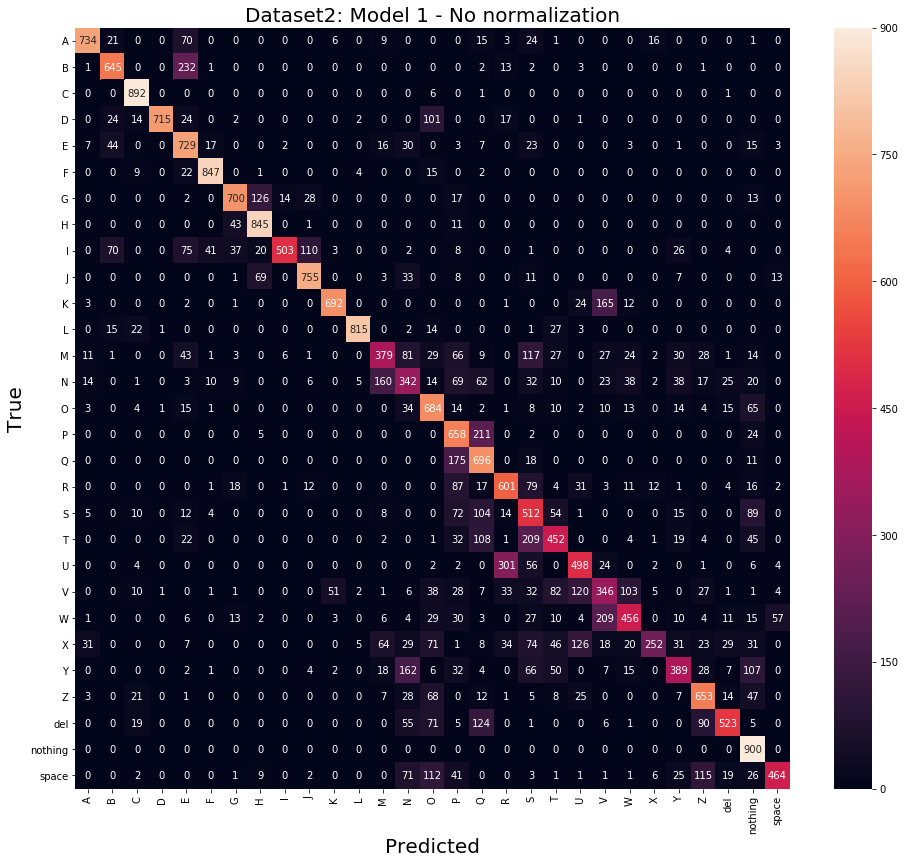

In [59]:
import seaborn as sns
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset2: Model 1 - No normalization', fontsize=20)

plt.savefig('Model1_dataset2.png')
plt.show()

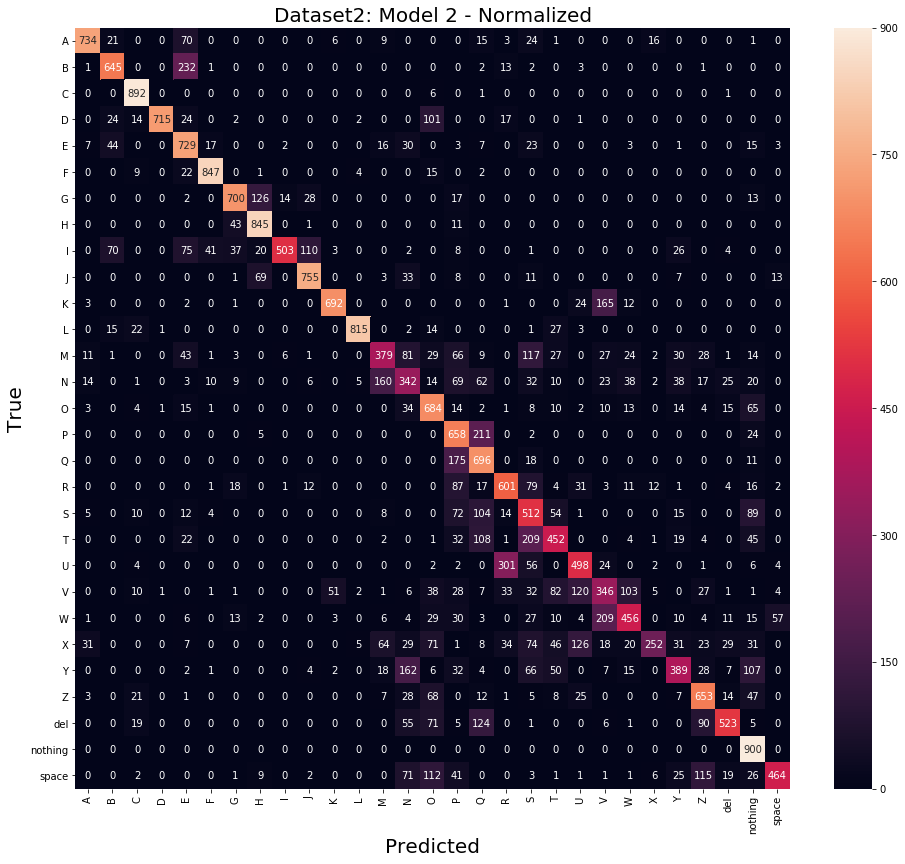

In [60]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset2: Model 2 - Normalized', fontsize=20)

plt.savefig('Model3_Dataset2.png')
plt.show()

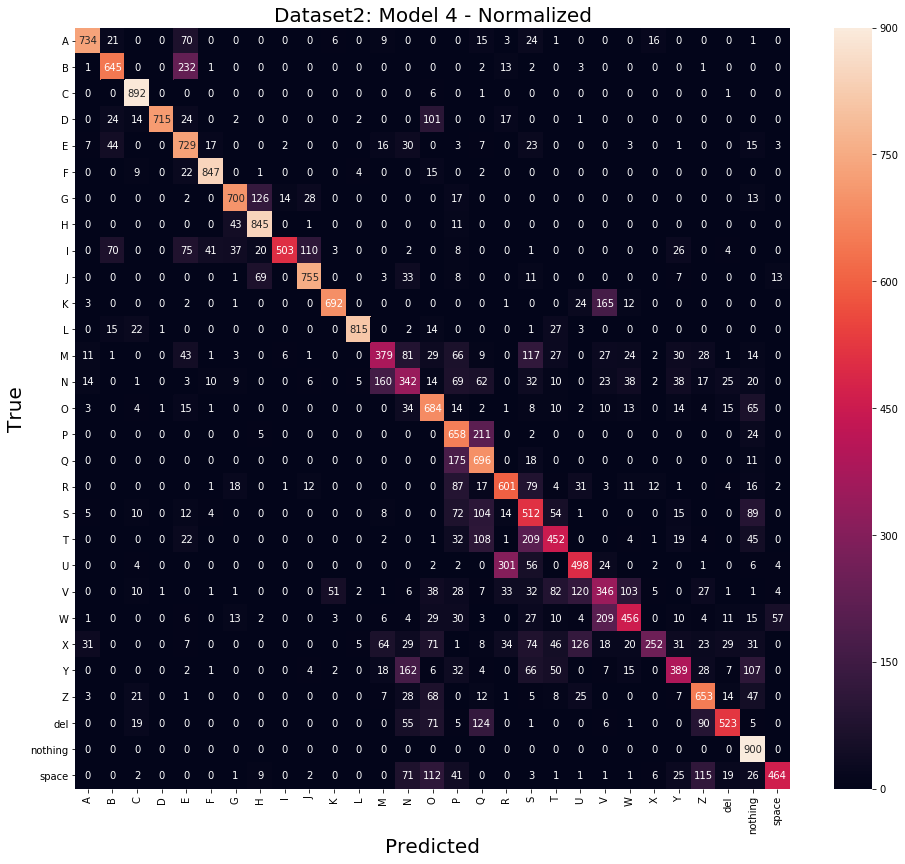

In [61]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm4, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_generator.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset2: Model 4 - Normalized', fontsize=20)

plt.savefig('Model4_Dataset2.png')
plt.show()

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred1,target_names=test_generator.class_indices))
print(classification_report(y_true, y_pred3,target_names=test_generator.class_indices))

              precision    recall  f1-score   support

           A       0.90      0.82      0.86       900
           B       0.79      0.72      0.75       900
           C       0.88      0.99      0.94       900
           D       1.00      0.79      0.88       900
           E       0.58      0.81      0.67       900
           F       0.92      0.94      0.93       900
           G       0.84      0.78      0.81       900
           H       0.78      0.94      0.85       900
           I       0.96      0.56      0.71       900
           J       0.82      0.84      0.83       900
           K       0.91      0.77      0.84       900
           L       0.98      0.91      0.94       900
           M       0.56      0.42      0.48       900
           N       0.39      0.38      0.38       900
           O       0.54      0.76      0.63       900
           P       0.48      0.73      0.58       900
           Q       0.50      0.77      0.61       900
           R       0.59    

INDEPENDENT DATASET

In [63]:
test_lg_path = '.\\raw data\\asl_dataset_enhanced-old'
batch_size2=1
datagen2 = ImageDataGenerator()#rescale=1.0/255, 
                             #shear_range=0.2, 
                             #zoom_range=0.2, 
                             #horizontal_flip=True,
                             #validation_split=.9)
test_lg = datagen2.flow_from_directory(test_lg_path, 
                                              shuffle=False,
                                              target_size = (50,50),
                                               batch_size = batch_size2,
                                              class_mode = 'categorical') # set as training data

test_lg.class_indices

Found 30 images belonging to 26 classes.


{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [70]:
model.predict(test_lg.__getitem__(1))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [71]:
y_true_ind = test_lg.classes
pred1_ind = model.predict(test_lg)
y_pred1_ind = np.zeros(pred1_ind.shape[0])
pred3_ind = model3.predict(test_lg)
y_pred3_ind = np.zeros(pred1_ind.shape[0])
pred4_ind = model4.predict(test_lg)
y_pred4_ind = np.zeros(pred1_ind.shape[0])



In [73]:
pred1_ind

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],


In [74]:
it = 0
for j in pred1_ind:
    y_pred1_ind[it] = np.argmax(j)
    print("PREDICTED: ",y_pred1_ind[it])
    print("TRUE: ",y_true_ind[it])
    y_pred3_ind[it] = np.argmax(j)
    y_pred4_ind[it] = np.argmax(j)
    it+=1

PREDICTED:  0.0
TRUE:  0
PREDICTED:  1.0
TRUE:  1
PREDICTED:  2.0
TRUE:  2
PREDICTED:  3.0
TRUE:  3
PREDICTED:  4.0
TRUE:  4
PREDICTED:  5.0
TRUE:  5
PREDICTED:  6.0
TRUE:  6
PREDICTED:  7.0
TRUE:  7
PREDICTED:  8.0
TRUE:  8
PREDICTED:  9.0
TRUE:  9
PREDICTED:  10.0
TRUE:  10
PREDICTED:  11.0
TRUE:  11
PREDICTED:  13.0
TRUE:  12
PREDICTED:  22.0
TRUE:  13
PREDICTED:  14.0
TRUE:  14
PREDICTED:  15.0
TRUE:  15
PREDICTED:  16.0
TRUE:  16
PREDICTED:  17.0
TRUE:  17
PREDICTED:  18.0
TRUE:  18
PREDICTED:  12.0
TRUE:  19
PREDICTED:  20.0
TRUE:  20
PREDICTED:  21.0
TRUE:  21
PREDICTED:  22.0
TRUE:  22
PREDICTED:  5.0
TRUE:  22
PREDICTED:  23.0
TRUE:  23
PREDICTED:  23.0
TRUE:  23
PREDICTED:  24.0
TRUE:  24
PREDICTED:  19.0
TRUE:  24
PREDICTED:  25.0
TRUE:  25
PREDICTED:  0.0
TRUE:  25


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_true_ind, y_pred1_ind,target_names=test_lg.class_indices))
print(classification_report(y_true_ind, y_pred3_ind,target_names=test_lg.class_indices))

              precision    recall  f1-score   support

           a       0.50      1.00      0.67         1
           b       1.00      1.00      1.00         1
           c       1.00      1.00      1.00         1
           d       1.00      1.00      1.00         1
           e       1.00      1.00      1.00         1
           f       0.50      1.00      0.67         1
           g       1.00      1.00      1.00         1
           h       1.00      1.00      1.00         1
           i       1.00      1.00      1.00         1
           j       1.00      1.00      1.00         1
           k       1.00      1.00      1.00         1
           l       1.00      1.00      1.00         1
           m       0.00      0.00      0.00         1
           n       0.00      0.00      0.00         1
           o       1.00      1.00      1.00         1
           p       1.00      1.00      1.00         1
           q       1.00      1.00      1.00         1
           r       1.00    

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = test_lg.classes
cm = confusion_matrix(y_true_ind, y_pred1_ind)
cm3 = confusion_matrix(y_true_ind, y_pred3_ind)
cm4 = confusion_matrix(y_true_ind, y_pred4_ind)

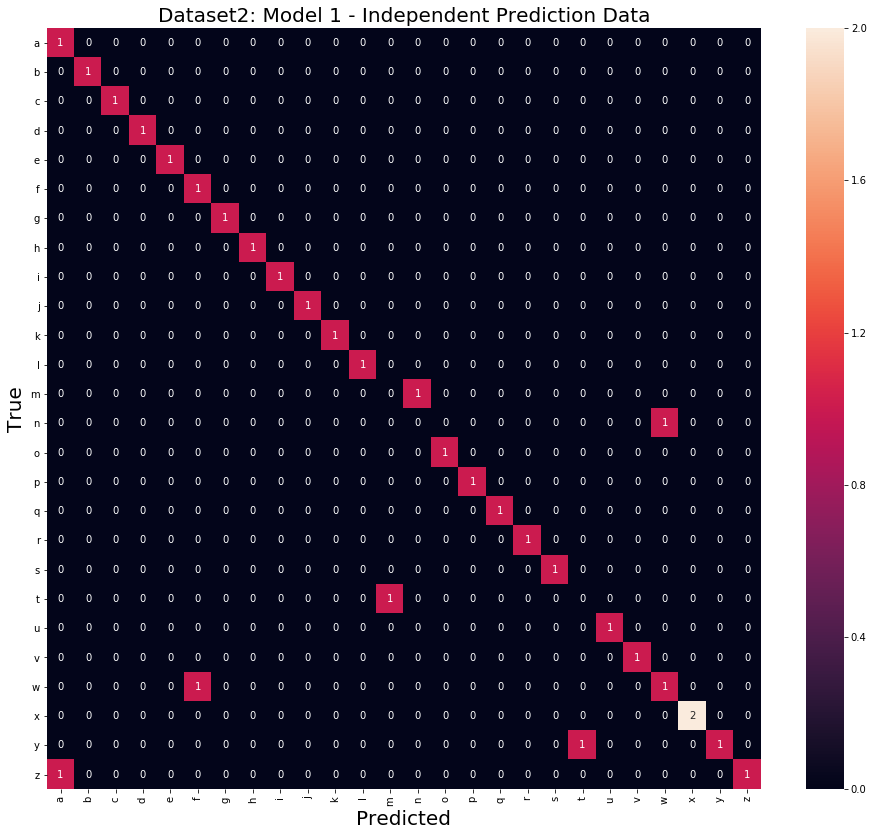

In [79]:
import seaborn as sns
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_lg.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_lg.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset2: Model 1 - Independent Prediction Data', fontsize=20)

plt.savefig('Ind_Model1_dataset2.png')
plt.show()

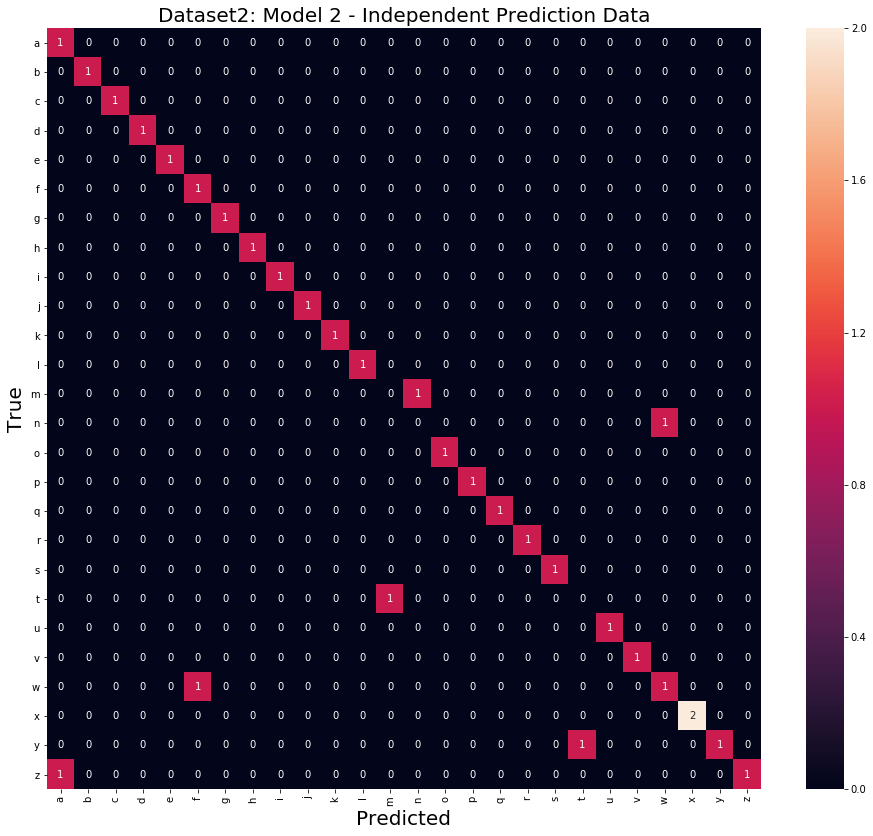

In [80]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_lg.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_lg.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset2: Model 2 - Independent Prediction Data', fontsize=20)

plt.savefig('Ind_Model3_Dataset2.png')
plt.show()

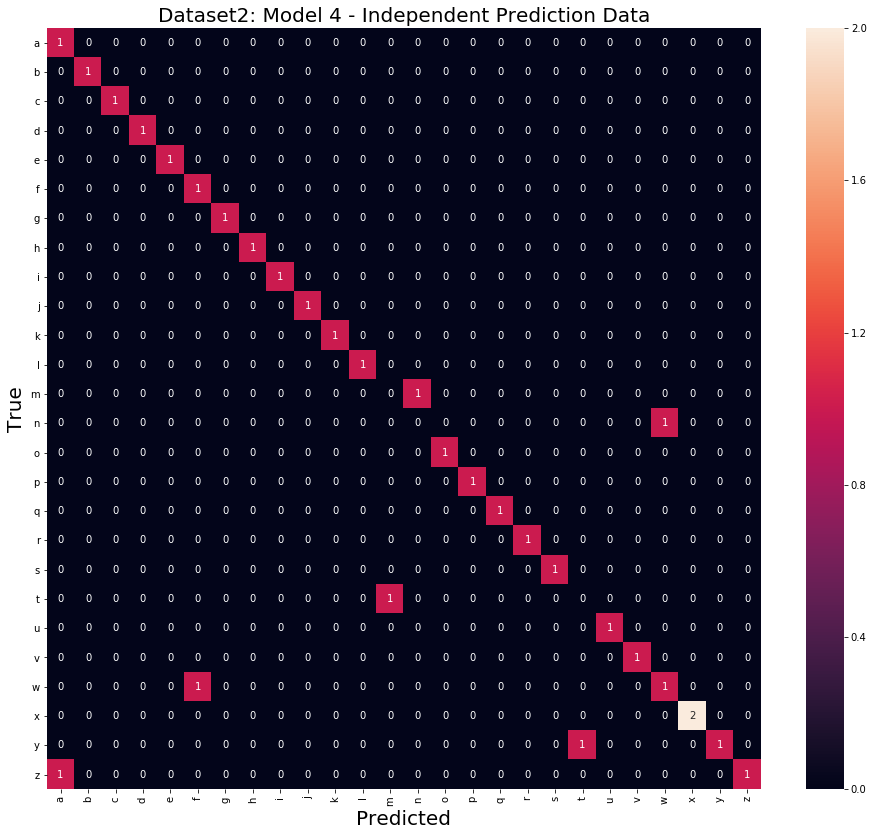

In [81]:
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm4, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.tick_bottom()
ax.xaxis.set_ticklabels(test_lg.class_indices, fontsize = 10)
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(test_lg.class_indices, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Dataset2: Model 4 - Independent Prediction Data', fontsize=20)

plt.savefig('Ind_Model4_Dataset2.png')
plt.show()

tf.Tensor(
[[6.99659289e-11 5.60519386e-45 0.00000000e+00 0.00000000e+00
  3.42640048e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.54710339e-36 5.32493416e-44 1.04993196e-22
  1.73642584e-14 3.33509035e-43 0.00000000e+00 7.22275471e-40
  0.00000000e+00 1.82040872e-28 7.78237419e-10 4.51676423e-14
  2.80259693e-45 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 2.34239230e-39 0.00000000e+00 0.00000000e+00
  0.00000000e+00]], shape=(1, 29), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)


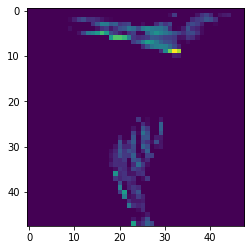

In [486]:
from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

image = test_generator.__getitem__(0)[0][250]
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)

input_layer = img_tensor#model.get_layer("model_input")
conv_layer = model.layers[0]
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    print(predictions)
    loss = predictions[:, np.argmax(predictions[0])]
    print(loss)
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

hm=np.squeeze(heatmap)
hm.shape
plt.imshow(hm)

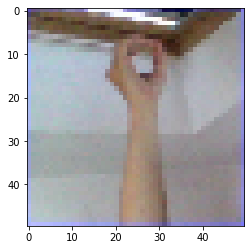

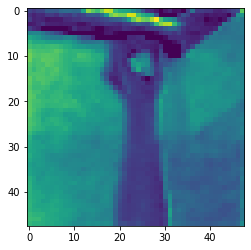

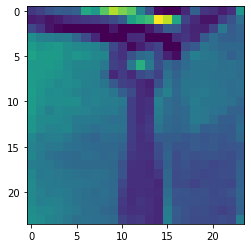

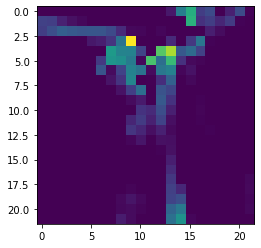

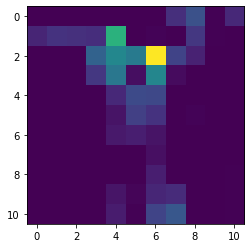

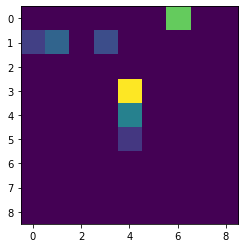

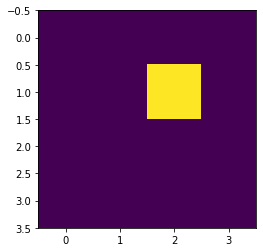

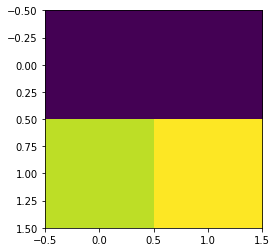

In [612]:
from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

image = test_generator.__getitem__(50)[0][206]
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
hm = []
for l in range(8):
    if(l == 0):
        input_layer = img_tensor#model.get_layer("model_input")
    else:
        input_layer = model.layers[l-1]
    conv_layer = model.layers[l]
    heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

    # Get gradient of the winner class w.r.t. the output of the (last) conv. layer
    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        loss = predictions[:, np.argmax(predictions[0])]
        grads = gtape.gradient(loss, conv_output)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    hm.append(np.squeeze(heatmap))
plt.figure()
plt.imshow(test_generator.__getitem__(50)[0][206].astype('uint8'))
plt.figure()
plt.imshow(hm[0])
plt.figure()
plt.imshow(hm[1])
plt.figure()
plt.imshow(hm[2])
plt.figure()
plt.imshow(hm[3])
plt.figure()
plt.imshow(hm[4])
plt.figure()
plt.imshow(hm[5])
plt.figure()
plt.imshow(hm[6])

In [359]:
pred3 = model3.predict(test_generator)

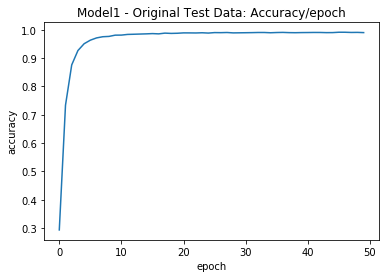

In [343]:
plt.figure()
plt.title("Model1 - Original Test Data: Accuracy/epoch")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])